In [6]:
#!pip install tensorflow
#!pip install scikit-learn
#!pip install matplotlib
#!pip install pandas
#!pip install pyyaml
#!pip install shap


In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import yaml
import warnings
warnings.simplefilter("ignore")
#from joblib import load, dump
import argparse
#import shap
import numpy as np
import matplotlib.pyplot as plt
import functools
print = functools.partial(print, flush=True)
from sklearn.preprocessing import label_binarize, MinMaxScaler
from tensorflow import keras
from sklearn.metrics import (
    roc_curve,precision_score,
    precision_recall_curve,roc_auc_score,
     f1_score,accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    confusion_matrix,
    average_precision_score,
    recall_score
)

from sklearn.utils import class_weight
import shap
# from keras_sequential_ascii import keras2ascii
# from nnv import NNV


2024-02-21 21:42:41.007909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
warnings.simplefilter("ignore", category=DeprecationWarning)


In [3]:
with open(
        "../../configs/col_config.yaml"
    ) as fh:
        config_dict = yaml.safe_load(fh)

with open(
        "../../configs/var_class.yaml"
    ) as fh1:
        var_dict = yaml.safe_load(fh1)


In [4]:
set(var_dict.values())


{'3 prime UTR',
 '5 prime UTR',
 'complex substitution',
 'exon loss variant',
 'frameshift elongation',
 'frameshift truncation',
 'inframe deletion',
 'inframe insertion',
 'intergenic',
 'intron',
 'missense',
 'other',
 'other RNA',
 'splice site',
 'start lost',
 'start retained',
 'stop gained',
 'stop lost',
 'stop retained',
 'synonymous'}

In [11]:
#amis = pd.read_csv("/Users/tarunmamidi/Downloads/AlphaMissense_hg38.tsv", low_memory=False, skiprows=3, sep='\t')
#amis.head()


In [5]:
clf = keras.models.load_model('../../model/Neural_network/')
clf.load_weights("../../model/weights.h5")
clf.summary()


2024-02-21 21:46:55.197143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 239)               57360     
                                                                 
 dense_l0 (Dense)            (None, 161)               38640     
                                                                 
 dropout (Dropout)           (None, 161)               0         
                                                                 
 dense_last (Dense)          (None, 1)                 162       
                                                                 
Total params: 96,162
Trainable params: 96,162
Non-trainable params: 0
_________________________________________________________________


In [13]:
#keras2ascii(clf)


In [14]:
# layersList = [
#     {"title":"Input\n(239 n)\n(elu)", "units": 239, "color": "green", "edges_color":"darkBlue", "edges_width":2},
#     {"title":"Dense\n(161 n)\n(elu)", "units": 161, "edges_color":"darkBlue", "edges_width":2,"color": "orange"},
#     #{"title":"Dropout", "units": 161, "edges_color":"red", "edges_width":2},
#     {"title":"output\n(1 n)\n(sigmoid)", "units": 1,"color": "red"},
# ]

# NNV(layersList).render(save_to_file="DITTO.png")


In [10]:
#X_train = pd.read_csv(f"../../data/train_class_data_80.csv.gz")
#train.head()

In [9]:
#X_train.chrom.unique()

In [56]:
X_train = pd.read_csv(f"../../data/train_class_data_80.csv.gz")
conq_class = X_train['consequence'].unique().tolist()
X_train = X_train.drop(config_dict["train_cols"]+['class'], axis=1)
feature_names = X_train.columns.tolist()
#X_train = X_train.sample(frac=1).reset_index(drop=True)
X_train = X_train.values
background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(clf.predict, background)
print(explainer.expected_value)
del X_train, background


: 

In [7]:
conq_class


['synonymous_variant',
 'missense_variant',
 'intron_variant',
 'intron_variant,lnc_RNA',
 'intron_variant,NMD_transcript_variant',
 'intron_variant,processed_transcript',
 'NMD_transcript_variant,3_prime_UTR_variant',
 'processed_transcript',
 '2kb_downstream_variant,processed_transcript',
 'stop_gained',
 '3_prime_UTR_variant',
 '2kb_upstream_variant,lnc_RNA',
 '2kb_upstream_variant,processed_transcript',
 '5_prime_UTR_variant',
 'lnc_RNA',
 'NMD_transcript_variant,synonymous_variant',
 'missense_variant,NMD_transcript_variant',
 'frameshift_elongation',
 '2kb_downstream_variant,NMD_transcript_variant',
 'frameshift_truncation',
 'intron_variant,splice_site_variant',
 'NMD_transcript_variant,5_prime_UTR_variant',
 '2kb_downstream_variant',
 'inframe_deletion',
 '2kb_downstream_variant,miRNA',
 'frameshift_truncation,NMD_transcript_variant',
 '2kb_downstream_variant,lnc_RNA',
 '2kb_upstream_variant',
 '2kb_upstream_variant,NMD_transcript_variant',
 '2kb_downstream_variant,misc_RNA',
 

In [6]:
X_test = pd.read_csv("../../data/test_class_data_20.csv.gz")
Y_test = X_test['class']
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(Y_test),y=Y_test)
class_weights = {i:w for i,w in enumerate(class_weights)}
var = X_test[config_dict["train_cols"]]
#var['class'] = Y_test
X_test = X_test.drop(config_dict["train_cols"], axis=1)
X_test = X_test.drop("class", axis=1)




In [7]:
X_test.head()


aloft.tolerant  aloft.recessive  aloft.dominant  cadd.phred   
0         0.03175           0.5456         0.38385       4.416  \
1         0.03175           0.5456         0.38385       4.416   
2         0.03175           0.5456         0.38385       4.416   
3         0.03175           0.5456         0.38385       4.416   
4         0.03175           0.5456         0.38385       4.416   

   chasmplus.score  chasmplus.pval  civic.molecular_profile_score   
0            0.073           0.277                            7.5  \
1            0.073           0.277                            7.5   
2            0.073           0.277                            7.5   
3            0.073           0.277                            7.5   
4            0.073           0.277                            7.5   

   cosmic.variant_count  cosmic_gene.occurrences  cscape.score  ...   
0                   1.0                    850.0      0.183598  ...  \
1                   1.0                    850.0      0.183598  ...   
2                   1.0                    850.0      0.183598  ...   
3                   1.0                    850.0      0.183598  ...   
4                   1.0                    850.0      0.183598  ...   

   mutationtaster.prediction_Automatic Polymorphism   
0                                                 0  \
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   mutationtaster.prediction_Damaging  mutationtaster.prediction_Polymorphism   
0                                   0                                       0  \
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   mutationtaster.model_complex_aae  mutationtaster.model_simple_aae   
0                                 0                                0  \
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   mutationtaster.model_without_aae  prec.stat_lof-tolerant   
0                                 0                       0  \
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   

   prec.stat_recessive  sift.confidence_High  sift.confidence_Low  
0                    0                     1                    0  
1                    0                     1                    0  
2                    0                     1                    0  
3                    0                     1                    0  
4                    0                     1                    0  

[5 rows x 239 columns]

In [49]:
var.head()


transcript     gene                                consequence   
0  ENST00000293748  SYNGAP1  NMD_transcript_variant,synonymous_variant  \
1  ENST00000418600  SYNGAP1                         synonymous_variant   
2  ENST00000428982  SYNGAP1                         synonymous_variant   
3  ENST00000449372  SYNGAP1                         synonymous_variant   
4  ENST00000628646  SYNGAP1                         synonymous_variant   

  protein_hgvs  cdna_hgvs chrom       pos ref_base alt_base   
0   p.Pro1051=  c.3153T>G  chr6  33443750        T        G  \
1   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   
2   p.Pro1007=  c.3021T>G  chr6  33443750        T        G   
3   p.Pro1052=  c.3156T>G  chr6  33443750        T        G   
4   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   

                       clingen.disease clingen.classification   
0  complex neurodevelopmental disorder             Definitive  \
1  complex neurodevelopmental disorder             Definitive   
2  complex neurodevelopmental disorder             Definitive   
3  complex neurodevelopmental disorder             Definitive   
4  complex neurodevelopmental disorder             Definitive   

   ncbigene.entrez omim.omim_id uniprot.acc   dbsnp.rsid  
0           8831.0          NaN      Q96PV0  rs781201249  
1           8831.0          NaN      Q96PV0  rs781201249  
2           8831.0          NaN      Q96PV0  rs781201249  
3           8831.0          NaN      Q96PV0  rs781201249  
4           8831.0          NaN      Q96PV0  rs781201249

In [7]:
Y_test.head()

0    low_impact
1    low_impact
2    low_impact
3    low_impact
4    low_impact
Name: class, dtype: object

In [8]:
X_test.fillna(X_test.mean(), inplace=True)
feature_names = X_test.columns.tolist()
Y_test = label_binarize(
    Y_test.values, classes=list(np.unique(Y_test))
        ).ravel()
X_test['class'] = 1-Y_test


In [7]:
X_test['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [9]:
var.head()


transcript     gene                                consequence  \
0  ENST00000293748  SYNGAP1  NMD_transcript_variant,synonymous_variant   
1  ENST00000418600  SYNGAP1                         synonymous_variant   
2  ENST00000428982  SYNGAP1                         synonymous_variant   
3  ENST00000449372  SYNGAP1                         synonymous_variant   
4  ENST00000628646  SYNGAP1                         synonymous_variant   

  protein_hgvs  cdna_hgvs chrom       pos ref_base alt_base  \
0   p.Pro1051=  c.3153T>G  chr6  33443750        T        G   
1   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   
2   p.Pro1007=  c.3021T>G  chr6  33443750        T        G   
3   p.Pro1052=  c.3156T>G  chr6  33443750        T        G   
4   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   

                       clingen.disease clingen.classification  \
0  complex neurodevelopmental disorder             Definitive   
1  complex neurodevelopmental disorder             Definitive   
2  complex neurodevelopmental disorder             Definitive   
3  complex neurodevelopmental disorder             Definitive   
4  complex neurodevelopmental disorder             Definitive   

   ncbigene.entrez omim.omim_id uniprot.acc   dbsnp.rsid  
0           8831.0          NaN      Q96PV0  rs781201249  
1           8831.0          NaN      Q96PV0  rs781201249  
2           8831.0          NaN      Q96PV0  rs781201249  
3           8831.0          NaN      Q96PV0  rs781201249  
4           8831.0          NaN      Q96PV0  rs781201249

In [10]:
feature_names


['aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'cadd.phred',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.molecular_profile_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'clinpred.score',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.score',
 'ess_gene.indispensability_score',
 'exac_gene.exac_pli',
 'exac_gene.exac_pnull',
 'exac_gene.exac_del_score',
 'exac_gene.exac_dup_score',
 'exac_gene.exac_cnv_score',
 'fathmm.fathmm_score',
 'fathmm_xf_coding.fathmm_xf_coding_score',
 'funseq2.score',
 'gerp.gerp_rs',
 'ghis.ghis',
 'gwas_catalog.pval',
 'genehancer.score',
 'linsight.value',
 'lrt.lrt_score',
 'lrt.lrt_omega',
 'loftool.loftool_score',
 'mavedb.score',
 'metalr.score',
 'metasvm.score',
 'mutpred1.mutpred_general_score',
 'mutpred_indel.score',
 'mutation_assessor.score',
 'mutationtaster.score',
 'ndex_chd.numhit',
 'ndex.numhit',
 'ndex_si

In [16]:
#var['so'] = var['consequence']
#pd.pivot_table(var, values='consequence', index='so', columns='class',
#                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)


In [9]:
y_score = clf.predict(X_test.drop("class", axis=1))


6506/6506 [==============================] - 8s 1ms/step


In [10]:
y_score = 1 - y_score
y_score


array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [4.4107437e-06],
       [4.4107437e-06],
       [1.0000000e+00]], dtype=float32)

In [11]:
y_score.round()


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [15]:
len(y_score)


208167

In [16]:
X_test.shape


(208167, 240)

In [12]:
# get maximum value from 4 spliceai columns

X_test['spliceai'] = X_test[['spliceai.ds_ag','spliceai.ds_al','spliceai.ds_dg','spliceai.ds_dl']].max(axis=1)
X_test['spliceai'].head()


0    0.0004
1    0.0004
2    0.0004
3    0.0004
4    0.0004
Name: spliceai, dtype: float64

<Axes: ylabel='Frequency'>

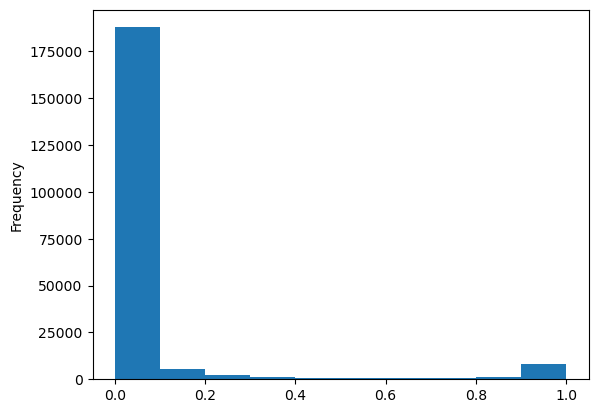

In [13]:
X_test['spliceai'].plot.hist()


In [23]:
X_test.tail()


aloft.tolerant  aloft.recessive  aloft.dominant  cadd.phred  \
208162         0.03175           0.5456         0.38385       8.510   
208163         0.03175           0.5456         0.38385       8.510   
208164         0.03175           0.5456         0.38385       8.393   
208165         0.03175           0.5456         0.38385       8.393   
208166         0.03175           0.5456         0.38385      26.400   

        chasmplus.score  chasmplus.pval  civic.molecular_profile_score  \
208162            0.073           0.277                            7.5   
208163            0.073           0.277                            7.5   
208164            0.073           0.277                            7.5   
208165            0.073           0.277                            7.5   
208166            0.073           0.277                            7.5   

        cosmic.variant_count  cosmic_gene.occurrences  cscape.score  ...  \
208162                   1.0                   3655.0      0.121814  ...   
208163                   1.0                   3655.0      0.121814  ...   
208164                   1.0                   5495.0      0.204376  ...   
208165                   1.0                   5495.0      0.204376  ...   
208166                   1.0                   2177.0      0.899148  ...   

        mutationtaster.prediction_Polymorphism  \
208162                                       0   
208163                                       0   
208164                                       0   
208165                                       0   
208166                                       0   

        mutationtaster.model_complex_aae  mutationtaster.model_simple_aae  \
208162                                 0                                0   
208163                                 0                                0   
208164                                 0                                0   
208165                                 0                                0   
208166                                 0                                1   

        mutationtaster.model_without_aae  prec.stat_lof-tolerant  \
208162                                 0                       0   
208163                                 0                       0   
208164                                 0                       0   
208165                                 0                       0   
208166                                 0                       0   

        prec.stat_recessive  sift.confidence_High  sift.confidence_Low  class  \
208162                    1                     0                    0      1   
208163                    1                     0                    0      1   
208164                    0                     1                    0      1   
208165                    0                     1                    0      1   
208166                    0                     1                    0      0   

        spliceai  
208162    0.0004  
208163    0.0004  
208164    0.0004  
208165    0.0004  
208166    0.0004  

[5 rows x 241 columns]

In [18]:
var.shape


(208167, 15)

In [13]:
var["DITTO"] = y_score
var.head()


transcript     gene                                consequence   
0  ENST00000293748  SYNGAP1  NMD_transcript_variant,synonymous_variant  \
1  ENST00000418600  SYNGAP1                         synonymous_variant   
2  ENST00000428982  SYNGAP1                         synonymous_variant   
3  ENST00000449372  SYNGAP1                         synonymous_variant   
4  ENST00000628646  SYNGAP1                         synonymous_variant   

  protein_hgvs  cdna_hgvs chrom       pos ref_base alt_base   
0   p.Pro1051=  c.3153T>G  chr6  33443750        T        G  \
1   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   
2   p.Pro1007=  c.3021T>G  chr6  33443750        T        G   
3   p.Pro1052=  c.3156T>G  chr6  33443750        T        G   
4   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   

                       clingen.disease clingen.classification   
0  complex neurodevelopmental disorder             Definitive  \
1  complex neurodevelopmental disorder             Definitive   
2  complex neurodevelopmental disorder             Definitive   
3  complex neurodevelopmental disorder             Definitive   
4  complex neurodevelopmental disorder             Definitive   

   ncbigene.entrez omim.omim_id uniprot.acc   dbsnp.rsid  DITTO  
0           8831.0          NaN      Q96PV0  rs781201249    0.0  
1           8831.0          NaN      Q96PV0  rs781201249    0.0  
2           8831.0          NaN      Q96PV0  rs781201249    0.0  
3           8831.0          NaN      Q96PV0  rs781201249    0.0  
4           8831.0          NaN      Q96PV0  rs781201249    0.0

In [14]:
var = pd.concat([var.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)
var.shape


(208167, 257)

In [61]:
var.head()

transcript     gene                                consequence   
0  ENST00000293748  SYNGAP1  NMD_transcript_variant,synonymous_variant  \
1  ENST00000418600  SYNGAP1                         synonymous_variant   
2  ENST00000428982  SYNGAP1                         synonymous_variant   
3  ENST00000449372  SYNGAP1                         synonymous_variant   
4  ENST00000628646  SYNGAP1                         synonymous_variant   

  protein_hgvs  cdna_hgvs chrom       pos ref_base alt_base   
0   p.Pro1051=  c.3153T>G  chr6  33443750        T        G  \
1   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   
2   p.Pro1007=  c.3021T>G  chr6  33443750        T        G   
3   p.Pro1052=  c.3156T>G  chr6  33443750        T        G   
4   p.Pro1066=  c.3198T>G  chr6  33443750        T        G   

                       clingen.disease  ...   
0  complex neurodevelopmental disorder  ...  \
1  complex neurodevelopmental disorder  ...   
2  complex neurodevelopmental disorder  ...   
3  complex neurodevelopmental disorder  ...   
4  complex neurodevelopmental disorder  ...   

  mutationtaster.prediction_Polymorphism  mutationtaster.model_complex_aae   
0                                      0                                 0  \
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

  mutationtaster.model_simple_aae mutationtaster.model_without_aae   
0                               0                                0  \
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

  prec.stat_lof-tolerant  prec.stat_recessive  sift.confidence_High   
0                      0                    0                     1  \
1                      0                    0                     1   
2                      0                    0                     1   
3                      0                    0                     1   
4                      0                    0                     1   

   sift.confidence_Low  class  spliceai  
0                    0      0    0.0004  
1                    0      0    0.0004  
2                    0      0    0.0004  
3                    0      0    0.0004  
4                    0      0    0.0004  

[5 rows x 257 columns]

<AxesSubplot:ylabel='Frequency'>

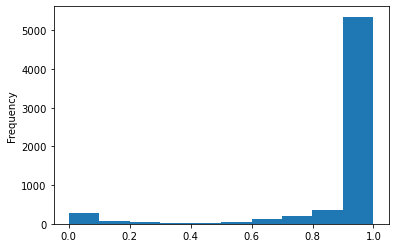

In [16]:
var[var['consequence'].str.contains('splice')]['spliceai'].plot.hist()


In [15]:
bench = var[['DITTO','cadd.phred','clinpred.score','metasvm.score', 'gerp.gerp_rs','spliceai','revel.score']]#,'sift.score','dann.score']]
bench.columns = ['DITTO','CADD','ClinPred','MetaSVM','GERP','spliceai','Revel']#,'SIFT','DANN']
bench.head()


DITTO   CADD  ClinPred  MetaSVM  GERP  spliceai  Revel
0    0.0  4.416     0.109  -0.3355  4.66    0.0004   0.38
1    0.0  4.416     0.109  -0.3355  4.66    0.0004   0.38
2    0.0  4.416     0.109  -0.3355  4.66    0.0004   0.38
3    0.0  4.416     0.109  -0.3355  4.66    0.0004   0.38
4    0.0  4.416     0.109  -0.3355  4.66    0.0004   0.38

In [16]:
default_colors = {
        "DANN": "#de77ae",
        "SIFT": "#fee090",
        "Revel": "#542788",
        "VEST": "#5ab4ac",
        "GERP": "#d8b365",
        "MetaSVM": "#3182bd",
        "ClinPred": "#969696",
        "CADD": "#D55E00",
        "DITTO": "#b2182b",
        "spliceai": "#5ab4ac",
    }


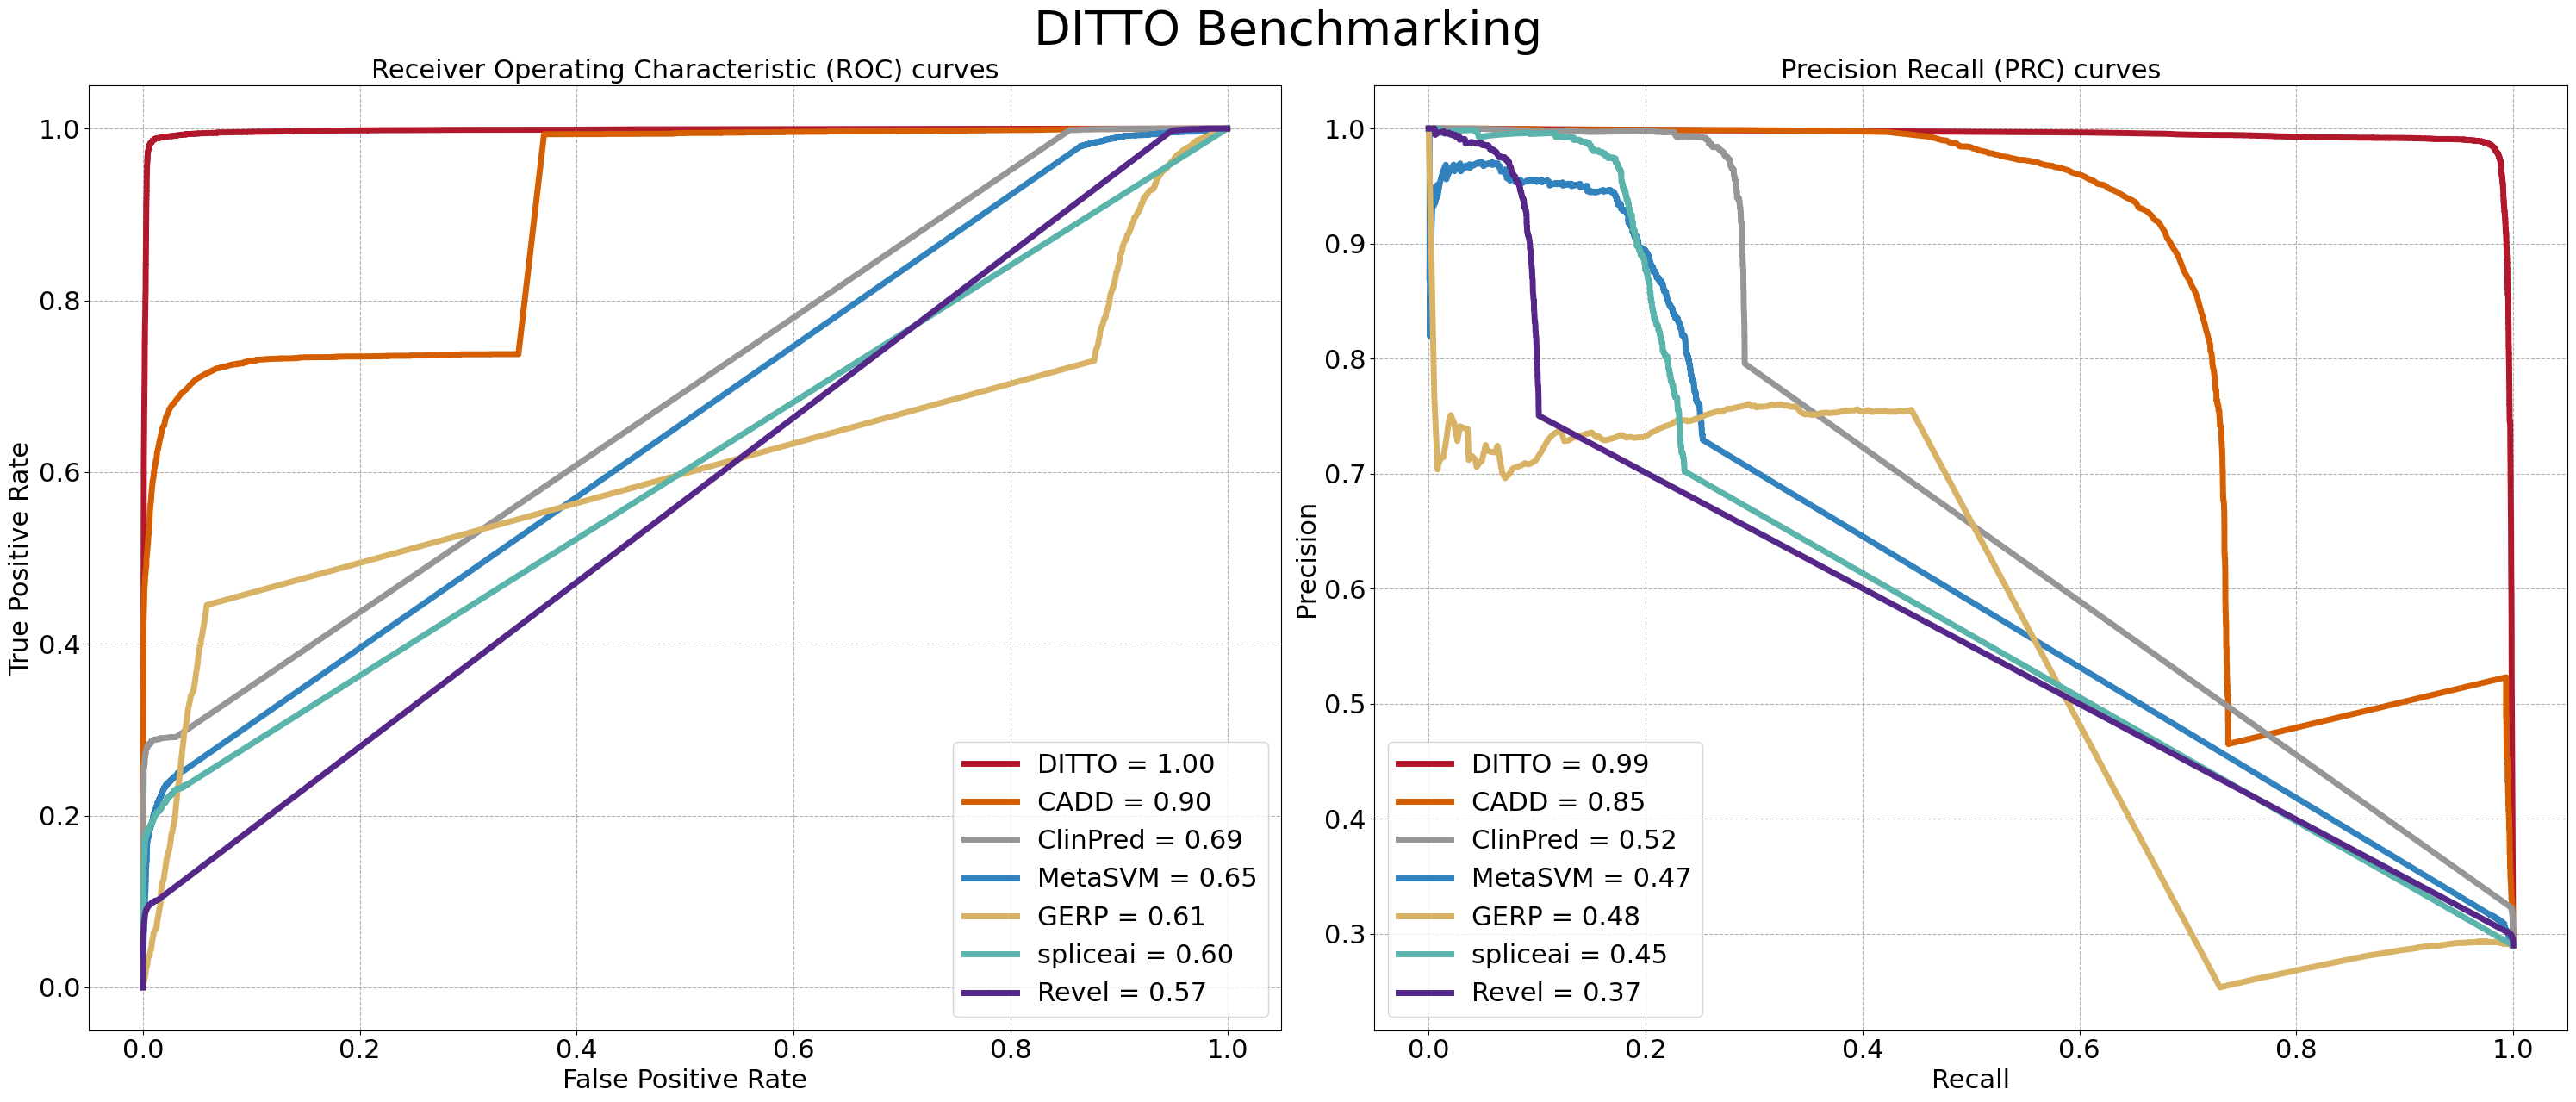

In [17]:
#bench = var[['cadd.phred','clinpred.score', 'chasmplus.score','dann.score','revel.score','metalr.score','metasvm.score','mutation_assessor.score','mutationtaster.score','sift.score','provean.score','vest.score','gerp.gerp_rs','DITTO']]
#bench.columns = ['CADD','ClinPred','chasmplus','DANN','Revel','MetaLR','MetaSVM','mutation_assessor','mutationtaster','SIFT','provean','VEST','GERP','DITTO']
Y_test = var['class']

fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(30, 13))

fig.suptitle(f"DITTO Benchmarking", fontsize=40)
fsize = 22
ax_roc.tick_params(axis='both', which='major', labelsize=fsize)
ax_prc.tick_params(axis='both', which='major', labelsize=fsize)
ax_roc.set_xlabel("False Positive Rate", fontsize=fsize)
ax_roc.set_ylabel("True Positive Rate", fontsize=fsize)
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves", fontsize=fsize)
ax_roc.grid(linestyle="--")
ax_prc.set_xlabel("Recall", fontsize=fsize)
ax_prc.set_ylabel("Precision", fontsize=fsize)
ax_prc.set_title("Precision Recall (PRC) curves", fontsize=fsize)
ax_prc.grid(linestyle="--")

scores = {}
scores['roc'] = {}
scores['prc'] = {}
scores['f1'] = {}
for name in list(bench.columns):
        x = bench[name].values
        if np.unique(x).size == 1 and name in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            y_true = np.zeros_like(x)
        elif name in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            y_true = (x-np.min(x))/(np.max(x)-np.min(x))
        else:
            y_true = x
        fpr, tpr, _ = roc_curve(Y_test, y_true)
        auc = roc_auc_score(Y_test, y_true, average='weighted')
        auc = "{:.2f}".format(auc)
        scores['roc'][name] = auc
        ax_roc.plot(fpr,tpr,label=str(name)+" = "+str(auc), linewidth=5, c= default_colors[name])
        precision, recall, _ = precision_recall_curve(Y_test, y_true)
        prc = average_precision_score(Y_test, y_true, average='weighted')
        prc = "{:.2f}".format(prc)
        scores['prc'][name] = prc
        #f1 = f1_score(Y_test, y_true, sample_weight= weights, average='weighted')
        #scores['f1'][name] = "{:.2f}".format(np.nanmean(f1))
        ax_prc.plot(recall,precision,label=str(name)+" = "+str(prc), linewidth=5, c= default_colors[name])

# ax_prc.legend( bbox_to_anchor=(1,0.5), loc="center left", fontsize=fsize)
# ax_roc.legend( bbox_to_anchor=(1,0.5), loc="center left", fontsize=fsize)
ax_prc.legend(fontsize=fsize)
ax_roc.legend(fontsize=fsize)
fig.tight_layout()
#plt.savefig(
#            f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/benchmarking/DITTO_ROC_PRC_benchmarking.pdf",
#            format="pdf",
#            dpi=1000,
#            bbox_inches="tight",
#        )




In [21]:
var.tail()


transcript    gene         consequence  protein_hgvs  \
208162  ENST00000413539    DYSF      intron_variant           NaN   
208163  ENST00000429174    DYSF      intron_variant           NaN   
208164  ENST00000288135     KIT  synonymous_variant     p.Thr666=   
208165  ENST00000412167     KIT  synonymous_variant     p.Thr662=   
208166  ENST00000328333  COL7A1    missense_variant  p.Gly2037Glu   

           cdna_hgvs chrom       pos ref_base alt_base clingen.disease  ...  \
208162  c.457+150A>G  chr2  71512071        A        G             NaN  ...   
208163  c.457+150A>G  chr2  71512071        A        G             NaN  ...   
208164     c.1998C>T  chr4  54729342        C        T             NaN  ...   
208165     c.1986C>T  chr4  54729342        C        T             NaN  ...   
208166     c.6110G>A  chr3  48575409        C        T             NaN  ...   

       mutationtaster.prediction_Damaging  \
208162                                  0   
208163                                  0   
208164                                  0   
208165                                  0   
208166                                  0   

        mutationtaster.prediction_Polymorphism  \
208162                                       0   
208163                                       0   
208164                                       0   
208165                                       0   
208166                                       0   

       mutationtaster.model_complex_aae mutationtaster.model_simple_aae  \
208162                                0                               0   
208163                                0                               0   
208164                                0                               0   
208165                                0                               0   
208166                                0                               1   

       mutationtaster.model_without_aae  prec.stat_lof-tolerant  \
208162                                0                       0   
208163                                0                       0   
208164                                0                       0   
208165                                0                       0   
208166                                0                       0   

        prec.stat_recessive  sift.confidence_High  sift.confidence_Low  class  
208162                    1                     0                    0      1  
208163                    1                     0                    0      1  
208164                    0                     1                    0      1  
208165                    0                     1                    0      1  
208166                    0                     1                    0      0  

[5 rows x 256 columns]

In [18]:
var1 = var.sort_values(by="DITTO", ascending=False).drop_duplicates(subset=['chrom', 'pos', 'ref_base', 'alt_base'], keep='first').reset_index(drop=True)
var1.tail()


transcript     gene          consequence protein_hgvs   
37022  ENST00000591909    TUBB6  3_prime_UTR_variant          NaN  \
37023  ENST00000289672   PKD1L1       intron_variant          NaN   
37024  ENST00000437951    PTCH1   synonymous_variant   p.Ser1169=   
37025  ENST00000644285  ANKRD11       intron_variant          NaN   
37026  ENST00000436005     PNKD       intron_variant          NaN   

           cdna_hgvs  chrom        pos ref_base alt_base   
37022      c.*354C>G  chr18   12329537        C        G  \
37023   c.4961-38C>T   chr7   47847109        G        A   
37024      c.3507C>T   chr9   95449168        G        A   
37025  c.745-6013G>A  chr16   89281204        C        T   
37026    c.173-24C>T   chr2  218340005        C        T   

                            clingen.disease  ...   
37022                                   NaN  ...  \
37023                                   NaN  ...   
37024  nevoid basal cell carcinoma syndrome  ...   
37025                                   NaN  ...   
37026                                   NaN  ...   

      mutationtaster.prediction_Polymorphism   
37022                                      0  \
37023                                      0   
37024                                      0   
37025                                      0   
37026                                      0   

       mutationtaster.model_complex_aae mutationtaster.model_simple_aae   
37022                                 0                               0  \
37023                                 0                               0   
37024                                 0                               0   
37025                                 0                               0   
37026                                 0                               0   

      mutationtaster.model_without_aae prec.stat_lof-tolerant   
37022                                0                      0  \
37023                                0                      0   
37024                                0                      0   
37025                                0                      0   
37026                                0                      0   

       prec.stat_recessive  sift.confidence_High  sift.confidence_Low  class   
37022                    0                     0                    0      0  \
37023                    0                     0                    0      0   
37024                    0                     1                    0      0   
37025                    0                     0                    0      0   
37026                    0                     0                    0      0   

       spliceai  
37022    0.0004  
37023    0.0004  
37024    0.0004  
37025    0.0004  
37026    0.0004  

[5 rows x 257 columns]

In [19]:
var1.chrom.value_counts()


chrom
chr2     3648
chr17    3168
chr1     2792
chr11    2221
chr16    2155
chr5     1953
chr3     1857
chr19    1839
chr12    1777
chr9     1730
chr7     1677
chr13    1611
chrX     1546
chr6     1244
chr10    1227
chr15    1198
chr14    1088
chr4     1027
chr8     1007
chr22     706
chr20     616
chr18     555
chr21     385
Name: count, dtype: int64

In [29]:
var1['consequence'].value_counts()


synonymous_variant                                                                  8683
intron_variant                                                                      6928
missense_variant                                                                    4066
processed_transcript                                                                2703
stop_gained                                                                         1944
frameshift_truncation                                                               1907
NMD_transcript_variant,3_prime_UTR_variant                                          1405
intron_variant,splice_site_variant                                                   919
frameshift_elongation                                                                900
intron_variant,NMD_transcript_variant                                                647
2kb_downstream_variant                                                               624
2kb_upstream_variant 

In [27]:
#var1 = var1.merge(amis, left_on=['chrom','pos','ref_base','alt_base'], right_on=['#CHROM','POS','REF','ALT'], how='left')
#var1.shape


In [23]:
var['class'].value_counts()

class
0    147809
1     60358
Name: count, dtype: int64

Precision: 0.9900747951197025
Recall: 0.9900752761004386
ROC_AUC: 0.9971943867614745
PRC_AUC: 0.9929252877057522
Accuracy: 0.9900752761004386
Confusion matrix:
[[146781   1028]
 [  1038  59320]]


Text(0.5, 1.0, 'Confusion matrix for test variants')

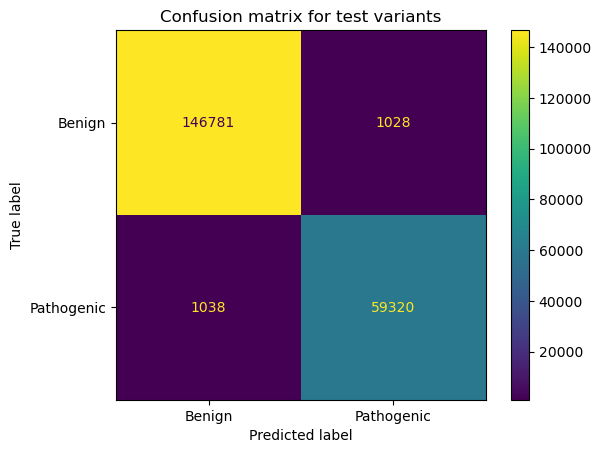

In [20]:
prc = precision_score(Y_test, y_score.round(), average="weighted")
recall = recall_score(Y_test, y_score.round(), average="weighted")
roc_auc = roc_auc_score(Y_test, y_score)
prc_auc = average_precision_score(Y_test, y_score, average="weighted")
# roc_auc = roc_auc_score(Y_test, np.argmax(y_score, axis=1))
accuracy = accuracy_score(Y_test, y_score.round())
# score = clf.score(X_train, Y_train)
matrix = confusion_matrix(Y_test, y_score.round())
cm = confusion_matrix(Y_test, y_score.round())
print(f"Precision: {prc}\nRecall: {recall}\nROC_AUC: {roc_auc}\nPRC_AUC: {prc_auc}\nAccuracy: {accuracy}\nConfusion matrix:\n{matrix}")
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ 'Benign', 'Pathogenic'])
cm.plot()
plt.title(f"Confusion matrix for test variants", fontsize=12)


In [21]:
bench = var1[['DITTO','cadd.phred','clinpred.score','metasvm.score', 'gerp.gerp_rs','spliceai','revel.score','dann.score','sift.score']]
bench.columns = ['DITTO','CADD','ClinPred','MetaSVM','GERP','spliceai','Revel','DANN','SIFT']
Y_test = var1['class']


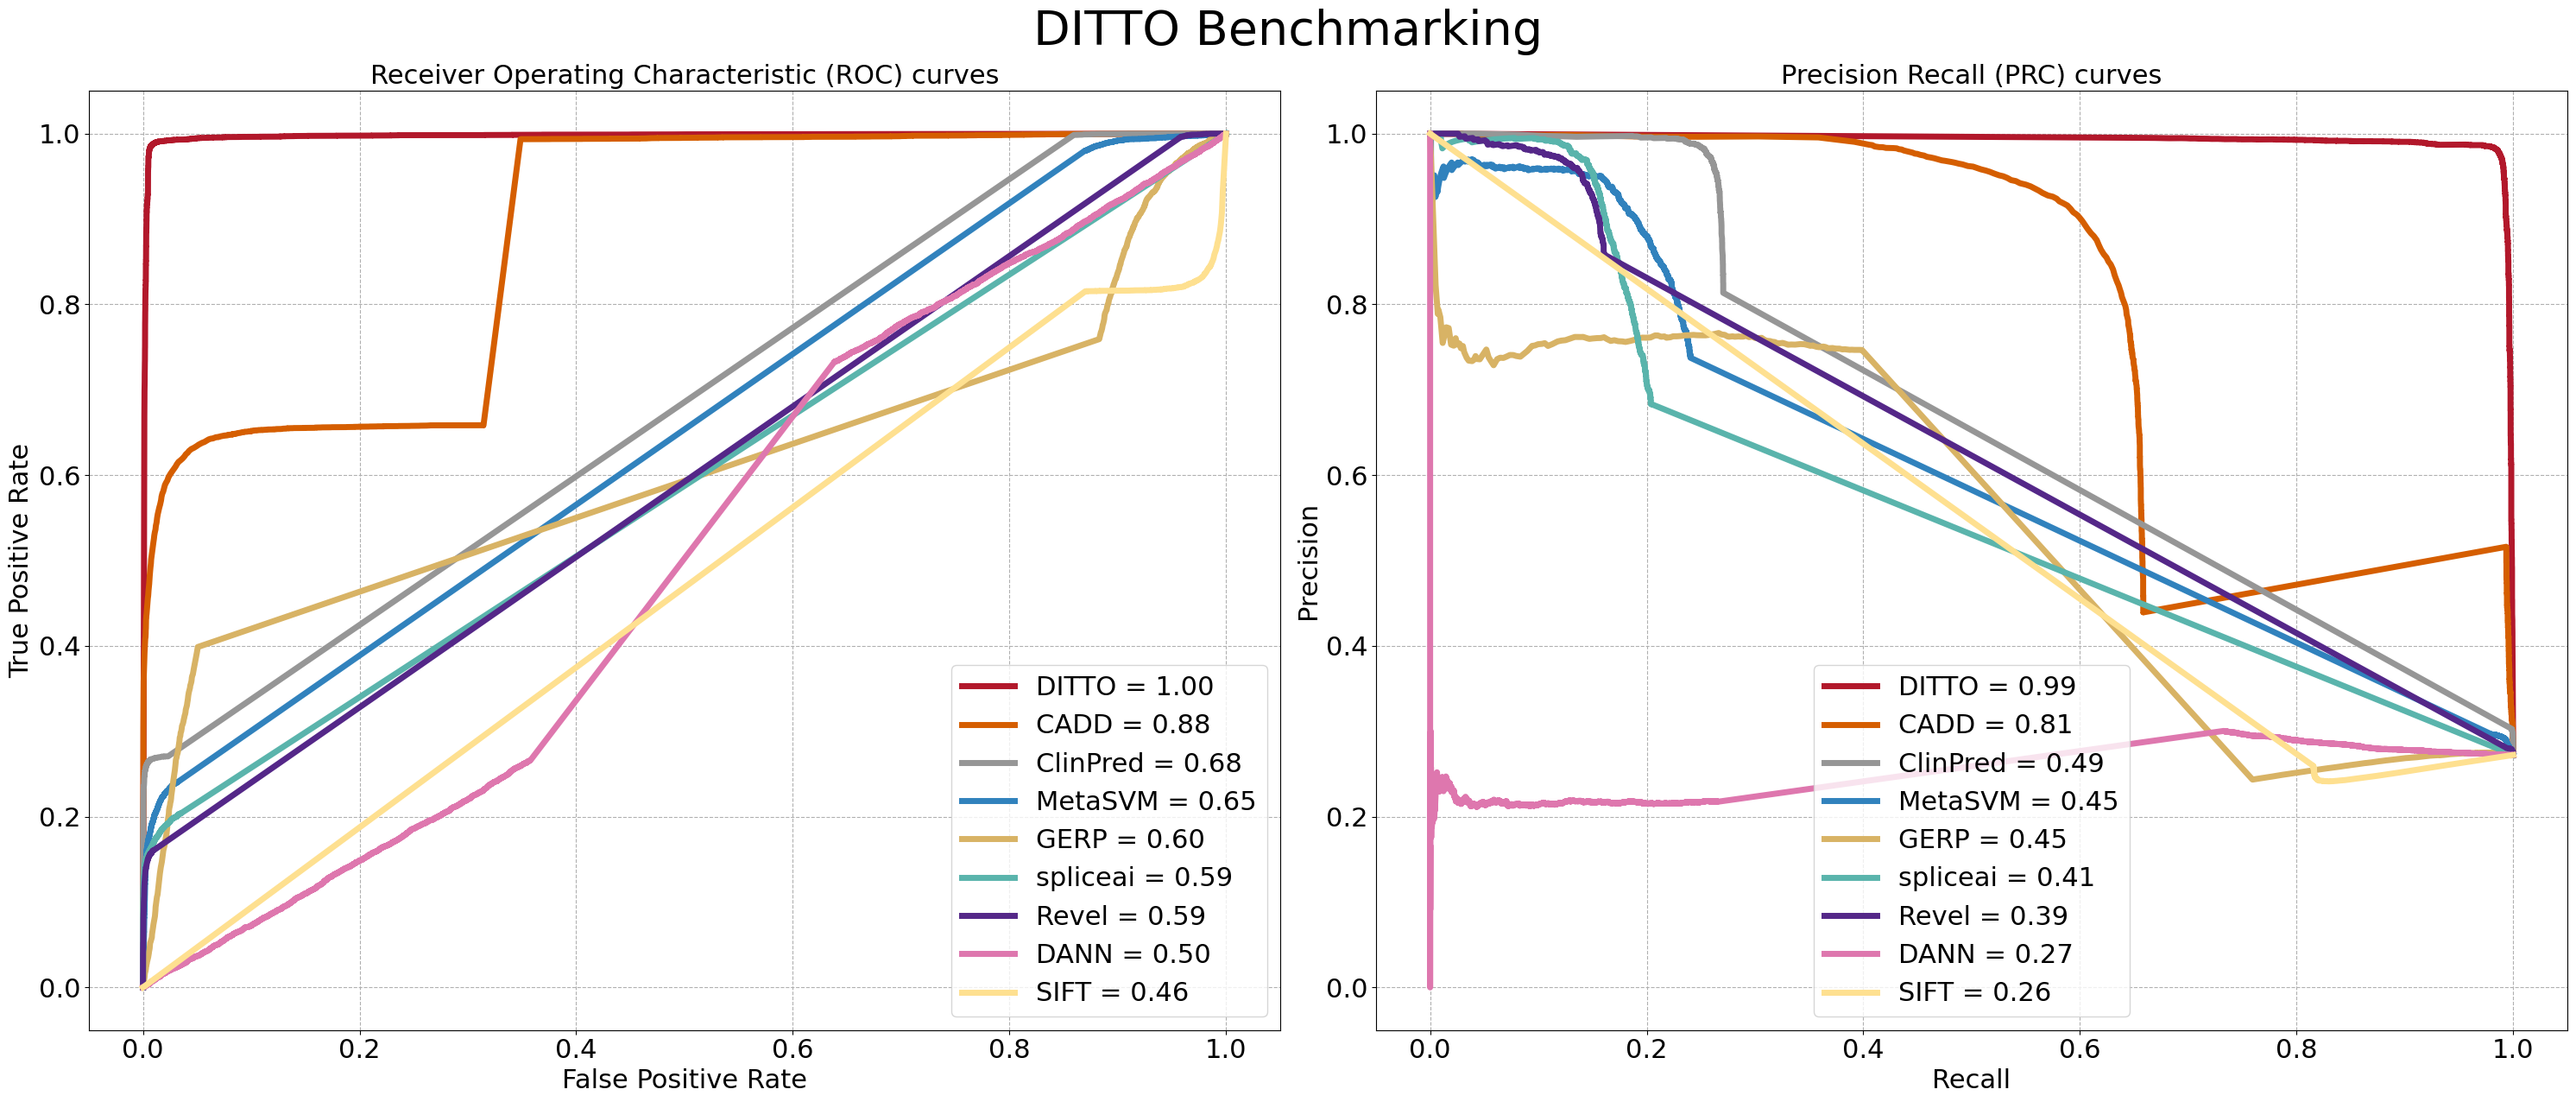

In [182]:

fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(30, 13))

fig.suptitle(f"DITTO Benchmarking", fontsize=40)
fsize = 22
ax_roc.tick_params(axis='both', which='major', labelsize=fsize)
ax_prc.tick_params(axis='both', which='major', labelsize=fsize)
ax_roc.set_xlabel("False Positive Rate", fontsize=fsize)
ax_roc.set_ylabel("True Positive Rate", fontsize=fsize)
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves", fontsize=fsize)
ax_roc.grid(linestyle="--")
ax_prc.set_xlabel("Recall", fontsize=fsize)
ax_prc.set_ylabel("Precision", fontsize=fsize)
ax_prc.set_title("Precision Recall (PRC) curves", fontsize=fsize)
ax_prc.grid(linestyle="--")

scores = {}
scores['roc'] = {}
scores['prc'] = {}
scores['f1'] = {}
for name in list(bench.columns):
        x = bench[name].values
        if np.unique(x).size == 1 and name in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            y_true = np.zeros_like(x)
        elif name in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            y_true = (x-np.min(x))/(np.max(x)-np.min(x))
        else:
            y_true = x
        fpr, tpr, _ = roc_curve(Y_test, y_true)
        auc = roc_auc_score(Y_test, y_true, average='weighted')
        auc = "{:.2f}".format(auc)
        scores['roc'][name] = auc
        ax_roc.plot(fpr,tpr,label=str(name)+" = "+str(auc), linewidth=5, c= default_colors[name])
        precision, recall, _ = precision_recall_curve(Y_test, y_true)
        prc = average_precision_score(Y_test, y_true, average='weighted')
        prc = "{:.2f}".format(prc)
        scores['prc'][name] = prc
        #f1 = f1_score(Y_test, y_true, sample_weight= weights, average='weighted')
        #scores['f1'][name] = "{:.2f}".format(np.nanmean(f1))
        ax_prc.plot(recall,precision,label=str(name)+" = "+str(prc), linewidth=5, c= default_colors[name])

ax_prc.legend(fontsize=fsize)# bbox_to_anchor=(1,0.5), loc="center left",
ax_roc.legend(fontsize=fsize)# bbox_to_anchor=(1,0.5), loc="center left",
fig.tight_layout()
#plt.savefig(
#            f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/benchmarking/DITTO_ROC_PRC_benchmarking.pdf",
#            format="pdf",
#            dpi=1000,
#            bbox_inches="tight",
#        )


In [29]:
var.chrom.unique()


array(['chr6', 'chr13', 'chrX', 'chr14', 'chr11', 'chr18', 'chr12',
       'chr17', 'chr2', 'chr15', 'chr9', 'chr1', 'chr8', 'chr4', 'chr16',
       'chr21', 'chr5', 'chr19', 'chr3', 'chr10', 'chr7', 'chr20',
       'chr22'], dtype=object)

In [22]:
acc_scores_chr = {}
prc_scores_chr = {}
f1_scores_chr = {}
for name in var1.chrom.unique():
    acc_scores_chr[name] = {}
    prc_scores_chr[name] = {}
    f1_scores_chr[name] = {}
    for clf in bench.columns:
        index_list = var1[var1.chrom == name].index
        x = bench[bench.index.isin(index_list)][clf].values
        if np.unique(x).size == 1 and clf in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            x_norm = np.zeros_like(x)
        elif clf in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
        else:
            x_norm = x

        acc = accuracy_score(Y_test[index_list],  x_norm.round())
        acc = "{:.2f}".format(acc)
        acc_scores_chr[name][clf] = acc

        prc = precision_score(Y_test[index_list],  x_norm.round())
        prc = "{:.2f}".format(prc)
        prc_scores_chr[name][clf] = prc

        f1 = f1_score(Y_test[index_list],  x_norm.round(), zero_division=1.0)
        f1_scores_chr[name][clf] = "{:.2f}".format(f1)

pd.DataFrame(f1_scores_chr).to_csv("/Users/tarunmamidi/Documents/Development/DITTO-1/data/f1_scores_overall_1_transcript_chr.csv")


In [184]:
f1_scores_chr


{'chr3': {'DITTO': '0.99',
  'CADD': '0.71',
  'ClinPred': '0.51',
  'MetaSVM': '0.40',
  'GERP': '0.45',
  'spliceai': '0.29',
  'Revel': '0.32',
  'DANN': '0.43',
  'SIFT': '0.39'},
 'chr19': {'DITTO': '0.98',
  'CADD': '0.51',
  'ClinPred': '0.59',
  'MetaSVM': '0.54',
  'GERP': '0.34',
  'spliceai': '0.22',
  'Revel': '0.35',
  'DANN': '0.35',
  'SIFT': '0.27'},
 'chr11': {'DITTO': '0.98',
  'CADD': '0.63',
  'ClinPred': '0.41',
  'MetaSVM': '0.37',
  'GERP': '0.49',
  'spliceai': '0.30',
  'Revel': '0.28',
  'DANN': '0.46',
  'SIFT': '0.43'},
 'chr1': {'DITTO': '0.98',
  'CADD': '0.71',
  'ClinPred': '0.50',
  'MetaSVM': '0.42',
  'GERP': '0.40',
  'spliceai': '0.23',
  'Revel': '0.36',
  'DANN': '0.40',
  'SIFT': '0.33'},
 'chr17': {'DITTO': '0.98',
  'CADD': '0.52',
  'ClinPred': '0.33',
  'MetaSVM': '0.27',
  'GERP': '0.59',
  'spliceai': '0.28',
  'Revel': '0.19',
  'DANN': '0.58',
  'SIFT': '0.53'},
 'chr8': {'DITTO': '0.98',
  'CADD': '0.74',
  'ClinPred': '0.28',
  'MetaSVM

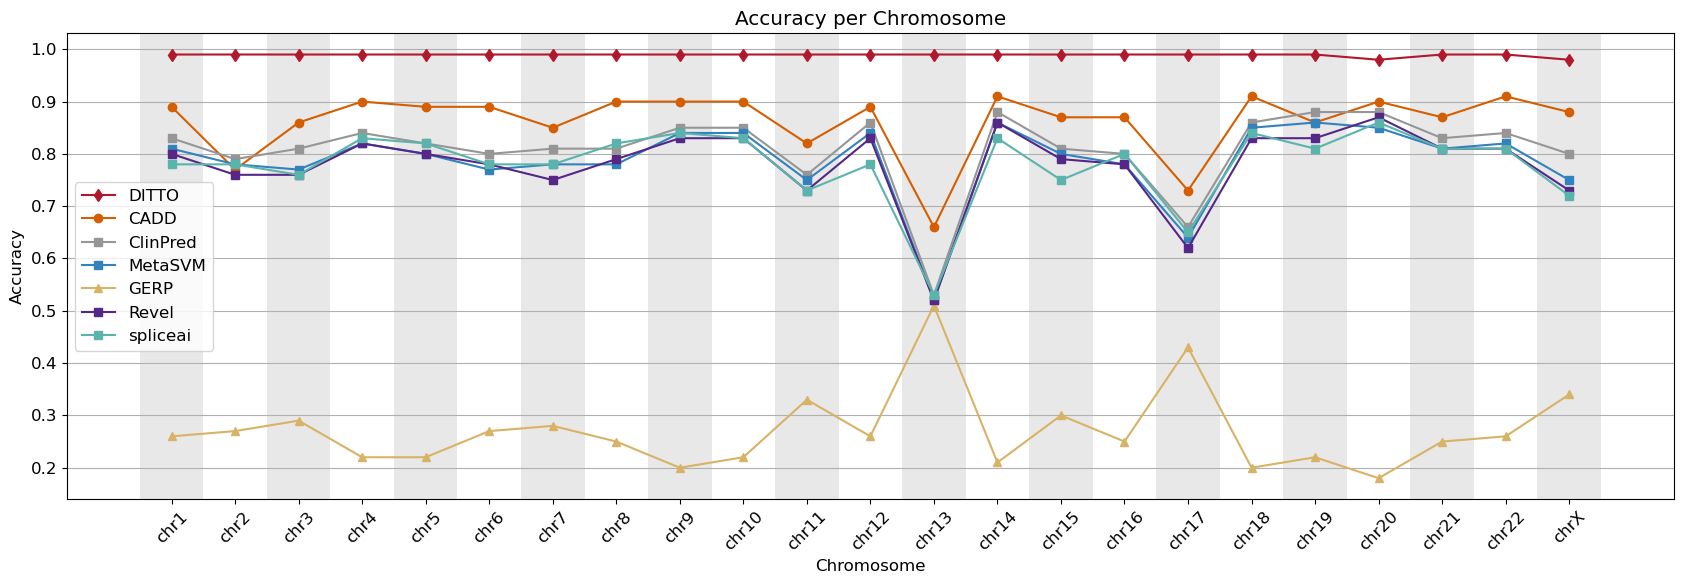

In [23]:
# Extract the chromosome names and values in the specified order
chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19',
 'chr20', 'chr21', 'chr22', 'chrX']
CADD_values = [float(acc_scores_chr[chr]['CADD']) for chr in chromosomes]
ClinPred_values = [float(acc_scores_chr[chr]['ClinPred']) for chr in chromosomes]
Revel_values = [float(acc_scores_chr[chr]['Revel']) for chr in chromosomes]
MetaSVM_values = [float(acc_scores_chr[chr]['MetaSVM']) for chr in chromosomes]
GERP_values = [float(acc_scores_chr[chr]['GERP']) for chr in chromosomes]
DITTO_values = [float(acc_scores_chr[chr]['DITTO']) for chr in chromosomes]
spliceai_values = [float(acc_scores_chr[chr]['spliceai']) for chr in chromosomes]

# Create a Manhattan-style bar plot
plt.figure(figsize=(17, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(chromosomes, DITTO_values, marker='d', label='DITTO', linestyle='-', c= default_colors['DITTO'])
plt.plot(chromosomes, CADD_values, marker='o', label='CADD', linestyle='-', c= default_colors['CADD'])
plt.plot(chromosomes, ClinPred_values, marker='s', label='ClinPred', linestyle='-', c= default_colors['ClinPred'])
plt.plot(chromosomes, MetaSVM_values, marker='s', label='MetaSVM', linestyle='-', c= default_colors['MetaSVM'])
plt.plot(chromosomes, GERP_values, marker='^', label='GERP', linestyle='-', c= default_colors['GERP'])
plt.plot(chromosomes, Revel_values, marker='s', label='Revel', linestyle='-', c= default_colors['Revel'])
plt.plot(chromosomes, spliceai_values, marker='s', label='spliceai', linestyle='-', c= default_colors['spliceai'])

plt.xlabel('Chromosome')
plt.ylabel('Accuracy')
plt.title('Accuracy per Chromosome')
plt.legend()
plt.grid(axis='y')

# Add shaded rectangles instead of grid lines
ax = plt.gca()
for i in range(len(chromosomes)):
    if i % 2 == 0:  # Shade every other chromosome
        ax.axvspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.5)

plt.xticks(range(len(chromosomes)), chromosomes, rotation=45)  # Set x-axis labels

plt.tight_layout()
plt.show()


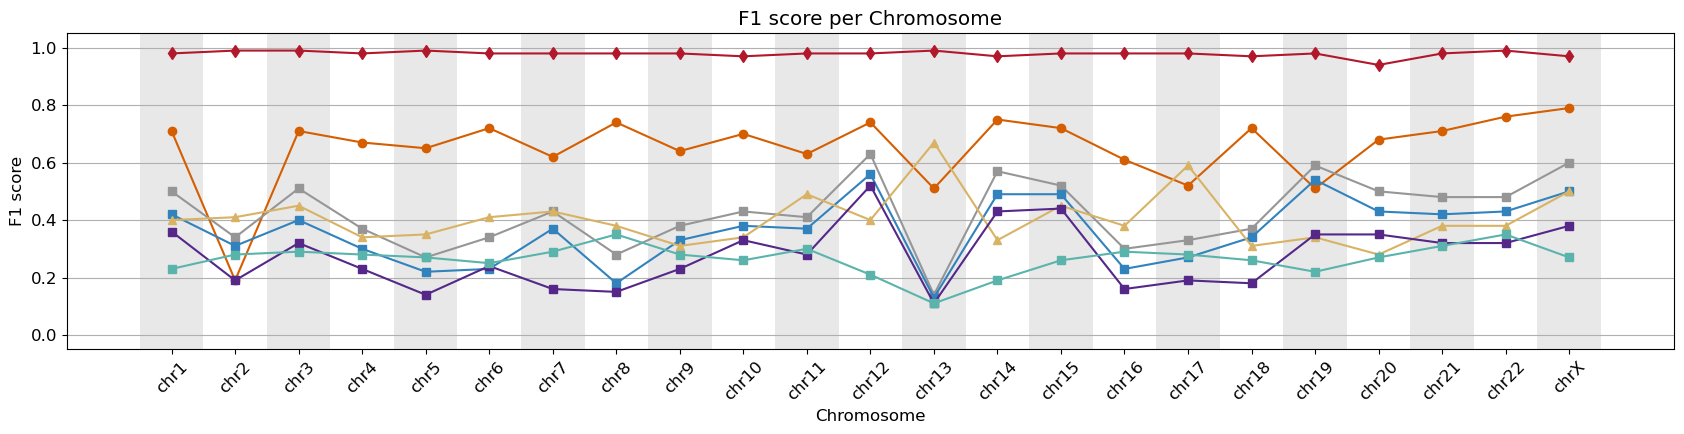

In [24]:
# Extract the chromosome names and values in the specified order
chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19',
 'chr20', 'chr21', 'chr22', 'chrX']
CADD_values = [float(f1_scores_chr[chr]['CADD']) for chr in chromosomes]
ClinPred_values = [float(f1_scores_chr[chr]['ClinPred']) for chr in chromosomes]
Revel_values = [float(f1_scores_chr[chr]['Revel']) for chr in chromosomes]
MetaSVM_values = [float(f1_scores_chr[chr]['MetaSVM']) for chr in chromosomes]
GERP_values = [float(f1_scores_chr[chr]['GERP']) for chr in chromosomes]
DITTO_values = [float(f1_scores_chr[chr]['DITTO']) for chr in chromosomes]
spliceai_values = [float(f1_scores_chr[chr]['spliceai']) for chr in chromosomes]

# Create a Manhattan-style bar plot
plt.figure(figsize=(17, 4.5))
plt.rcParams.update({'font.size': 12})
plt.plot(chromosomes, DITTO_values, marker='d', label='DITTO', linestyle='-', c= default_colors['DITTO'])
plt.plot(chromosomes, CADD_values, marker='o', label='CADD', linestyle='-', c= default_colors['CADD'])
plt.plot(chromosomes, ClinPred_values, marker='s', label='ClinPred', linestyle='-', c= default_colors['ClinPred'])
plt.plot(chromosomes, MetaSVM_values, marker='s', label='MetaSVM', linestyle='-', c= default_colors['MetaSVM'])
plt.plot(chromosomes, GERP_values, marker='^', label='GERP', linestyle='-', c= default_colors['GERP'])
plt.plot(chromosomes, Revel_values, marker='s', label='Revel', linestyle='-', c= default_colors['Revel'])
plt.plot(chromosomes, spliceai_values, marker='s', label='spliceai', linestyle='-', c= default_colors['spliceai'])

plt.xlabel('Chromosome')
plt.ylabel('F1 score')
plt.title('F1 score per Chromosome')
# plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.grid(axis='y')

# Add shaded rectangles instead of grid lines
ax = plt.gca()
for i in range(len(chromosomes)):
    if i % 2 == 0:  # Shade every other chromosome
        ax.axvspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.5)

plt.xticks(range(len(chromosomes)), chromosomes, rotation=45)  # Set x-axis labels
plt.ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()


In [25]:
# Assuming you have a DataFrame called df with a column called 'column1'
# and a dictionary called my_dict

var1['so'] = var1['consequence'].map(var_dict)
var1['so1'] = var1['so']


In [27]:
pd.pivot_table(var1,  index='so', columns='chrom', values='so1',
                          aggfunc='count').T#.to_csv("/Users/tarunmamidi/Documents/Development/DITTO/data/processed/var_number_type_chr.csv") #.sort_values(by=['low_impact','high_impact'], ascending=False)
#var1['chromo'] = var1['chrom']
#pd.pivot_table(var1,  index='chromo', columns='so', values='chrom',
#                          aggfunc='count')#.sort_values(by=['low_impact','high_impact'], ascending=False)


so     3 prime UTR  5 prime UTR  complex substitution  exon loss variant   
chrom                                                                      
chr1         105.0         28.0                   NaN                NaN  \
chr10         58.0         17.0                   NaN                NaN   
chr11         86.0         18.0                   2.0                NaN   
chr12         73.0         23.0                   1.0                NaN   
chr13         26.0          4.0                   1.0                NaN   
chr14         40.0         26.0                   1.0                NaN   
chr15         71.0         10.0                   1.0                NaN   
chr16        116.0         14.0                   1.0                NaN   
chr17        126.0         76.0                   1.0                NaN   
chr18         20.0          6.0                   NaN                NaN   
chr19        105.0         12.0                   1.0                NaN   
chr2         137.0         94.0                   1.0                NaN   
chr20         36.0          9.0                   NaN                NaN   
chr21         26.0          5.0                   NaN                NaN   
chr22         38.0         12.0                   NaN                NaN   
chr3         145.0         20.0                   NaN                2.0   
chr4          60.0         16.0                   2.0                NaN   
chr5         314.0         24.0                   NaN                NaN   
chr6          63.0         10.0                   NaN                NaN   
chr7          93.0         25.0                   2.0                NaN   
chr8         110.0         18.0                   NaN                NaN   
chr9         102.0         21.0                   NaN                NaN   
chrX          55.0         18.0                   NaN                NaN   

so     frameshift elongation  frameshift truncation  inframe deletion   
chrom                                                                   
chr1                    36.0                  109.0               6.0  \
chr10                   29.0                   36.0               3.0   
chr11                   78.0                  139.0              10.0   
chr12                   26.0                   70.0               7.0   
chr13                  164.0                  338.0               1.0   
chr14                   18.0                   33.0               3.0   
chr15                   26.0                   62.0               4.0   
chr16                   38.0                  132.0              12.0   
chr17                  161.0                  375.0              13.0   
chr18                    9.0                   19.0               NaN   
chr19                   30.0                   52.0               7.0   
chr2                   120.0                  210.0               5.0   
chr20                   10.0                   18.0               2.0   
chr21                   10.0                   17.0               NaN   
chr22                   13.0                   22.0               2.0   
chr3                    52.0                   91.0               4.0   
chr4                    26.0                   39.0               2.0   
chr5                    44.0                  103.0               4.0   
chr6                    26.0                   59.0               9.0   
chr7                    37.0                  101.0               4.0   
chr8                    19.0                   50.0               1.0   
chr9                    30.0                   47.0               7.0   
chrX                    22.0                   49.0               8.0   

so     inframe insertion  intergenic  intron  missense  other  other RNA   
chrom                                                                      
chr1                 1.0        80.0   618.0     400.0    6.0      462.0  \
chr10                1.0        41.0   359.0 

<Axes: xlabel='so'>

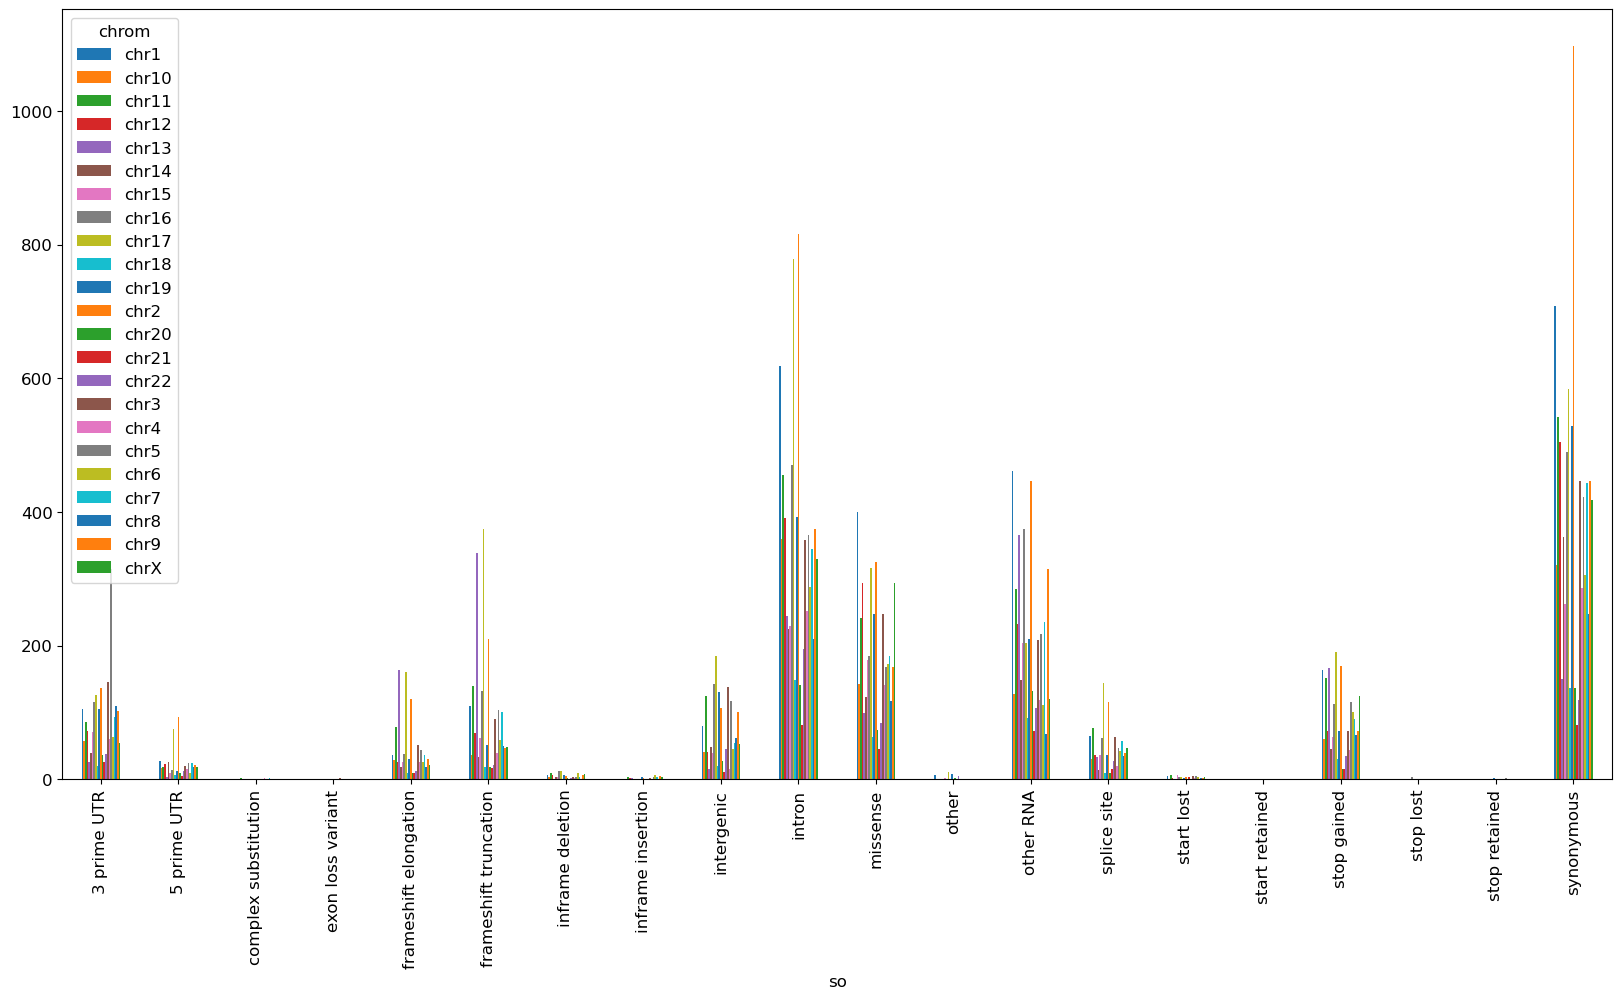

In [28]:
pd.pivot_table(var1,  index='so', columns='chrom', values='so1',
                          aggfunc='count').plot(kind='bar', figsize=(20,10), linewidth=3)


In [36]:
var1[var1['chrom']=='chr13']['clingen.disease'].value_counts()


breast-ovarian cancer, familial, susceptibility to, 2;Fanconi anemia complementation group D1    1137
Wilson disease                                                                                     70
autosomal recessive nonsyndromic deafness;syndromic genetic deafness                               26
xeroderma pigmentosum group G                                                                       9
auditory neuropathy                                                                                 8
Waardenburg syndrome type 4A;Waardenburg syndrome type 4A                                           4
nonsyndromic genetic deafness;Clouston syndrome                                                     4
Leigh syndrome                                                                                      2
factor VII deficiency                                                                               2
high myopia-sensorineural deafness syndrome                                       

Text(0.5, 1.0, 'Confusion matrix of DITTO for chr13 variants')

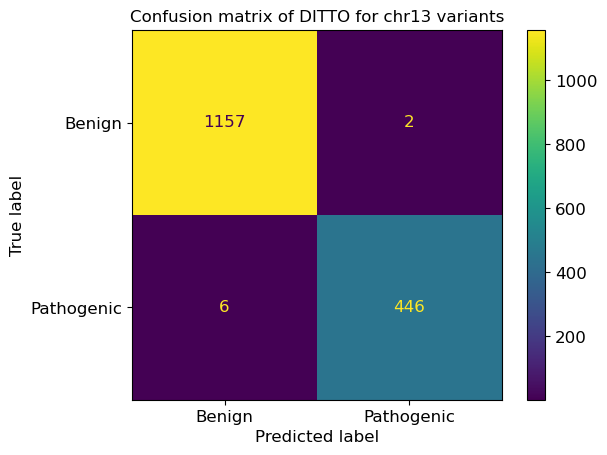

In [71]:
name = 'chr13'
clf = 'DITTO'
index_list = var1[var1.chrom == name].index
x = bench[bench.index.isin(index_list)][clf].values

cm = confusion_matrix(Y_test[index_list],x.round())
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ 'Benign', 'Pathogenic'])
cm.plot()
plt.title(f"Confusion matrix of DITTO for chr13 variants", fontsize=12)


In [77]:
var1.consequence.value_counts()


synonymous_variant                                                                  8683
intron_variant                                                                      6928
missense_variant                                                                    4066
processed_transcript                                                                2703
stop_gained                                                                         1944
frameshift_truncation                                                               1907
NMD_transcript_variant,3_prime_UTR_variant                                          1405
intron_variant,splice_site_variant                                                   919
frameshift_elongation                                                                900
intron_variant,NMD_transcript_variant                                                647
2kb_downstream_variant                                                               624
2kb_upstream_variant 

In [29]:
var_type_order = ['missense', 'stop lost','stop gained', 'start lost','synonymous', 'splice site','frameshift truncation','frameshift elongation', 'complex substitution', 'exon loss variant', 'inframe insertion','inframe deletion','intron', '3 prime UTR',  '5 prime UTR', 'other RNA','intergenic','other']


Text(0.5, 1.0, 'Confusion matrix of DITTO for intergenic variants')

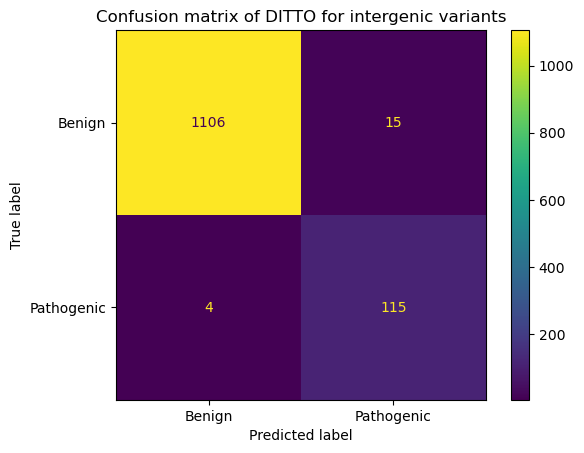

In [22]:
name = 'intergenic'
clf = 'DITTO'
index_list = var1[var1.so == name].index
x = bench[bench.index.isin(index_list)][clf].values

cm = confusion_matrix(Y_test[index_list],x.round())
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ 'Benign', 'Pathogenic'])
cm.plot()
plt.title(f"Confusion matrix of DITTO for intergenic variants", fontsize=12)

In [23]:
1106+115

1221

In [25]:
1221/1240

0.9846774193548387

In [30]:

roc_scores = {}
prc_scores = {}
f1_scores = {}

for consq in var_type_order:
        roc_scores[consq] = {}
        prc_scores[consq] = {}
        f1_scores[consq] = {}

        index_list = var1[var1.so == consq].index
        missense = bench[bench.index.isin(index_list)]

        missense_y = var1[var1.index.isin(index_list)]['class'].values

        for name in list(missense.columns):
                if name in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
                    x_norm = (missense-np.min(missense))/(np.max(missense)-np.min(missense))
                else:
                    x_norm = missense
                try:
                        auc = accuracy_score(missense_y, x_norm[name].fillna(0).values)
                except:
                        auc=0
                roc_scores[consq][name] = round(auc,2)
                try:
                        prc = precision_score(missense_y, x_norm[name].fillna(0).values)
                except:
                        prc=0
                prc_scores[consq][name] = round(prc,2)
                try:
                        f1 = f1_score(missense_y, x_norm[name].fillna(0).values.round(), zero_division=1.0)
                except:
                        f1=0
                f1_scores[consq][name] = round(f1,2)

#pd.DataFrame(roc_scores).to_csv("/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO4NF/data/processed/tuning/NN_roc_scores.csv")
#pd.DataFrame(prc_scores).to_csv("/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO4NF/data/processed/tuning/NN_prc_scores.csv")
pd.DataFrame(f1_scores).to_csv("/Users/tarunmamidi/Documents/Development/DITTO-1/data/f1_scores_type_overall_1_transcript.csv")


In [192]:
f1_scores


{'NMD': {'DITTO': 0.98,
  'CADD': 0.81,
  'ClinPred': 0.42,
  'MetaSVM': 0.0,
  'GERP': 0.0,
  'spliceai': 0.38,
  'Revel': 0.01,
  'DANN': 0.33,
  'SIFT': 0.33},
 'missense': {'DITTO': 0.98,
  'CADD': 0.73,
  'ClinPred': 0.97,
  'MetaSVM': 0.0,
  'GERP': 0.0,
  'spliceai': 0.07,
  'Revel': 0.83,
  'DANN': 0.61,
  'SIFT': 0.15},
 'stop lost': {'DITTO': 0.86,
  'CADD': 1.0,
  'ClinPred': 0.0,
  'MetaSVM': 0.0,
  'GERP': 0.0,
  'spliceai': 0.0,
  'Revel': 0.0,
  'DANN': 1.0,
  'SIFT': 1.0},
 'stop gained': {'DITTO': 1.0,
  'CADD': 0.99,
  'ClinPred': 0.08,
  'MetaSVM': 0.0,
  'GERP': 0.0,
  'spliceai': 0.04,
  'Revel': 0.0,
  'DANN': 0.89,
  'SIFT': 1.0},
 'start lost': {'DITTO': 0.98,
  'CADD': 0.96,
  'ClinPred': 0.97,
  'MetaSVM': 0.0,
  'GERP': 0.0,
  'spliceai': 0.03,
  'Revel': 0.67,
  'DANN': 0.9,
  'SIFT': 0.24},
 'synonymous': {'DITTO': 0.83,
  'CADD': 0.01,
  'ClinPred': 0.17,
  'MetaSVM': 0.0,
  'GERP': 0.0,
  'spliceai': 0.56,
  'Revel': 0.0,
  'DANN': 0.0,
  'SIFT': 0.0},
 '

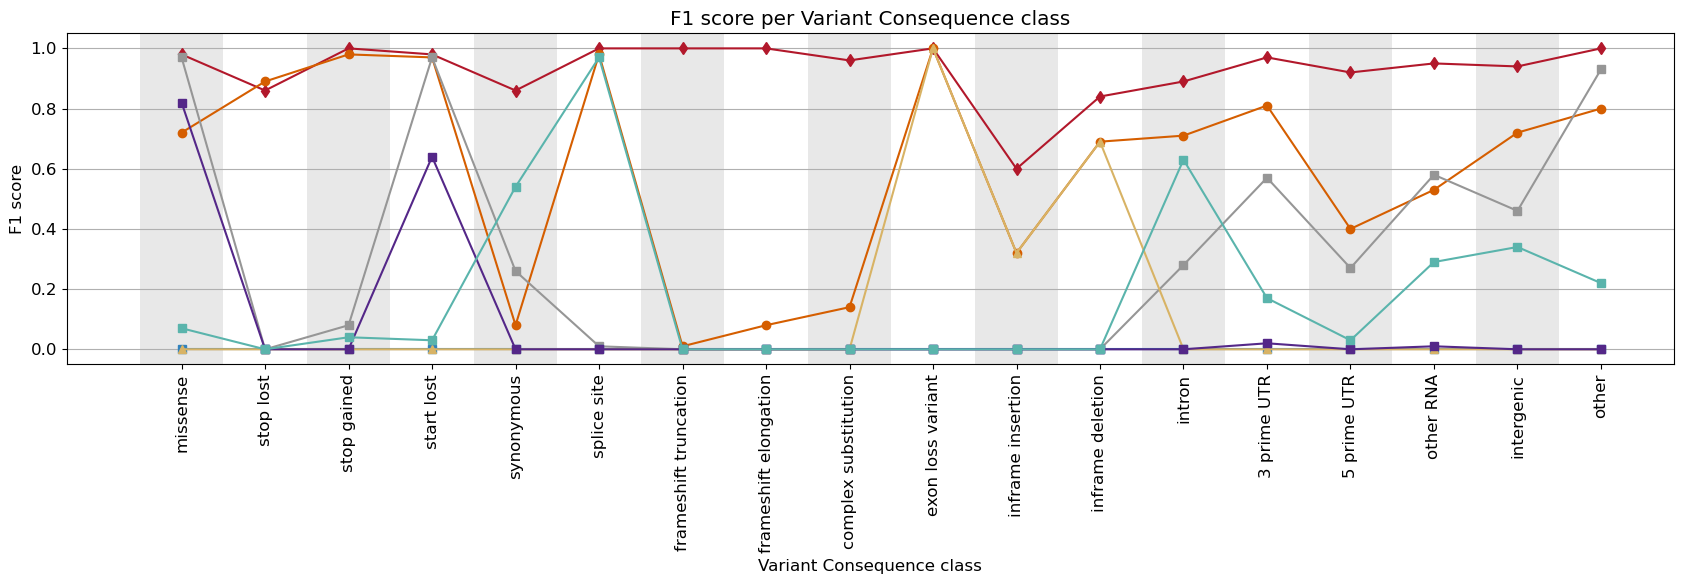

In [31]:
# Extract the chromosome names and values in the specified order
chromosomes = f1_scores.keys()
CADD_values = [float(f1_scores[chr]['CADD']) for chr in chromosomes]
ClinPred_values = [float(f1_scores[chr]['ClinPred']) for chr in chromosomes]
Revel_values = [float(f1_scores[chr]['Revel']) for chr in chromosomes]
MetaSVM_values = [float(f1_scores[chr]['MetaSVM']) for chr in chromosomes]
GERP_values = [float(f1_scores[chr]['GERP']) for chr in chromosomes]
DITTO_values = [float(f1_scores[chr]['DITTO']) for chr in chromosomes]
spliceai_values = [float(f1_scores[chr]['spliceai']) for chr in chromosomes]

# Create a Manhattan-style bar plot
plt.figure(figsize=(17, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(chromosomes, DITTO_values, marker='d', label='DITTO', linestyle='-', c= default_colors['DITTO'])
plt.plot(chromosomes, CADD_values, marker='o', label='CADD', linestyle='-', c= default_colors['CADD'])
plt.plot(chromosomes, ClinPred_values, marker='s', label='ClinPred', linestyle='-', c= default_colors['ClinPred'])
plt.plot(chromosomes, MetaSVM_values, marker='s', label='MetaSVM', linestyle='-', c= default_colors['MetaSVM'])
plt.plot(chromosomes, GERP_values, marker='^', label='GERP', linestyle='-', c= default_colors['GERP'])
plt.plot(chromosomes, Revel_values, marker='s', label='Revel', linestyle='-', c= default_colors['Revel'])
plt.plot(chromosomes, spliceai_values, marker='s', label='spliceAi', linestyle='-', c= default_colors['spliceai'])

plt.xlabel('Variant Consequence class')
plt.ylabel('F1 score')
plt.title('F1 score per Variant Consequence class')
#plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.grid(axis='y')

# Add shaded rectangles instead of grid lines
ax = plt.gca()
for i in range(len(chromosomes)):
    if i % 2 == 0:  # Shade every other chromosome
        ax.axvspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.5)

plt.xticks(range(len(chromosomes)), chromosomes, rotation=90)  # Set x-axis labels
#plt.gca().set_xticklabels(var_type_order)
plt.tight_layout()
plt.show()


In [76]:
var1[var1['so'].isin(['start retained', 'stop retained'])][['consequence','so','DITTO','cadd.phred','spliceai','gene','protein_hgvs','cdna_hgvs','chrom','pos','ref_base','alt_base','transcript','clingen.classification','class']]


consequence              so         DITTO  cadd.phred   
11729  start_retained_variant  start retained  2.516013e-02       9.129  \
25154   stop_retained_variant   stop retained  5.960464e-08       6.865   
30215   stop_retained_variant   stop retained  0.000000e+00       4.401   
31259   stop_retained_variant   stop retained  0.000000e+00       6.762   
35592   stop_retained_variant   stop retained  0.000000e+00       7.377   
35803   stop_retained_variant   stop retained  0.000000e+00       8.260   

       spliceai      gene protein_hgvs  cdna_hgvs  chrom        pos ref_base   
11729    0.0004      DOLK      p.Met1=     c.1dup   chr9  128947303        -  \
25154    0.0004      REST    p.Ter315=   c.944A>G   chr4   56932151        A   
30215    0.0004   SLC26A2    p.Ter740=  c.2220A>G   chr5  149981813        A   
31259    0.0004      GM2A    p.Ter194=   c.582A>G   chr5  151267451        A   
35592    0.0004  CEACAM16    p.Ter426=  c.1278A>G  chr19   44710506        A   
35803    0.0004   BLOC1S3    p.Ter203=   c.609G>A  chr19   45179905        G   

      alt_base       transcript clingen.classification  class  
11729        T  ENST00000372586                    NaN      0  
25154        G  ENST00000622863                    NaN      0  
30215        G  ENST00000286298                    NaN      0  
31259        G  ENST00000357164                    NaN      0  
35592        G  ENST00000587331               Moderate      0  
35803        A  ENST00000587722                    NaN      0

In [42]:
print(var1[var1['consequence'].str.contains("missense_variant")].shape)
var1[var1['consequence'].str.contains("missense_variant")].chrom.value_counts()


(4376, 256)


chr1     405
chr2     329
chr17    320
chrX     298
chr12    296
chr3     252
chr19    249
chr11    249
chr16    188
chr15    186
chr7     185
chr6     176
chr5     173
chr9     169
chr10    144
chr4     143
chr14    123
chr8     119
chr13     99
chr22     85
chr20     75
chr18     64
chr21     49
Name: chrom, dtype: int64

In [32]:
bench = var1[['DITTO','clinpred.score','metasvm.score','vest.score','revel.score','cadd.phred','gerp.gerp_rs','dann.score','sift.score','spliceai']]
bench.columns = ['DITTO','ClinPred','MetaSVM','VEST','Revel','CADD','GERP','DANN','SIFT','spliceai']


In [81]:
var1[var1.index.isin(index_list)]['class'].values

array([1, 1, 1, ..., 0, 0, 0])

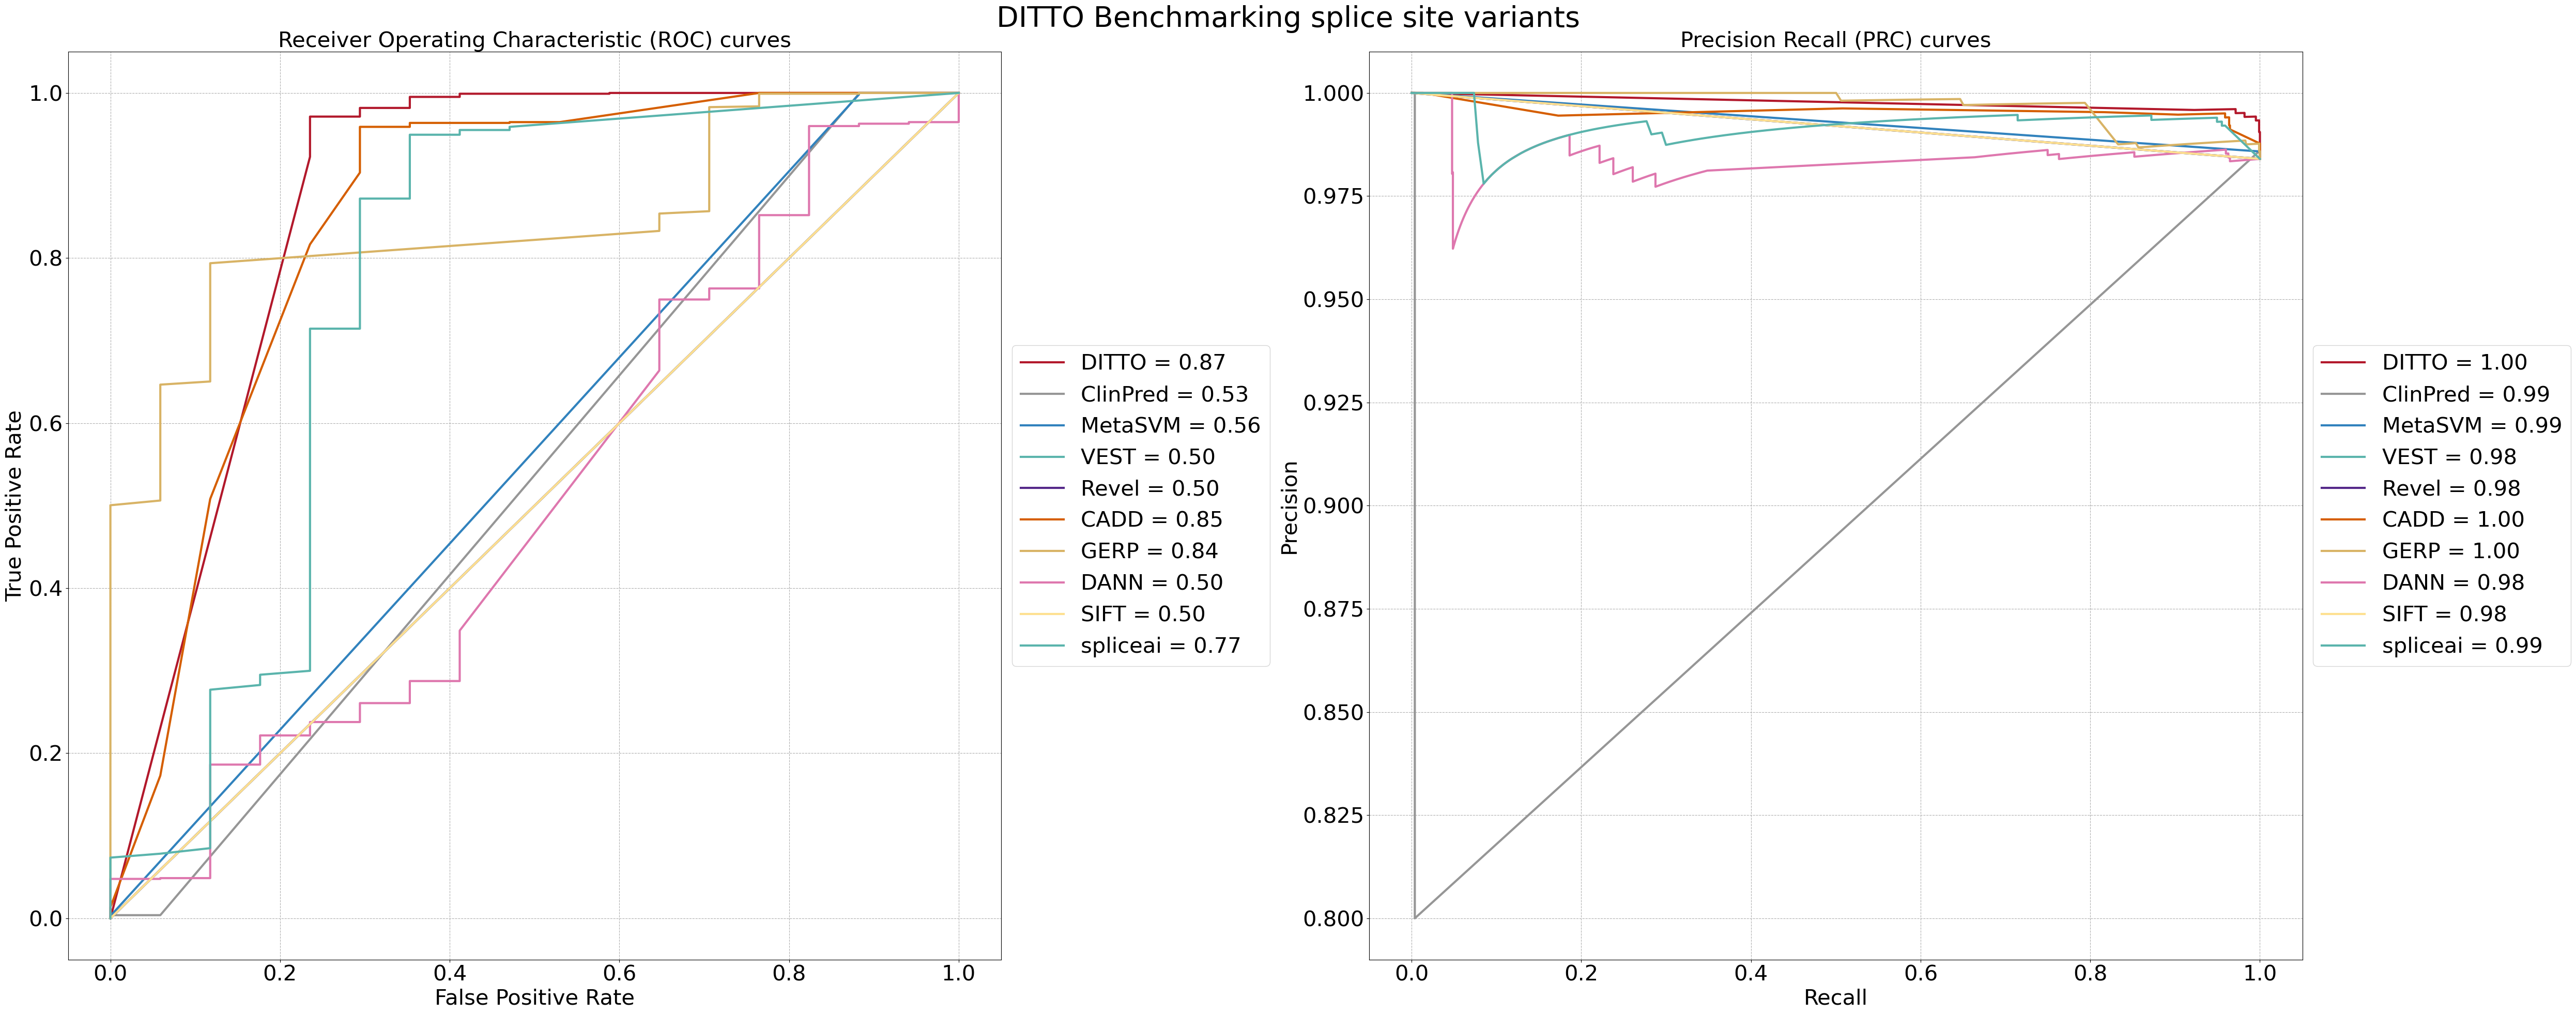

In [33]:

fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(50, 20))

fig.suptitle(f"DITTO Benchmarking splice site variants", fontsize=40)
fsize = 30
ax_roc.tick_params(axis='both', which='major', labelsize=fsize)
ax_prc.tick_params(axis='both', which='major', labelsize=fsize)
ax_roc.set_xlabel("False Positive Rate", fontsize=fsize)
ax_roc.set_ylabel("True Positive Rate", fontsize=fsize)
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves", fontsize=fsize)
ax_roc.grid(linestyle="--")
ax_prc.set_xlabel("Recall", fontsize=fsize)
ax_prc.set_ylabel("Precision", fontsize=fsize)
ax_prc.set_title("Precision Recall (PRC) curves", fontsize=fsize)
ax_prc.grid(linestyle="--")

scores = {}
scores['roc'] = {}
scores['prc'] = {}
scores['f1'] = {}
for name in list(bench.columns):
        index_list = var1[var1.so == 'splice site'].index
        x = bench[bench.index.isin(index_list)][name].values
        Y_test1 = var1[var1.index.isin(index_list)]['class'].values
        if name in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
            y_true = (x-np.min(x))/(np.max(x)-np.min(x))
        else:
            y_true = x
        fpr, tpr, _ = roc_curve(Y_test1, y_true)
        auc = roc_auc_score(Y_test1, y_true, average='weighted')
        auc = "{:.2f}".format(auc)
        scores['roc'][name] = auc
        ax_roc.plot(fpr,tpr,label=str(name)+" = "+str(auc), linewidth=3, c= default_colors[name])
        precision, recall, _ = precision_recall_curve(Y_test1, y_true)
        prc = average_precision_score(Y_test1, y_true, average='weighted')
        prc = "{:.2f}".format(prc)
        scores['prc'][name] = prc
        #f1 = f1_score(Y_test, y_true, sample_weight= weights, average='weighted')
        #scores['f1'][name] = "{:.2f}".format(np.nanmean(f1))

        ax_prc.plot(recall,precision,label=str(name)+" = "+str(prc), linewidth=3, c= default_colors[name])
ax_prc.legend( bbox_to_anchor=(1,0.5), loc="center left", fontsize=fsize)
ax_roc.legend( bbox_to_anchor=(1,0.5), loc="center left", fontsize=fsize)
fig.tight_layout()
#plt.savefig(
#            f"/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/processed/train_data_3_star/benchmarking/DITTO_ROC_PRC_benchmarking.pdf",
#            format="pdf",
#            dpi=1000,
#            bbox_inches="tight",
#        )


In [37]:
var1['class1'] = var1['class']


In [44]:
var1[var1['so'] == 'missense'].shape[0]

4082

In [34]:
def f1plot(var_type):
    print(f"Accuracy: {accuracy_score(var1[var1['so'] == var_type]['class'],  var1[var1['so'] == var_type]['DITTO'].round())}")
    chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
    acc_scores_chr = {}
    prc_scores_chr = {}
    f1_scores_chr = {}
    for name in var1.chrom.unique():
        acc_scores_chr[name] = {}
        prc_scores_chr[name] = {}
        f1_scores_chr[name] = {}
        for clf in bench.columns:
            index_list = var1[(var1.chrom == name) & (var1['so'] == var_type)].index
            x = bench[bench.index.isin(index_list)][clf].values
            if np.unique(x).size == 1 and clf in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
                x_norm = np.zeros_like(x)
            elif clf in ['CADD', 'MetaSVM','mutation_assessor','provean','GERP']:
                x_norm = (x-np.min(x))/(np.max(x)-np.min(x))
            else:
                x_norm = x

            acc = accuracy_score(var1[var1.index.isin(index_list)]['class'],  x_norm.round())
            acc = "{:.2f}".format(acc)
            acc_scores_chr[name][clf] = acc

            prc = precision_score(var1[var1.index.isin(index_list)]['class'],  x_norm.round())
            prc = "{:.2f}".format(prc)
            prc_scores_chr[name][clf] = prc

            f1 = f1_score(var1[var1.index.isin(index_list)]['class'], x_norm.round(), zero_division=1.0)
            f1_scores_chr[name][clf] = "{:.2f}".format(f1)

    pd.DataFrame(f1_scores_chr)[chromosomes].to_csv(f"/Users/tarunmamidi/Documents/Development/DITTO-1/data/f1_scores_{var_type}_chr.csv")
    #pd.DataFrame(acc_scores_chr).to_csv(f"/Users/tarunmamidi/Documents/Development/DITTO/data/processed/accuracy_scores_{var_type}_chr_1_transcript.csv")
    #pd.DataFrame(prc_scores_chr).to_csv(f"/Users/tarunmamidi/Documents/Development/DITTO/data/processed/precision_scores_{var_type}_chr_1_transcript.csv")

    var_num = var1[var1['so'] == var_type].shape[0]

    # Extract the chromosome names and values in the specified order

    CADD_values = [float(f1_scores_chr[chr]['CADD']) for chr in chromosomes]
    ClinPred_values = [float(f1_scores_chr[chr]['ClinPred']) for chr in chromosomes]
    Revel_values = [float(f1_scores_chr[chr]['Revel']) for chr in chromosomes]
    MetaSVM_values = [float(f1_scores_chr[chr]['MetaSVM']) for chr in chromosomes]
    GERP_values = [float(f1_scores_chr[chr]['GERP']) for chr in chromosomes]
    DITTO_values = [float(f1_scores_chr[chr]['DITTO']) for chr in chromosomes]
    spliceai_values = [float(f1_scores_chr[chr]['spliceai']) for chr in chromosomes]

    # Create a Manhattan-style bar plot
    plt.figure(figsize=(17, 4.5))
    plt.rcParams.update({'font.size': 12})
    plt.plot(chromosomes, DITTO_values, marker='d', label='DITTO', linestyle='-', c= default_colors['DITTO'])
    plt.plot(chromosomes, CADD_values, marker='o', label='CADD', linestyle='-', c= default_colors['CADD'])
    plt.plot(chromosomes, ClinPred_values, marker='s', label='ClinPred', linestyle='-', c= default_colors['ClinPred'])
    plt.plot(chromosomes, MetaSVM_values, marker='s', label='MetaSVM', linestyle='-', c= default_colors['MetaSVM'])
    plt.plot(chromosomes, GERP_values, marker='^', label='GERP', linestyle='-', c= default_colors['GERP'])
    plt.plot(chromosomes, Revel_values, marker='s', label='Revel', linestyle='-', c= default_colors['Revel'])
    plt.plot(chromosomes, spliceai_values, marker='s', label='spliceAI', linestyle='-', c= default_colors['spliceai'])

    plt.xlabel('Chromosome')
    plt.ylabel('F1 score')
    plt.title(f"F1 score per Chromosome for {var_type} variants ({var_num} variants)")
    #plt.legend()
    plt.grid(axis='y')

    # Add shaded rectangles instead of grid lines
    ax = plt.gca()
    for i in range(len(chromosomes)):
        if i % 2 == 0:  # Shade every other chromosome
            ax.axvspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.5)

    plt.xticks(range(len(chromosomes)), chromosomes, rotation=45)  # Set x-axis labels
    plt.ylim(-0.05, 1.05)
    plt.tight_layout()
    plt.show()


In [35]:
for consq in var1.so.unique():
    print(consq)

missense
stop gained
frameshift truncation
frameshift elongation
splice site
intergenic
intron
3 prime UTR
other RNA
other
start lost
synonymous
stop lost
5 prime UTR
inframe deletion
complex substitution
exon loss variant
inframe insertion
start retained
stop retained


In [38]:
for consq in var1.so.unique():
    pd.pivot_table(var1[var1['so'] == consq],  index='class', columns='chrom', values='class1',
                          aggfunc='count').to_csv(f"/Users/tarunmamidi/Documents/Development/DITTO-1/data/var_number_class_{consq}_chr.csv") #.sort_values(by=['low_impact','high_impact'], ascending=False)


In [39]:
var1[(var1['so'] == "intergenic") ]['consequence'].value_counts()

consequence
2kb_downstream_variant                           624
2kb_upstream_variant                             616
2kb_downstream_variant,NMD_transcript_variant    343
2kb_upstream_variant,NMD_transcript_variant       49
2kb_upstream_variant,NSD_transcript                7
2kb_downstream_variant,NSD_transcript              4
Name: count, dtype: int64

In [167]:
var1[(var1['so'] == "intergenic") & (var1['chrom']=='chr21')][['consequence','so','DITTO','clingen.classification','class','cadd.phred','spliceai','gene','protein_hgvs','cdna_hgvs','chrom','pos','ref_base','alt_base','transcript']]

consequence          so     DITTO clingen.classification   
11255  2kb_downstream_variant  intergenic  0.051278             Definitive  \
11532  2kb_downstream_variant  intergenic  0.032473                    NaN   
13660  2kb_downstream_variant  intergenic  0.002689                    NaN   
13910  2kb_downstream_variant  intergenic  0.002124                    NaN   
15131  2kb_downstream_variant  intergenic  0.000795                    NaN   
15214  2kb_downstream_variant  intergenic  0.000741               Moderate   
15494    2kb_upstream_variant  intergenic  0.000593                    NaN   
19224  2kb_downstream_variant  intergenic  0.000025                    NaN   
33581    2kb_upstream_variant  intergenic  0.000000                    NaN   

       class  cadd.phred  spliceai     gene protein_hgvs   cdna_hgvs  chrom   
11255      0       4.872    0.0004  TMPRSS3          NaN  c.*1810C>T  chr21  \
11532      0      17.230    0.0004    ITGB2          NaN   c.*989G>A  chr21   
13660      0       9.200    0.0004   DYRK1A          NaN   c.*394C>T  chr21   
13910      0       9.559    0.0004   DYRK1A          NaN   c.*253A>G  chr21   
15131      0      17.750    0.0004   DYRK1A          NaN   c.*500A>G  chr21   
15214      0       2.017    0.0004    KCNE1          NaN  c.*1815A>G  chr21   
15494      0       5.690    0.0004     SOD1          NaN   c.-156G>C  chr21   
19224      0      21.000    0.0004  SLC19A1          NaN  c.*3457C>A  chr21   
33581      0      10.440    0.0004    CRYAA          NaN   c.-620C>T  chr21   

            pos ref_base alt_base       transcript  
11255  42380172        G        A  ENST00000398397  
11532  44907014        C        T  ENST00000397846  
13660  37512348        C        T  ENST00000398956  
13910  37512207        A        G  ENST00000398956  
15131  37512454        A        G  ENST00000398956  
15214  34447430        T        C  ENST00000399284  
15494  31659614        G        C  ENST00000389995  
19224  45512201        G        T  ENST00000311124  
33581  43169105        C        T  ENST00000398133

In [171]:
index_list = var1[(var1['consequence'] == '2kb_upstream_variant')].index
x = bench[bench.index.isin(index_list)][clf].values
f1_score(var1[var1.index.isin(index_list)]['class'], x.round())

0.912

Accuracy: 0.9866098600121729


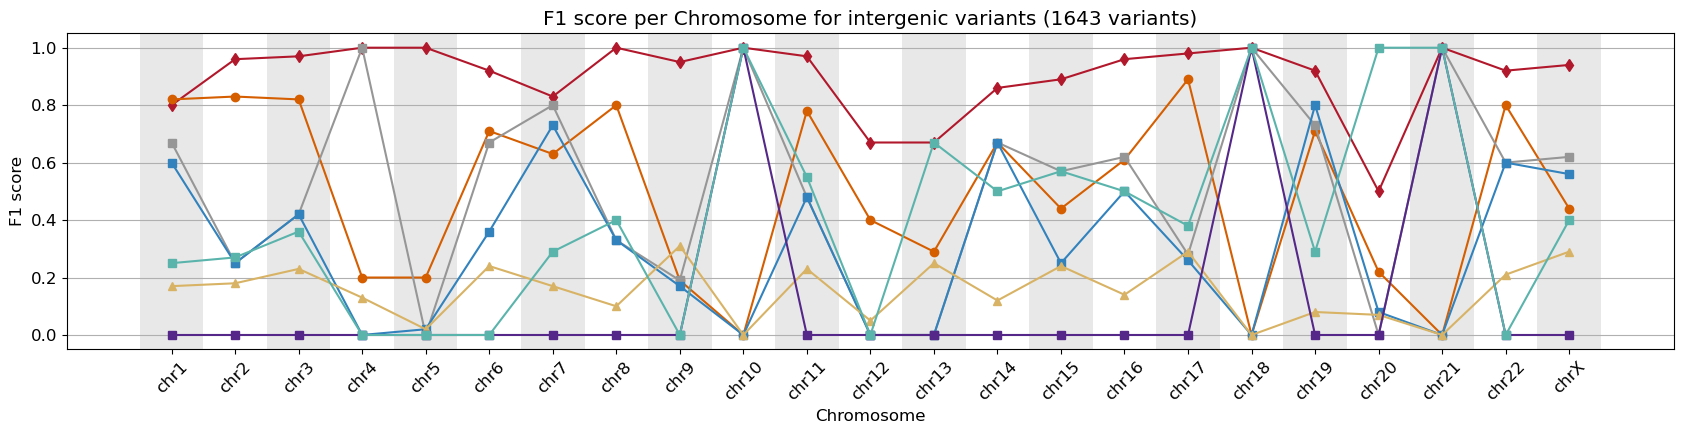

In [41]:
f1plot('intergenic')


Accuracy: 0.9795871027603804


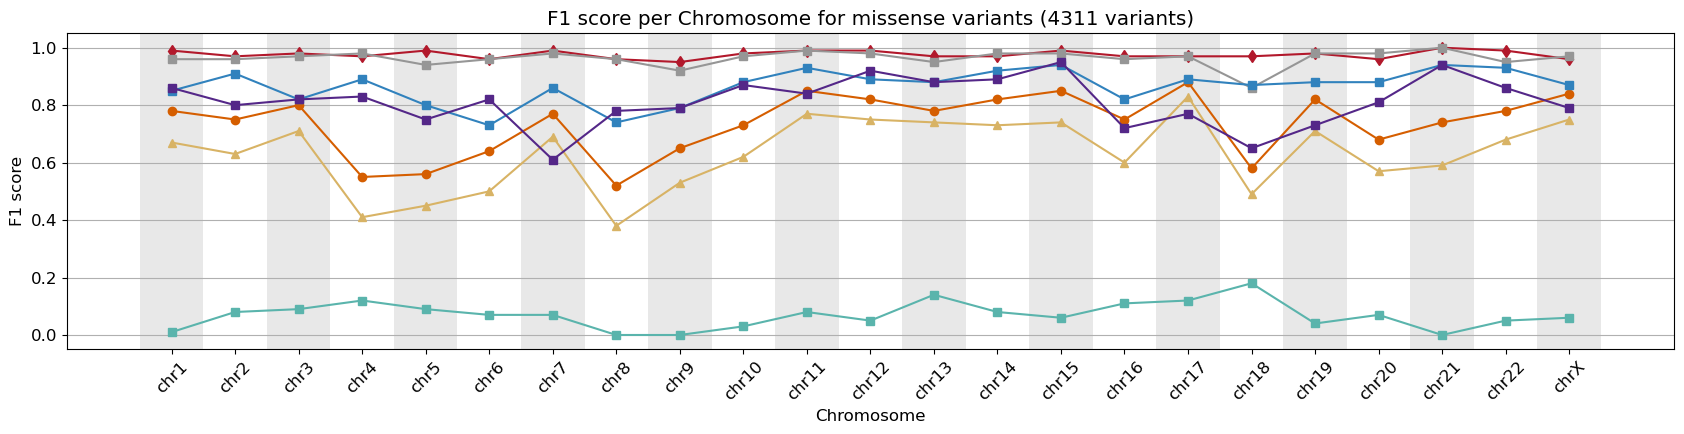

In [42]:
f1plot('missense')


Accuracy: 0.9924812030075187


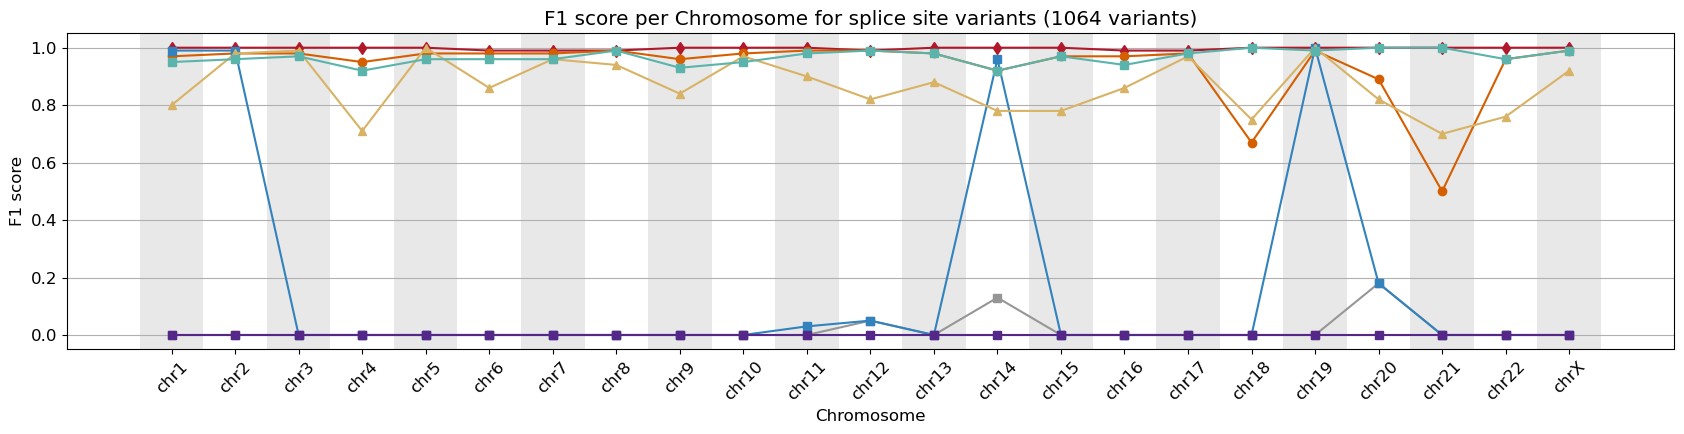

In [43]:
f1plot('splice site')


Accuracy: 0.9857443907276559


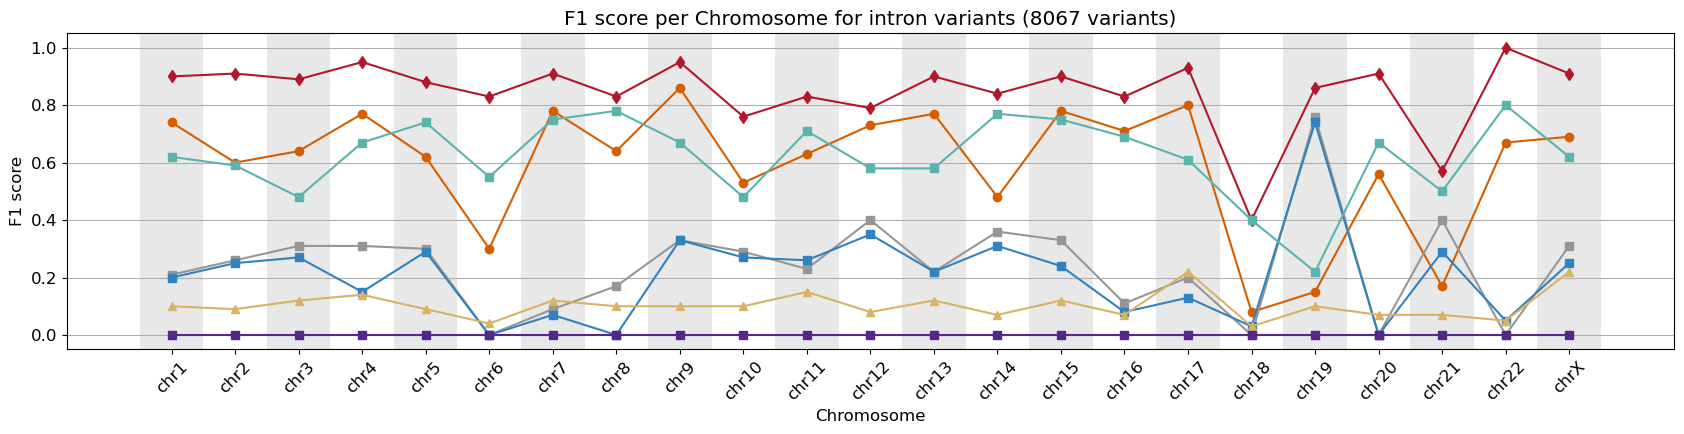

In [44]:
f1plot('intron')


Accuracy: 0.9930174563591022


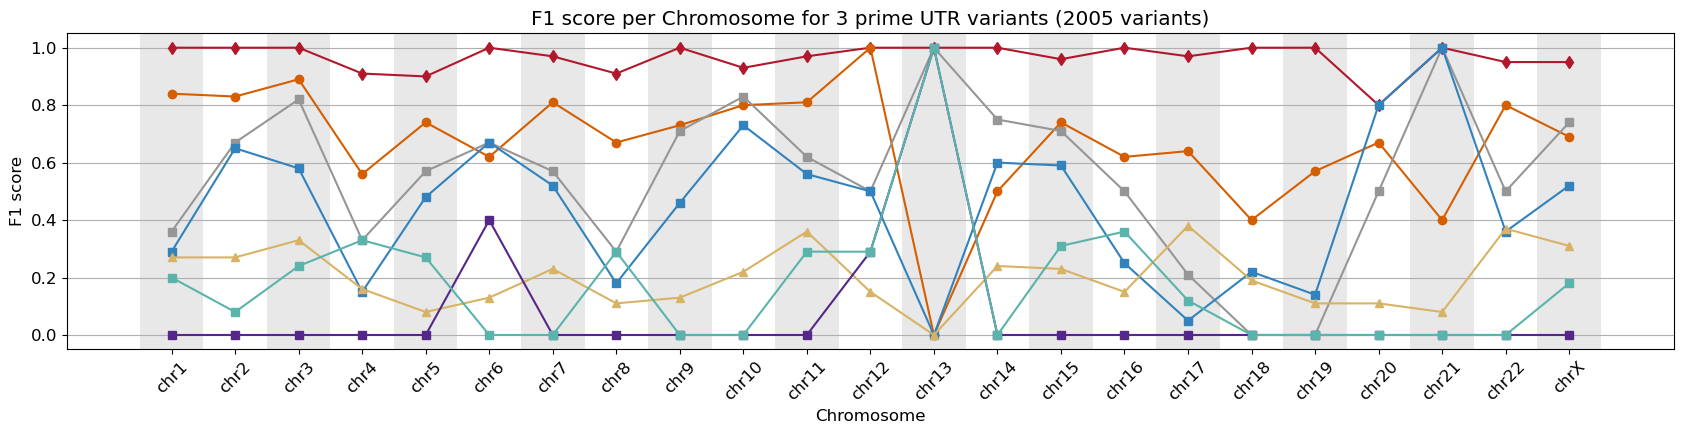

In [46]:
f1plot('3 prime UTR')

Accuracy: 0.9782608695652174


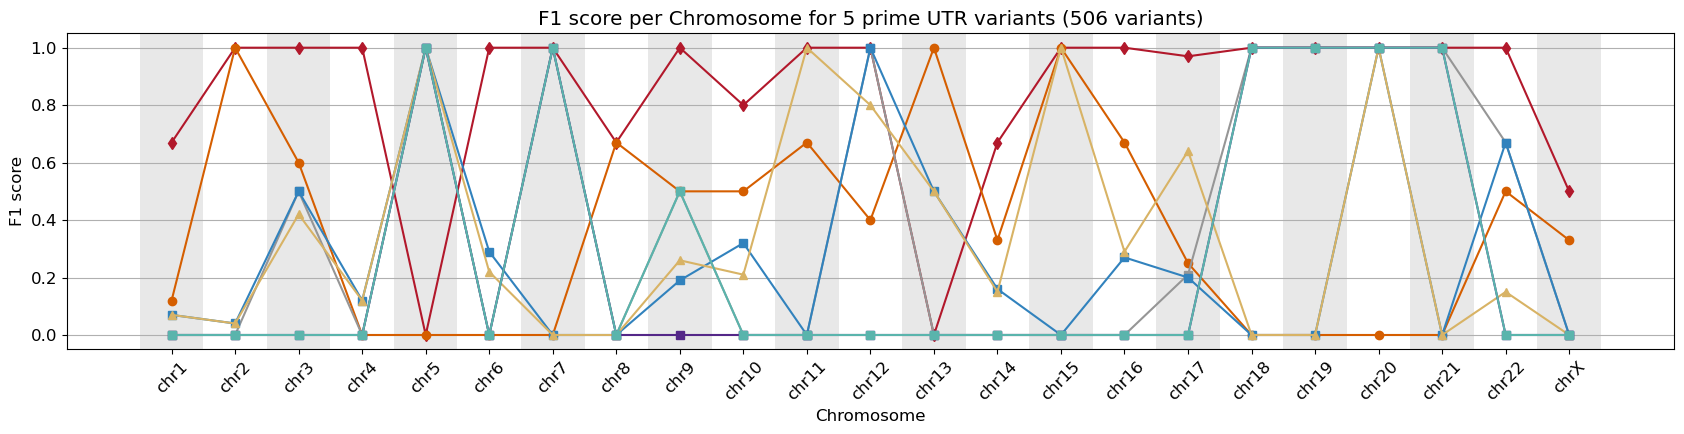

In [47]:
f1plot('5 prime UTR')

Accuracy: 0.9870290302655961


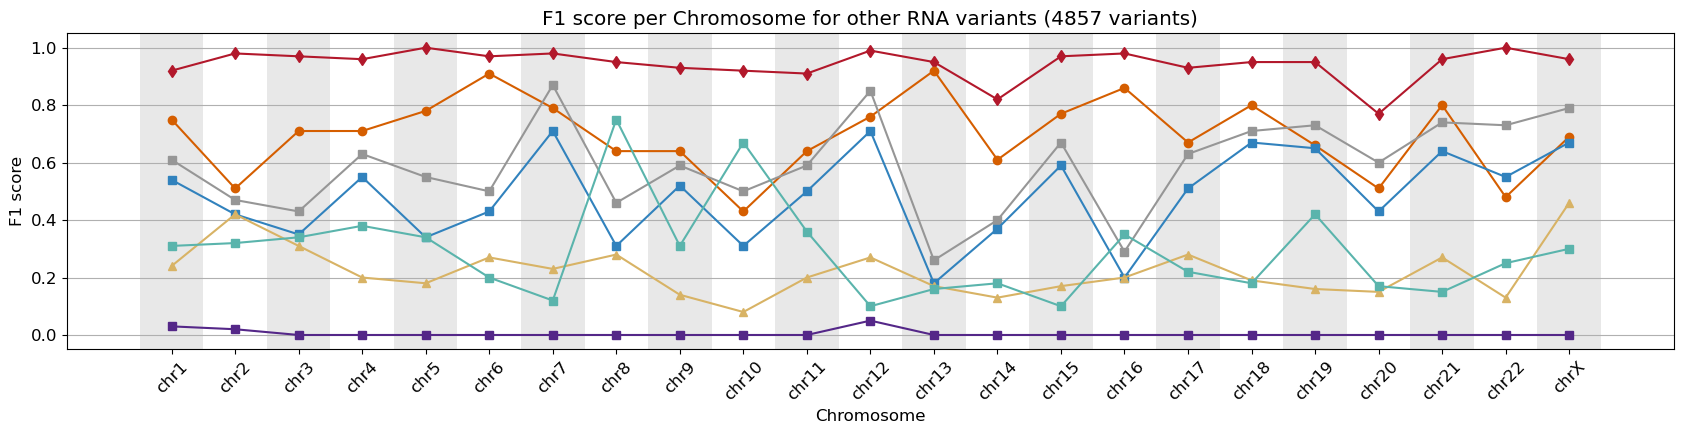

In [48]:
f1plot('other RNA')

Accuracy: 0.9946445959104186


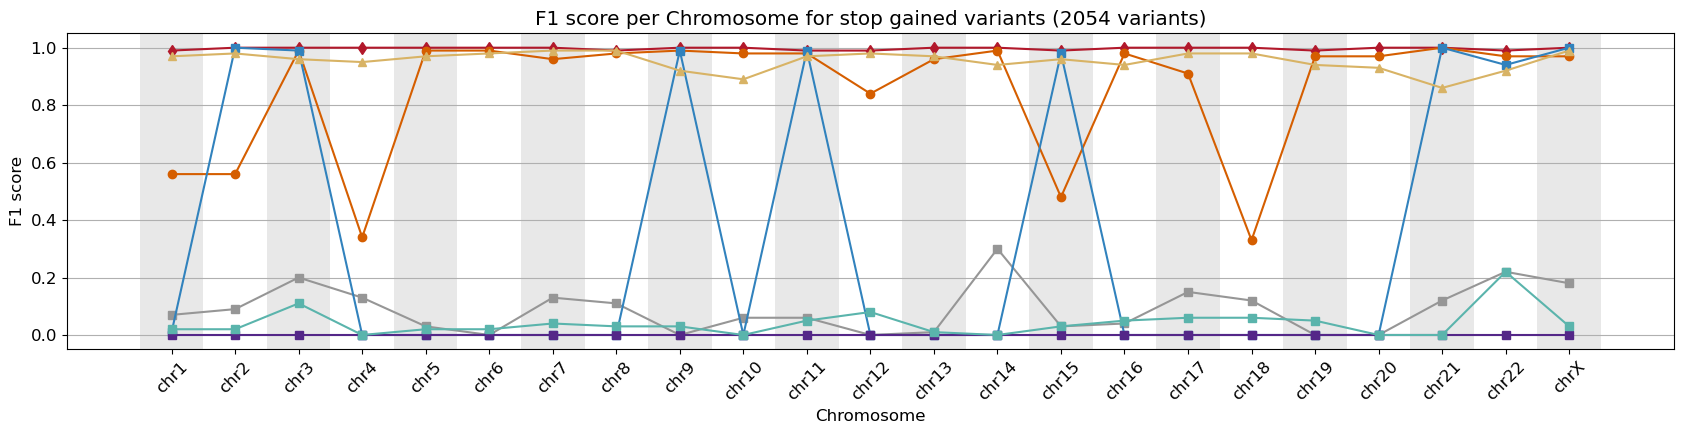

In [49]:
f1plot('stop gained')

Accuracy: 0.9992254066615027


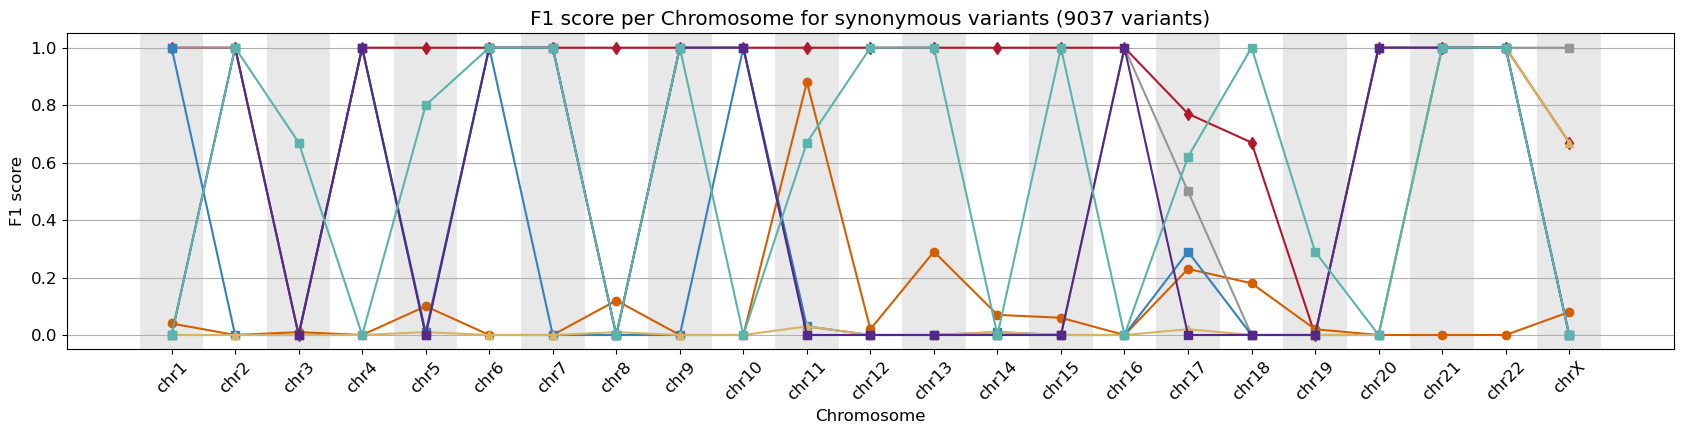

In [50]:
f1plot('synonymous')

Accuracy: 0.9972362966374942


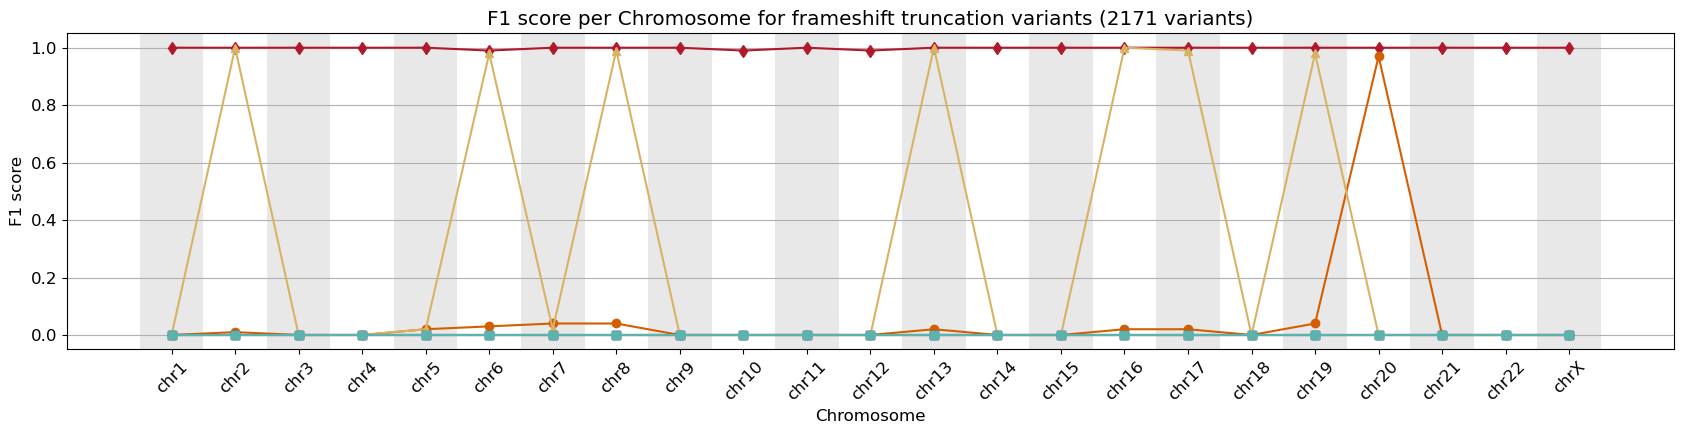

In [51]:
f1plot('frameshift truncation')

In [97]:
var1[var1['so'] == "NMD"].consequence.unique()


array(['NMD_transcript_variant,3_prime_UTR_variant',
       'NMD_transcript_variant,stop_gained', 'NSD_transcript',
       'NMD_transcript_variant', 'intron_variant,NMD_transcript_variant',
       'intron_variant,NMD_transcript_variant,splice_site_variant',
       'frameshift_truncation,NMD_transcript_variant',
       '2kb_downstream_variant,NMD_transcript_variant',
       'frameshift_truncation,NMD_transcript_variant,stop_gained',
       'missense_variant,NMD_transcript_variant',
       '2kb_upstream_variant,NSD_transcript',
       '2kb_upstream_variant,NMD_transcript_variant',
       'frameshift_elongation,NMD_transcript_variant',
       'complex_substitution,frameshift_truncation,NMD_transcript_variant',
       'NMD_transcript_variant,synonymous_variant',
       'inframe_deletion,NMD_transcript_variant',
       'complex_substitution,frameshift_elongation,intron_variant,NMD_transcript_variant',
       '2kb_downstream_variant,NSD_transcript',
       'missense_variant,start_lost,NMD_tr

In [52]:
var1['consequence1'] = var1['consequence']
pd.pivot_table(var1[var1['so'] == "synonymous"],  index='class', columns='consequence', values='class1',
                          aggfunc='count').T


class                                         0   1
consequence                                        
NMD_transcript_variant,synonymous_variant   349   5
synonymous_variant                         8663  20

In [54]:
extra_cols = ['DITTO','class','spliceai','so','so1','class1','consequence1']


In [ ]:
#samples_combined = np.concatenate([background_so, background_x], axis=1)

missense = var1[(var1['so'] =="missense")].drop(config_dict["train_cols"]+extra_cols, axis=1).reset_index(drop=True)
print(missense.shape)
background_x = missense.loc[np.random.choice(missense.shape[0], 50, replace=False)]
shap_values = explainer.shap_values(background_x)
shap.summary_plot(shap_values, background_x, background_x.columns, show=False)
plt.title("Missense variants", x=.2)
plt.show()


(4311, 239)


NameError: name 'explainer' is not defined

In [133]:
conqs = ['missense', 'intergenic', 'splice site', 'intron', 'synonymous']


missense variant shape: (4082, 239)


  0%|          | 0/500 [00:00<?, ?it/s]

700/700 [==============================] - 1s 1ms/step


  0%|          | 1/500 [00:01<13:03,  1.57s/it]

704/704 [==============================] - 1s 1ms/step


  0%|          | 2/500 [00:03<13:22,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 3/500 [00:04<13:01,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


  1%|          | 4/500 [00:06<12:50,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 5/500 [00:07<12:53,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


  1%|          | 6/500 [00:09<12:50,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


  1%|▏         | 7/500 [00:10<12:46,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


  2%|▏         | 8/500 [00:12<12:46,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


  2%|▏         | 9/500 [00:14<12:43,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 10/500 [00:15<12:47,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 11/500 [00:17<12:45,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 12/500 [00:18<12:45,  1.57s/it]

719/719 [==============================] - 1s 1ms/step


  3%|▎         | 13/500 [00:20<13:03,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 14/500 [00:22<12:58,  1.60s/it]

701/701 [==============================] - 1s 1ms/step


  3%|▎         | 15/500 [00:23<12:43,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


  3%|▎         | 16/500 [00:25<12:35,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


  3%|▎         | 17/500 [00:26<12:26,  1.55s/it]

712/712 [==============================] - 1s 1ms/step


  4%|▎         | 18/500 [00:28<12:44,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 19/500 [00:29<12:33,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 20/500 [00:31<12:25,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 21/500 [00:32<12:18,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


  4%|▍         | 22/500 [00:34<12:20,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▍         | 23/500 [00:35<12:15,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▍         | 24/500 [00:37<12:10,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 25/500 [00:38<12:07,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 26/500 [00:40<12:04,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 27/500 [00:42<12:22,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▌         | 28/500 [00:43<12:11,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▌         | 29/500 [00:45<12:07,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 30/500 [00:46<12:01,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▌         | 31/500 [00:48<12:03,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▋         | 32/500 [00:49<11:59,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 33/500 [00:51<12:24,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 34/500 [00:53<12:16,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 35/500 [00:54<12:22,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 36/500 [00:56<12:11,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 37/500 [00:57<12:03,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 38/500 [00:59<11:57,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


  8%|▊         | 39/500 [01:00<11:52,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 40/500 [01:02<12:00,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 41/500 [01:03<11:52,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


  8%|▊         | 42/500 [01:05<11:51,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▊         | 43/500 [01:07<11:54,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


  9%|▉         | 44/500 [01:08<11:56,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▉         | 45/500 [01:10<11:52,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


  9%|▉         | 46/500 [01:11<11:46,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


  9%|▉         | 47/500 [01:13<11:43,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 10%|▉         | 48/500 [01:14<11:45,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 10%|▉         | 49/500 [01:16<11:37,  1.55s/it]

703/703 [==============================] - 1s 1ms/step


 10%|█         | 50/500 [01:17<11:35,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 10%|█         | 51/500 [01:19<11:31,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 10%|█         | 52/500 [01:21<11:43,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█         | 53/500 [01:22<11:34,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 11%|█         | 54/500 [01:24<11:32,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█         | 55/500 [01:25<11:37,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 11%|█         | 56/500 [01:27<11:36,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█▏        | 57/500 [01:28<11:40,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 58/500 [01:30<11:36,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 59/500 [01:32<11:28,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 60/500 [01:33<11:25,  1.56s/it]

698/698 [==============================] - 1s 1ms/step


 12%|█▏        | 61/500 [01:35<11:17,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 62/500 [01:36<11:22,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 63/500 [01:38<11:13,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 64/500 [01:39<11:25,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 65/500 [01:41<11:31,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 66/500 [01:43<11:22,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 67/500 [01:44<11:14,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▎        | 68/500 [01:46<11:09,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 69/500 [01:47<11:06,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 70/500 [01:49<11:10,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 14%|█▍        | 71/500 [01:50<11:05,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 14%|█▍        | 72/500 [01:52<11:02,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 73/500 [01:53<11:06,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 74/500 [01:55<11:08,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 75/500 [01:57<11:02,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 76/500 [01:58<11:06,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 77/500 [02:00<11:03,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 78/500 [02:01<11:05,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 79/500 [02:03<11:07,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 80/500 [02:05<11:10,  1.60s/it]

699/699 [==============================] - 1s 1ms/step


 16%|█▌        | 81/500 [02:06<11:05,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▋        | 82/500 [02:08<10:57,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 83/500 [02:09<10:50,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 17%|█▋        | 84/500 [02:11<10:49,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 85/500 [02:12<10:56,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 86/500 [02:14<11:00,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 87/500 [02:15<10:49,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 88/500 [02:17<10:43,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 89/500 [02:19<10:48,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 90/500 [02:20<10:39,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 91/500 [02:22<10:32,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 92/500 [02:23<10:28,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▊        | 93/500 [02:25<10:29,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▉        | 94/500 [02:26<10:26,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 19%|█▉        | 95/500 [02:28<10:27,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 96/500 [02:29<10:23,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▉        | 97/500 [02:31<10:31,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 20%|█▉        | 98/500 [02:33<10:25,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 20%|█▉        | 99/500 [02:34<10:28,  1.57s/it]

700/700 [==============================] - 1s 2ms/step


 20%|██        | 100/500 [02:36<11:13,  1.68s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 101/500 [02:38<11:01,  1.66s/it]

699/699 [==============================] - 1s 1ms/step


 20%|██        | 102/500 [02:39<10:48,  1.63s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 103/500 [02:41<10:33,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 104/500 [02:42<10:25,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 105/500 [02:44<10:21,  1.57s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 106/500 [02:45<10:14,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██▏       | 107/500 [02:47<10:08,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 108/500 [02:49<10:14,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 109/500 [02:50<10:14,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 110/500 [02:52<10:11,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 22%|██▏       | 111/500 [02:53<10:08,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 112/500 [02:55<10:04,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 23%|██▎       | 113/500 [02:56<10:03,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 114/500 [02:58<10:00,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 23%|██▎       | 115/500 [02:59<09:56,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 23%|██▎       | 116/500 [03:01<09:53,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 23%|██▎       | 117/500 [03:03<09:53,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▎       | 118/500 [03:04<09:57,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 119/500 [03:06<10:00,  1.58s/it]

704/704 [==============================] - 1s 1ms/step


 24%|██▍       | 120/500 [03:07<09:56,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 121/500 [03:09<10:00,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 122/500 [03:10<09:56,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▍       | 123/500 [03:12<09:49,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▍       | 124/500 [03:14<09:44,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 125/500 [03:15<09:48,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 25%|██▌       | 126/500 [03:17<09:41,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 127/500 [03:18<09:44,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 128/500 [03:20<09:40,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 129/500 [03:21<09:37,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 130/500 [03:23<09:40,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


 26%|██▌       | 131/500 [03:24<09:35,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 26%|██▋       | 132/500 [03:26<09:31,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 27%|██▋       | 133/500 [03:28<09:31,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 134/500 [03:29<09:34,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


 27%|██▋       | 135/500 [03:31<09:26,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 136/500 [03:32<09:23,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 27%|██▋       | 137/500 [03:34<09:26,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 28%|██▊       | 138/500 [03:35<09:21,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 139/500 [03:37<09:23,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 28%|██▊       | 140/500 [03:39<09:34,  1.59s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 141/500 [03:40<09:30,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 142/500 [03:42<09:22,  1.57s/it]

704/704 [==============================] - 1s 1ms/step


 29%|██▊       | 143/500 [03:43<09:16,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 144/500 [03:45<09:13,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 145/500 [03:46<09:11,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 146/500 [03:48<09:07,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 29%|██▉       | 147/500 [03:49<09:03,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 30%|██▉       | 148/500 [03:51<09:04,  1.55s/it]

707/707 [==============================] - 1s 1ms/step


 30%|██▉       | 149/500 [03:53<09:16,  1.58s/it]

702/702 [==============================] - 1s 1ms/step


 30%|███       | 150/500 [03:54<09:10,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 30%|███       | 151/500 [03:56<09:03,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 30%|███       | 152/500 [03:57<09:00,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███       | 153/500 [03:59<08:57,  1.55s/it]

704/704 [==============================] - 1s 1ms/step


 31%|███       | 154/500 [04:00<08:55,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 31%|███       | 155/500 [04:02<08:51,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███       | 156/500 [04:03<08:56,  1.56s/it]

703/703 [==============================] - 1s 1ms/step


 31%|███▏      | 157/500 [04:05<08:53,  1.55s/it]

703/703 [==============================] - 1s 1ms/step


 32%|███▏      | 158/500 [04:07<08:50,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 32%|███▏      | 159/500 [04:08<08:45,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 160/500 [04:10<08:45,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 161/500 [04:11<08:53,  1.57s/it]

698/698 [==============================] - 1s 1ms/step


 32%|███▏      | 162/500 [04:13<08:48,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 163/500 [04:14<08:42,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 164/500 [04:16<08:40,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 165/500 [04:17<08:36,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 33%|███▎      | 166/500 [04:19<08:35,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 167/500 [04:20<08:37,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 34%|███▎      | 168/500 [04:22<08:37,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▍      | 169/500 [04:24<08:36,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 34%|███▍      | 170/500 [04:25<08:32,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 34%|███▍      | 171/500 [04:27<08:26,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▍      | 172/500 [04:28<08:27,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▍      | 173/500 [04:30<08:27,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 35%|███▍      | 174/500 [04:31<08:23,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▌      | 175/500 [04:33<08:27,  1.56s/it]

703/703 [==============================] - 1s 1ms/step


 35%|███▌      | 176/500 [04:34<08:25,  1.56s/it]

698/698 [==============================] - 1s 1ms/step


 35%|███▌      | 177/500 [04:36<08:18,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 178/500 [04:38<08:17,  1.54s/it]

716/716 [==============================] - 1s 1ms/step


 36%|███▌      | 179/500 [04:39<08:27,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 36%|███▌      | 180/500 [04:41<08:23,  1.57s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 181/500 [04:42<08:16,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 36%|███▋      | 182/500 [04:44<08:13,  1.55s/it]

704/704 [==============================] - 1s 1ms/step


 37%|███▋      | 183/500 [04:45<08:08,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 37%|███▋      | 184/500 [04:47<08:13,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 37%|███▋      | 185/500 [04:48<08:07,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 37%|███▋      | 186/500 [04:50<08:11,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 37%|███▋      | 187/500 [04:52<08:13,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 188/500 [04:53<08:12,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 189/500 [04:55<08:10,  1.58s/it]

702/702 [==============================] - 1s 1ms/step


 38%|███▊      | 190/500 [04:56<08:09,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 191/500 [04:58<08:02,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 192/500 [04:59<08:02,  1.57s/it]

703/703 [==============================] - 1s 1ms/step


 39%|███▊      | 193/500 [05:01<07:56,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▉      | 194/500 [05:03<08:05,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▉      | 195/500 [05:04<08:06,  1.60s/it]

703/703 [==============================] - 1s 1ms/step


 39%|███▉      | 196/500 [05:06<08:06,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▉      | 197/500 [05:08<08:18,  1.64s/it]

700/700 [==============================] - 1s 1ms/step


 40%|███▉      | 198/500 [05:09<08:09,  1.62s/it]

700/700 [==============================] - 1s 2ms/step


 40%|███▉      | 199/500 [05:11<08:30,  1.70s/it]

701/701 [==============================] - 1s 1ms/step


 40%|████      | 200/500 [05:13<08:19,  1.67s/it]

700/700 [==============================] - 1s 1ms/step


 40%|████      | 201/500 [05:14<08:17,  1.66s/it]

700/700 [==============================] - 1s 1ms/step


 40%|████      | 202/500 [05:16<08:09,  1.64s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 203/500 [05:17<07:57,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 204/500 [05:19<07:54,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 205/500 [05:21<07:49,  1.59s/it]

702/702 [==============================] - 1s 1ms/step


 41%|████      | 206/500 [05:22<07:44,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████▏     | 207/500 [05:24<07:39,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 208/500 [05:25<07:34,  1.56s/it]

716/716 [==============================] - 1s 1ms/step


 42%|████▏     | 209/500 [05:27<07:35,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 210/500 [05:28<07:33,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 211/500 [05:30<07:37,  1.58s/it]

701/701 [==============================] - 1s 1ms/step


 42%|████▏     | 212/500 [05:32<07:39,  1.60s/it]

702/702 [==============================] - 1s 1ms/step


 43%|████▎     | 213/500 [05:33<07:40,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 214/500 [05:35<07:40,  1.61s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 215/500 [05:36<07:30,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 216/500 [05:38<07:29,  1.58s/it]

701/701 [==============================] - 1s 1ms/step


 43%|████▎     | 217/500 [05:40<07:25,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▎     | 218/500 [05:41<07:19,  1.56s/it]

703/703 [==============================] - 1s 1ms/step


 44%|████▍     | 219/500 [05:43<07:17,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 220/500 [05:44<07:13,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 221/500 [05:46<07:10,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 222/500 [05:47<07:13,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▍     | 223/500 [05:49<07:15,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


 45%|████▍     | 224/500 [05:50<07:17,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▌     | 225/500 [05:52<07:16,  1.59s/it]

701/701 [==============================] - 1s 1ms/step


 45%|████▌     | 226/500 [05:54<07:09,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▌     | 227/500 [05:55<07:05,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▌     | 228/500 [05:57<07:12,  1.59s/it]

704/704 [==============================] - 1s 1ms/step


 46%|████▌     | 229/500 [05:58<07:05,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▌     | 230/500 [06:00<07:01,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 46%|████▌     | 231/500 [06:01<06:56,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▋     | 232/500 [06:03<06:54,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 47%|████▋     | 233/500 [06:04<06:53,  1.55s/it]

703/703 [==============================] - 1s 1ms/step


 47%|████▋     | 234/500 [06:06<06:51,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 235/500 [06:08<06:46,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 47%|████▋     | 236/500 [06:09<06:46,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 47%|████▋     | 237/500 [06:11<06:42,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 238/500 [06:12<06:40,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 48%|████▊     | 239/500 [06:14<06:39,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 48%|████▊     | 240/500 [06:15<06:40,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 241/500 [06:17<06:36,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 242/500 [06:18<06:39,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▊     | 243/500 [06:20<06:36,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 244/500 [06:21<06:34,  1.54s/it]

704/704 [==============================] - 1s 1ms/step


 49%|████▉     | 245/500 [06:23<06:31,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 246/500 [06:24<06:30,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 247/500 [06:26<06:31,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 50%|████▉     | 248/500 [06:28<06:32,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 50%|████▉     | 249/500 [06:29<06:30,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 250/500 [06:31<06:38,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 251/500 [06:32<06:34,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 252/500 [06:34<06:27,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 253/500 [06:35<06:20,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 254/500 [06:37<06:28,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 255/500 [06:39<06:25,  1.57s/it]

704/704 [==============================] - 1s 1ms/step


 51%|█████     | 256/500 [06:40<06:29,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████▏    | 257/500 [06:42<06:32,  1.61s/it]

698/698 [==============================] - 1s 1ms/step


 52%|█████▏    | 258/500 [06:43<06:25,  1.59s/it]

705/705 [==============================] - 1s 1ms/step


 52%|█████▏    | 259/500 [06:45<06:25,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 52%|█████▏    | 260/500 [06:47<06:21,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 52%|█████▏    | 261/500 [06:48<06:16,  1.58s/it]

702/702 [==============================] - 1s 1ms/step


 52%|█████▏    | 262/500 [06:50<06:16,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 263/500 [06:51<06:12,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 264/500 [06:53<06:13,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 265/500 [06:55<06:13,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 266/500 [06:56<06:17,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 267/500 [06:58<06:30,  1.67s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▎    | 268/500 [07:00<06:24,  1.66s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 269/500 [07:01<06:19,  1.64s/it]

702/702 [==============================] - 1s 1ms/step


 54%|█████▍    | 270/500 [07:03<06:10,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 271/500 [07:04<06:05,  1.60s/it]

702/702 [==============================] - 1s 1ms/step


 54%|█████▍    | 272/500 [07:06<05:58,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▍    | 273/500 [07:07<05:57,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▍    | 274/500 [07:09<05:52,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▌    | 275/500 [07:11<05:52,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▌    | 276/500 [07:12<05:51,  1.57s/it]

698/698 [==============================] - 1s 1ms/step


 55%|█████▌    | 277/500 [07:14<05:44,  1.55s/it]

704/704 [==============================] - 1s 1ms/step


 56%|█████▌    | 278/500 [07:15<05:42,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▌    | 279/500 [07:17<05:41,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 56%|█████▌    | 280/500 [07:18<05:39,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 56%|█████▌    | 281/500 [07:20<05:35,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▋    | 282/500 [07:21<05:36,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 283/500 [07:23<05:32,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 57%|█████▋    | 284/500 [07:24<05:30,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 285/500 [07:26<05:33,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 57%|█████▋    | 286/500 [07:28<05:31,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 57%|█████▋    | 287/500 [07:29<05:30,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 288/500 [07:31<05:41,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 289/500 [07:32<05:36,  1.60s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 290/500 [07:34<05:33,  1.59s/it]

702/702 [==============================] - 1s 1ms/step


 58%|█████▊    | 291/500 [07:35<05:26,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 292/500 [07:37<05:20,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▊    | 293/500 [07:38<05:17,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 294/500 [07:40<05:16,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 59%|█████▉    | 295/500 [07:42<05:14,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▉    | 296/500 [07:43<05:10,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 297/500 [07:45<05:06,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 60%|█████▉    | 298/500 [07:46<05:06,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 60%|█████▉    | 299/500 [07:48<05:03,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 60%|██████    | 300/500 [07:49<05:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 60%|██████    | 301/500 [07:51<05:03,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 302/500 [07:52<04:59,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 61%|██████    | 303/500 [07:54<04:58,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 61%|██████    | 304/500 [07:55<04:56,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 61%|██████    | 305/500 [07:57<04:53,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 61%|██████    | 306/500 [07:58<04:51,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 61%|██████▏   | 307/500 [08:00<04:52,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 308/500 [08:01<04:50,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 309/500 [08:03<04:48,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 310/500 [08:04<04:46,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 311/500 [08:06<04:43,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 312/500 [08:07<04:42,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 63%|██████▎   | 313/500 [08:09<04:44,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 314/500 [08:10<04:48,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 315/500 [08:12<04:44,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 316/500 [08:13<04:44,  1.55s/it]

704/704 [==============================] - 1s 1ms/step


 63%|██████▎   | 317/500 [08:15<04:41,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▎   | 318/500 [08:16<04:38,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 319/500 [08:18<04:37,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 320/500 [08:20<04:38,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 321/500 [08:21<04:34,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 322/500 [08:23<04:32,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▍   | 323/500 [08:24<04:29,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▍   | 324/500 [08:26<04:32,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▌   | 325/500 [08:27<04:31,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▌   | 326/500 [08:29<04:27,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▌   | 327/500 [08:30<04:24,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 66%|██████▌   | 328/500 [08:32<04:21,  1.52s/it]

703/703 [==============================] - 1s 1ms/step


 66%|██████▌   | 329/500 [08:33<04:19,  1.52s/it]

704/704 [==============================] - 1s 1ms/step


 66%|██████▌   | 330/500 [08:35<04:17,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▌   | 331/500 [08:36<04:15,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▋   | 332/500 [08:38<04:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 333/500 [08:39<04:11,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 334/500 [08:41<04:09,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 335/500 [08:42<04:09,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 67%|██████▋   | 336/500 [08:44<04:07,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 337/500 [08:45<04:07,  1.52s/it]

703/703 [==============================] - 1s 1ms/step


 68%|██████▊   | 338/500 [08:47<04:06,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 339/500 [08:48<04:07,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 340/500 [08:50<04:03,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 68%|██████▊   | 341/500 [08:51<04:00,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 342/500 [08:53<03:59,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▊   | 343/500 [08:55<04:00,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▉   | 344/500 [08:56<04:09,  1.60s/it]

702/702 [==============================] - 1s 1ms/step


 69%|██████▉   | 345/500 [08:58<04:02,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


 69%|██████▉   | 346/500 [08:59<03:59,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 69%|██████▉   | 347/500 [09:01<03:56,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 70%|██████▉   | 348/500 [09:02<03:53,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 70%|██████▉   | 349/500 [09:04<03:57,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 70%|███████   | 350/500 [09:06<03:55,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 70%|███████   | 351/500 [09:07<03:51,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 70%|███████   | 352/500 [09:09<03:47,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 353/500 [09:10<03:47,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 71%|███████   | 354/500 [09:12<03:46,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████   | 355/500 [09:13<03:44,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 356/500 [09:15<03:41,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████▏  | 357/500 [09:16<03:38,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 72%|███████▏  | 358/500 [09:18<03:35,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 72%|███████▏  | 359/500 [09:19<03:34,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 72%|███████▏  | 360/500 [09:21<03:35,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 72%|███████▏  | 361/500 [09:22<03:33,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 72%|███████▏  | 362/500 [09:24<03:34,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 363/500 [09:26<03:33,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 364/500 [09:27<03:29,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 365/500 [09:29<03:26,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 73%|███████▎  | 366/500 [09:30<03:24,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 367/500 [09:32<03:22,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▎  | 368/500 [09:33<03:22,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 74%|███████▍  | 369/500 [09:35<03:20,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 370/500 [09:36<03:17,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 371/500 [09:38<03:16,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 372/500 [09:39<03:16,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 75%|███████▍  | 373/500 [09:41<03:14,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▍  | 374/500 [09:42<03:11,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 75%|███████▌  | 375/500 [09:44<03:09,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 376/500 [09:45<03:07,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 377/500 [09:47<03:08,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 76%|███████▌  | 378/500 [09:48<03:05,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 379/500 [09:50<03:03,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 380/500 [09:51<03:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 381/500 [09:53<03:02,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 76%|███████▋  | 382/500 [09:54<03:00,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 383/500 [09:56<02:57,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 384/500 [09:57<02:55,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 77%|███████▋  | 385/500 [09:59<02:53,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 386/500 [10:01<02:52,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 387/500 [10:02<02:50,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 78%|███████▊  | 388/500 [10:04<02:48,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 389/500 [10:05<02:47,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 78%|███████▊  | 390/500 [10:07<02:45,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 391/500 [10:08<02:45,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 392/500 [10:10<02:43,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 79%|███████▊  | 393/500 [10:11<02:42,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 394/500 [10:13<02:40,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 395/500 [10:14<02:40,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 396/500 [10:16<02:39,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 397/500 [10:17<02:38,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 80%|███████▉  | 398/500 [10:19<02:35,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 80%|███████▉  | 399/500 [10:20<02:33,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 80%|████████  | 400/500 [10:22<02:31,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 80%|████████  | 401/500 [10:23<02:29,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 80%|████████  | 402/500 [10:25<02:27,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████  | 403/500 [10:26<02:25,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 404/500 [10:28<02:25,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 405/500 [10:29<02:26,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 406/500 [10:31<02:22,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████▏ | 407/500 [10:32<02:22,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 82%|████████▏ | 408/500 [10:34<02:19,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 82%|████████▏ | 409/500 [10:35<02:18,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 410/500 [10:37<02:16,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 82%|████████▏ | 411/500 [10:38<02:15,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 412/500 [10:40<02:12,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 413/500 [10:41<02:10,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 414/500 [10:43<02:10,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 415/500 [10:45<02:09,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 416/500 [10:46<02:07,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 83%|████████▎ | 417/500 [10:48<02:05,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▎ | 418/500 [10:49<02:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▍ | 419/500 [10:51<02:02,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▍ | 420/500 [10:52<02:00,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▍ | 421/500 [10:54<01:59,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 84%|████████▍ | 422/500 [10:55<01:58,  1.52s/it]

703/703 [==============================] - 1s 1ms/step


 85%|████████▍ | 423/500 [10:57<01:56,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▍ | 424/500 [10:58<01:54,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▌ | 425/500 [11:00<01:52,  1.50s/it]

703/703 [==============================] - 1s 1ms/step


 85%|████████▌ | 426/500 [11:01<01:51,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▌ | 427/500 [11:03<01:49,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 428/500 [11:04<01:49,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 429/500 [11:06<01:47,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 430/500 [11:07<01:45,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 86%|████████▌ | 431/500 [11:09<01:45,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▋ | 432/500 [11:10<01:42,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 433/500 [11:12<01:42,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 434/500 [11:13<01:39,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 435/500 [11:15<01:38,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 87%|████████▋ | 436/500 [11:16<01:36,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 87%|████████▋ | 437/500 [11:18<01:35,  1.51s/it]

704/704 [==============================] - 1s 1ms/step


 88%|████████▊ | 438/500 [11:19<01:33,  1.51s/it]

709/709 [==============================] - 1s 1ms/step


 88%|████████▊ | 439/500 [11:21<01:33,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 88%|████████▊ | 440/500 [11:22<01:31,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 441/500 [11:24<01:29,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 442/500 [11:25<01:27,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▊ | 443/500 [11:27<01:26,  1.51s/it]

711/711 [==============================] - 1s 1ms/step


 89%|████████▉ | 444/500 [11:28<01:26,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 445/500 [11:30<01:25,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 446/500 [11:32<01:22,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 447/500 [11:33<01:20,  1.52s/it]

704/704 [==============================] - 1s 1ms/step


 90%|████████▉ | 448/500 [11:35<01:18,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 90%|████████▉ | 449/500 [11:36<01:17,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 90%|█████████ | 450/500 [11:38<01:15,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 90%|█████████ | 451/500 [11:39<01:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 90%|█████████ | 452/500 [11:41<01:13,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 453/500 [11:42<01:13,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 454/500 [11:44<01:10,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 455/500 [11:45<01:09,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 456/500 [11:47<01:08,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████▏| 457/500 [11:48<01:06,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 458/500 [11:50<01:05,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 459/500 [11:51<01:02,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 92%|█████████▏| 460/500 [11:53<01:00,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 461/500 [11:54<00:59,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 462/500 [11:56<00:57,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 463/500 [11:57<00:55,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 464/500 [11:59<00:53,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 465/500 [12:00<00:52,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 466/500 [12:02<00:50,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 467/500 [12:03<00:49,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▎| 468/500 [12:05<00:48,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 94%|█████████▍| 469/500 [12:06<00:46,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 470/500 [12:08<00:45,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▍| 471/500 [12:09<00:43,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▍| 472/500 [12:11<00:42,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▍| 473/500 [12:13<00:40,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▍| 474/500 [12:14<00:38,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▌| 475/500 [12:15<00:37,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▌| 476/500 [12:17<00:36,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▌| 477/500 [12:19<00:34,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 96%|█████████▌| 478/500 [12:20<00:33,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▌| 479/500 [12:22<00:31,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 96%|█████████▌| 480/500 [12:23<00:30,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▌| 481/500 [12:25<00:28,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▋| 482/500 [12:26<00:26,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 483/500 [12:28<00:25,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 484/500 [12:29<00:23,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 485/500 [12:31<00:22,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 486/500 [12:32<00:20,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 97%|█████████▋| 487/500 [12:34<00:19,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 488/500 [12:35<00:18,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 489/500 [12:37<00:16,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 98%|█████████▊| 490/500 [12:38<00:15,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 491/500 [12:40<00:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 492/500 [12:41<00:12,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▊| 493/500 [12:43<00:10,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 494/500 [12:44<00:09,  1.53s/it]

703/703 [==============================] - 1s 1ms/step


 99%|█████████▉| 495/500 [12:46<00:07,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 496/500 [12:47<00:06,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 497/500 [12:49<00:04,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


100%|█████████▉| 498/500 [12:50<00:03,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


100%|█████████▉| 499/500 [12:52<00:01,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


100%|██████████| 500/500 [12:53<00:00,  1.55s/it]


intergenic variant shape: (1240, 239)


  0%|          | 0/500 [00:00<?, ?it/s]

698/698 [==============================] - 1s 1ms/step


  0%|          | 1/500 [00:01<12:23,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  0%|          | 2/500 [00:02<12:23,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 3/500 [00:04<12:36,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


  1%|          | 4/500 [00:06<12:35,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


  1%|          | 5/500 [00:07<12:26,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  1%|          | 6/500 [00:09<12:22,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  1%|▏         | 7/500 [00:10<12:17,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 8/500 [00:12<12:26,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


  2%|▏         | 9/500 [00:13<12:24,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  2%|▏         | 10/500 [00:15<12:17,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 11/500 [00:16<12:12,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


  2%|▏         | 12/500 [00:18<12:09,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


  3%|▎         | 13/500 [00:19<12:14,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  3%|▎         | 14/500 [00:21<12:10,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  3%|▎         | 15/500 [00:22<12:08,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 16/500 [00:24<12:04,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 17/500 [00:25<12:11,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▎         | 18/500 [00:27<12:09,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▍         | 19/500 [00:28<12:04,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


  4%|▍         | 20/500 [00:30<12:00,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 21/500 [00:31<11:57,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


  4%|▍         | 22/500 [00:33<11:55,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▍         | 23/500 [00:34<11:58,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▍         | 24/500 [00:36<11:55,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▌         | 25/500 [00:37<11:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▌         | 26/500 [00:39<11:49,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▌         | 27/500 [00:40<11:50,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  6%|▌         | 28/500 [00:42<11:46,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  6%|▌         | 29/500 [00:43<11:42,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 30/500 [00:45<11:39,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 31/500 [00:46<11:37,  1.49s/it]

701/701 [==============================] - 1s 1ms/step


  6%|▋         | 32/500 [00:48<11:39,  1.49s/it]

704/704 [==============================] - 1s 1ms/step


  7%|▋         | 33/500 [00:49<11:39,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 34/500 [00:51<11:47,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  7%|▋         | 35/500 [00:52<11:49,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 36/500 [00:54<11:48,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 37/500 [00:55<11:50,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 38/500 [00:57<11:52,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


  8%|▊         | 39/500 [00:58<12:10,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 40/500 [01:00<12:16,  1.60s/it]

698/698 [==============================] - 1s 1ms/step


  8%|▊         | 41/500 [01:02<12:29,  1.63s/it]

699/699 [==============================] - 1s 1ms/step


  8%|▊         | 42/500 [01:03<12:22,  1.62s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▊         | 43/500 [01:05<12:26,  1.63s/it]

699/699 [==============================] - 1s 1ms/step


  9%|▉         | 44/500 [01:07<12:22,  1.63s/it]

702/702 [==============================] - 1s 1ms/step


  9%|▉         | 45/500 [01:08<12:02,  1.59s/it]

702/702 [==============================] - 1s 1ms/step


  9%|▉         | 46/500 [01:10<11:52,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▉         | 47/500 [01:11<11:39,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 10%|▉         | 48/500 [01:13<11:37,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 10%|▉         | 49/500 [01:14<11:35,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 10%|█         | 50/500 [01:16<11:41,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 10%|█         | 51/500 [01:18<11:50,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 10%|█         | 52/500 [01:19<11:38,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 11%|█         | 53/500 [01:21<11:36,  1.56s/it]

698/698 [==============================] - 1s 1ms/step


 11%|█         | 54/500 [01:22<11:26,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█         | 55/500 [01:24<11:20,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 11%|█         | 56/500 [01:25<11:13,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 11%|█▏        | 57/500 [01:27<11:08,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 12%|█▏        | 58/500 [01:28<11:07,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 59/500 [01:30<11:02,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 60/500 [01:31<10:59,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 61/500 [01:33<11:02,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 12%|█▏        | 62/500 [01:34<10:58,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 13%|█▎        | 63/500 [01:36<10:58,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 13%|█▎        | 64/500 [01:37<10:55,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 65/500 [01:39<11:03,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 13%|█▎        | 66/500 [01:40<10:59,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 13%|█▎        | 67/500 [01:42<10:54,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 14%|█▎        | 68/500 [01:43<10:51,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 14%|█▍        | 69/500 [01:45<10:49,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 14%|█▍        | 70/500 [01:46<10:44,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 71/500 [01:48<10:43,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 14%|█▍        | 72/500 [01:49<10:45,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 73/500 [01:51<10:52,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 74/500 [01:52<10:54,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 15%|█▌        | 75/500 [01:54<10:47,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 76/500 [01:55<10:42,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 15%|█▌        | 77/500 [01:57<10:44,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 16%|█▌        | 78/500 [01:58<10:41,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 16%|█▌        | 79/500 [02:00<10:35,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 80/500 [02:01<10:41,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 81/500 [02:03<10:39,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 16%|█▋        | 82/500 [02:04<10:35,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 17%|█▋        | 83/500 [02:06<10:32,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 84/500 [02:07<10:27,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 85/500 [02:09<10:33,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 86/500 [02:10<10:27,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 87/500 [02:12<10:24,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 18%|█▊        | 88/500 [02:14<10:22,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 18%|█▊        | 89/500 [02:15<10:18,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 18%|█▊        | 90/500 [02:16<10:15,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 18%|█▊        | 91/500 [02:18<10:13,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 18%|█▊        | 92/500 [02:20<10:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▊        | 93/500 [02:21<10:13,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 94/500 [02:23<10:16,  1.52s/it]

703/703 [==============================] - 1s 1ms/step


 19%|█▉        | 95/500 [02:24<10:12,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 96/500 [02:26<10:13,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 97/500 [02:27<10:09,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 20%|█▉        | 98/500 [02:29<10:05,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 20%|█▉        | 99/500 [02:30<10:02,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 20%|██        | 100/500 [02:32<10:00,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 20%|██        | 101/500 [02:33<10:00,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 102/500 [02:35<09:57,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 21%|██        | 103/500 [02:36<09:54,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 104/500 [02:38<09:52,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 105/500 [02:39<10:03,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 106/500 [02:41<10:05,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██▏       | 107/500 [02:42<09:59,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 108/500 [02:44<09:54,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 109/500 [02:45<09:50,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 110/500 [02:47<09:48,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 111/500 [02:48<09:51,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 112/500 [02:50<09:55,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 113/500 [02:51<09:57,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 23%|██▎       | 114/500 [02:53<09:54,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 115/500 [02:54<09:50,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 23%|██▎       | 116/500 [02:56<09:46,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 117/500 [02:57<09:41,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 24%|██▎       | 118/500 [02:59<09:39,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 119/500 [03:01<09:42,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 24%|██▍       | 120/500 [03:02<09:35,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 121/500 [03:04<09:33,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 24%|██▍       | 122/500 [03:05<09:32,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▍       | 123/500 [03:07<09:38,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 25%|██▍       | 124/500 [03:08<09:33,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 25%|██▌       | 125/500 [03:10<09:35,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 126/500 [03:11<09:44,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 25%|██▌       | 127/500 [03:13<09:37,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▌       | 128/500 [03:14<09:27,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 26%|██▌       | 129/500 [03:16<09:29,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▌       | 130/500 [03:17<09:23,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 131/500 [03:19<09:25,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▋       | 132/500 [03:20<09:19,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 27%|██▋       | 133/500 [03:22<09:16,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 27%|██▋       | 134/500 [03:23<09:12,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 135/500 [03:25<09:11,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 27%|██▋       | 136/500 [03:26<09:09,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 27%|██▋       | 137/500 [03:28<09:06,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 138/500 [03:29<09:12,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 139/500 [03:31<09:13,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 28%|██▊       | 140/500 [03:33<09:19,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 28%|██▊       | 141/500 [03:34<09:15,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 28%|██▊       | 142/500 [03:36<09:09,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 29%|██▊       | 143/500 [03:37<09:05,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 29%|██▉       | 144/500 [03:39<08:59,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 29%|██▉       | 145/500 [03:40<08:56,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 146/500 [03:42<09:00,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 29%|██▉       | 147/500 [03:43<08:59,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 30%|██▉       | 148/500 [03:45<08:55,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 30%|██▉       | 149/500 [03:46<08:53,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 30%|███       | 150/500 [03:48<08:49,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 30%|███       | 151/500 [03:49<08:46,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 30%|███       | 152/500 [03:51<08:48,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 153/500 [03:52<08:45,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 154/500 [03:54<08:40,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 155/500 [03:55<08:39,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 156/500 [03:57<08:41,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 31%|███▏      | 157/500 [03:58<08:39,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 32%|███▏      | 158/500 [04:00<08:34,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 32%|███▏      | 159/500 [04:01<08:32,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 32%|███▏      | 160/500 [04:03<08:31,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 32%|███▏      | 161/500 [04:04<08:30,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 162/500 [04:06<08:34,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 33%|███▎      | 163/500 [04:07<08:33,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 164/500 [04:09<08:36,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 165/500 [04:11<08:35,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 166/500 [04:12<08:29,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 33%|███▎      | 167/500 [04:14<08:25,  1.52s/it]

704/704 [==============================] - 1s 1ms/step


 34%|███▎      | 168/500 [04:15<08:22,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 34%|███▍      | 169/500 [04:17<08:19,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▍      | 170/500 [04:18<08:18,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▍      | 171/500 [04:20<08:15,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 34%|███▍      | 172/500 [04:21<08:14,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 35%|███▍      | 173/500 [04:23<08:10,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▍      | 174/500 [04:24<08:10,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▌      | 175/500 [04:26<08:16,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▌      | 176/500 [04:27<08:11,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▌      | 177/500 [04:29<08:12,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 36%|███▌      | 178/500 [04:30<08:12,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 36%|███▌      | 179/500 [04:32<08:09,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 180/500 [04:33<08:05,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 36%|███▌      | 181/500 [04:35<08:04,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▋      | 182/500 [04:36<08:01,  1.51s/it]

700/700 [==============================] - 1s 2ms/step


 37%|███▋      | 183/500 [04:38<08:46,  1.66s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 184/500 [04:40<08:33,  1.62s/it]

698/698 [==============================] - 1s 1ms/step


 37%|███▋      | 185/500 [04:41<08:20,  1.59s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 186/500 [04:43<08:13,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


 37%|███▋      | 187/500 [04:44<08:07,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 188/500 [04:46<08:01,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 38%|███▊      | 189/500 [04:47<07:58,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 190/500 [04:49<08:00,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 191/500 [04:51<07:57,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 38%|███▊      | 192/500 [04:52<08:01,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▊      | 193/500 [04:54<08:21,  1.63s/it]

698/698 [==============================] - 1s 1ms/step


 39%|███▉      | 194/500 [04:56<08:16,  1.62s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 195/500 [04:57<08:03,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 196/500 [04:59<07:54,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 39%|███▉      | 197/500 [05:00<07:55,  1.57s/it]

699/699 [==============================] - 1s 1ms/step


 40%|███▉      | 198/500 [05:02<07:57,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 40%|███▉      | 199/500 [05:03<07:59,  1.59s/it]

699/699 [==============================] - 1s 1ms/step


 40%|████      | 200/500 [05:05<08:07,  1.62s/it]

700/700 [==============================] - 1s 1ms/step


 40%|████      | 201/500 [05:07<08:03,  1.62s/it]

698/698 [==============================] - 1s 1ms/step


 40%|████      | 202/500 [05:08<07:57,  1.60s/it]

702/702 [==============================] - 1s 1ms/step


 41%|████      | 203/500 [05:10<08:00,  1.62s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 204/500 [05:11<07:56,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 205/500 [05:13<07:46,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 206/500 [05:15<07:39,  1.56s/it]

698/698 [==============================] - 1s 1ms/step


 41%|████▏     | 207/500 [05:16<07:36,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 42%|████▏     | 208/500 [05:18<07:31,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 42%|████▏     | 209/500 [05:19<07:29,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 42%|████▏     | 210/500 [05:21<07:28,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 211/500 [05:22<07:36,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 212/500 [05:24<07:33,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 213/500 [05:25<07:26,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 214/500 [05:27<07:27,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 215/500 [05:28<07:21,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 43%|████▎     | 216/500 [05:30<07:16,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 43%|████▎     | 217/500 [05:32<07:13,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 44%|████▎     | 218/500 [05:33<07:13,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 219/500 [05:35<07:13,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 44%|████▍     | 220/500 [05:36<07:08,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 221/500 [05:38<07:05,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 44%|████▍     | 222/500 [05:39<07:02,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▍     | 223/500 [05:41<07:02,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 45%|████▍     | 224/500 [05:42<06:59,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 45%|████▌     | 225/500 [05:44<06:58,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 45%|████▌     | 226/500 [05:45<06:54,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 45%|████▌     | 227/500 [05:47<06:52,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▌     | 228/500 [05:48<06:56,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 46%|████▌     | 229/500 [05:50<06:53,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 46%|████▌     | 230/500 [05:51<06:49,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▌     | 231/500 [05:53<06:53,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▋     | 232/500 [05:54<06:48,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 47%|████▋     | 233/500 [05:56<06:45,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 47%|████▋     | 234/500 [05:57<06:45,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 235/500 [05:59<06:43,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 236/500 [06:01<06:49,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 47%|████▋     | 237/500 [06:02<06:44,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 238/500 [06:04<06:41,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 239/500 [06:05<06:40,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 48%|████▊     | 240/500 [06:07<06:38,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 48%|████▊     | 241/500 [06:08<06:35,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 242/500 [06:10<06:37,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 49%|████▊     | 243/500 [06:11<06:33,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 244/500 [06:13<06:29,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 245/500 [06:14<06:33,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 49%|████▉     | 246/500 [06:16<06:29,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 49%|████▉     | 247/500 [06:17<06:26,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 50%|████▉     | 248/500 [06:19<06:23,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 50%|████▉     | 249/500 [06:20<06:26,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 50%|█████     | 250/500 [06:22<06:21,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 50%|█████     | 251/500 [06:23<06:18,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 50%|█████     | 252/500 [06:25<06:15,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 253/500 [06:26<06:14,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 51%|█████     | 254/500 [06:28<06:10,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 255/500 [06:30<06:14,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 51%|█████     | 256/500 [06:31<06:12,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 51%|█████▏    | 257/500 [06:33<06:11,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 52%|█████▏    | 258/500 [06:34<06:07,  1.52s/it]

709/709 [==============================] - 1s 1ms/step


 52%|█████▏    | 259/500 [06:36<06:08,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 52%|█████▏    | 260/500 [06:37<06:05,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 52%|█████▏    | 261/500 [06:39<06:04,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 52%|█████▏    | 262/500 [06:40<06:00,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 53%|█████▎    | 263/500 [06:42<05:58,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 53%|█████▎    | 264/500 [06:43<05:55,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 53%|█████▎    | 265/500 [06:45<05:54,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 53%|█████▎    | 266/500 [06:46<05:51,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 267/500 [06:48<05:49,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 54%|█████▎    | 268/500 [06:49<05:47,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 269/500 [06:51<05:47,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 270/500 [06:52<05:45,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 271/500 [06:54<05:42,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 272/500 [06:55<05:43,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▍    | 273/500 [06:57<05:47,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 55%|█████▍    | 274/500 [06:58<05:43,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 55%|█████▌    | 275/500 [07:00<05:40,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 55%|█████▌    | 276/500 [07:01<05:38,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▌    | 277/500 [07:03<05:38,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▌    | 278/500 [07:04<05:34,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▌    | 279/500 [07:06<05:31,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 280/500 [07:07<05:31,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 281/500 [07:09<05:29,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▋    | 282/500 [07:10<05:30,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 57%|█████▋    | 283/500 [07:12<05:28,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 57%|█████▋    | 284/500 [07:13<05:27,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 285/500 [07:15<05:25,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 57%|█████▋    | 286/500 [07:16<05:23,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 57%|█████▋    | 287/500 [07:18<05:20,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 58%|█████▊    | 288/500 [07:19<05:20,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 289/500 [07:21<05:22,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 290/500 [07:23<05:23,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 58%|█████▊    | 291/500 [07:24<05:19,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 58%|█████▊    | 292/500 [07:26<05:17,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 59%|█████▊    | 293/500 [07:27<05:16,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 59%|█████▉    | 294/500 [07:29<05:12,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▉    | 295/500 [07:30<05:11,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 59%|█████▉    | 296/500 [07:32<05:07,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 59%|█████▉    | 297/500 [07:33<05:07,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 60%|█████▉    | 298/500 [07:35<05:07,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 60%|█████▉    | 299/500 [07:36<05:06,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 300/500 [07:38<05:03,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 60%|██████    | 301/500 [07:39<05:01,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 302/500 [07:41<05:00,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 61%|██████    | 303/500 [07:42<04:59,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 61%|██████    | 304/500 [07:44<04:56,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 61%|██████    | 305/500 [07:45<04:54,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 306/500 [07:47<04:52,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 61%|██████▏   | 307/500 [07:48<04:50,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 308/500 [07:50<04:50,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 309/500 [07:51<04:54,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 62%|██████▏   | 310/500 [07:53<04:52,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 311/500 [07:54<04:49,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 312/500 [07:56<04:46,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 313/500 [07:57<04:47,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 314/500 [07:59<04:45,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 63%|██████▎   | 315/500 [08:01<04:42,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 316/500 [08:02<04:38,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 63%|██████▎   | 317/500 [08:04<04:36,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 64%|██████▎   | 318/500 [08:05<04:34,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 64%|██████▍   | 319/500 [08:07<04:32,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 64%|██████▍   | 320/500 [08:08<04:29,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 64%|██████▍   | 321/500 [08:10<04:28,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 64%|██████▍   | 322/500 [08:11<04:28,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 65%|██████▍   | 323/500 [08:13<04:27,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 65%|██████▍   | 324/500 [08:14<04:24,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▌   | 325/500 [08:16<04:23,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▌   | 326/500 [08:17<04:21,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 65%|██████▌   | 327/500 [08:19<04:19,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▌   | 328/500 [08:20<04:17,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 66%|██████▌   | 329/500 [08:22<04:18,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▌   | 330/500 [08:23<04:19,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 66%|██████▌   | 331/500 [08:25<04:16,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▋   | 332/500 [08:26<04:13,  1.51s/it]

703/703 [==============================] - 1s 1ms/step


 67%|██████▋   | 333/500 [08:28<04:14,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 67%|██████▋   | 334/500 [08:29<04:10,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 67%|██████▋   | 335/500 [08:31<04:08,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 67%|██████▋   | 336/500 [08:32<04:06,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 67%|██████▋   | 337/500 [08:34<04:05,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 68%|██████▊   | 338/500 [08:35<04:03,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 339/500 [08:37<04:01,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 68%|██████▊   | 340/500 [08:38<03:59,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 68%|██████▊   | 341/500 [08:40<03:58,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 342/500 [08:41<03:57,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▊   | 343/500 [08:43<03:56,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▉   | 344/500 [08:44<03:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▉   | 345/500 [08:46<03:52,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 69%|██████▉   | 346/500 [08:47<03:51,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▉   | 347/500 [08:49<03:54,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 70%|██████▉   | 348/500 [08:50<03:51,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 70%|██████▉   | 349/500 [08:52<03:50,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 70%|███████   | 350/500 [08:53<03:46,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 70%|███████   | 351/500 [08:55<03:43,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|███████   | 352/500 [08:56<03:41,  1.49s/it]

701/701 [==============================] - 1s 1ms/step


 71%|███████   | 353/500 [08:58<03:48,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 354/500 [08:59<03:43,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 71%|███████   | 355/500 [09:01<03:40,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████   | 356/500 [09:02<03:37,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 71%|███████▏  | 357/500 [09:04<03:37,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 72%|███████▏  | 358/500 [09:05<03:34,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 72%|███████▏  | 359/500 [09:07<03:32,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 72%|███████▏  | 360/500 [09:08<03:29,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 72%|███████▏  | 361/500 [09:10<03:29,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 72%|███████▏  | 362/500 [09:11<03:26,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 363/500 [09:13<03:28,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 73%|███████▎  | 364/500 [09:14<03:26,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 365/500 [09:16<03:24,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 73%|███████▎  | 366/500 [09:18<03:23,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 73%|███████▎  | 367/500 [09:19<03:21,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 74%|███████▎  | 368/500 [09:21<03:19,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 74%|███████▍  | 369/500 [09:22<03:18,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 74%|███████▍  | 370/500 [09:24<03:15,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 74%|███████▍  | 371/500 [09:25<03:14,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 372/500 [09:27<03:12,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▍  | 373/500 [09:28<03:10,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 75%|███████▍  | 374/500 [09:30<03:09,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 375/500 [09:31<03:11,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 75%|███████▌  | 376/500 [09:33<03:08,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 377/500 [09:34<03:05,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 76%|███████▌  | 378/500 [09:36<03:03,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 76%|███████▌  | 379/500 [09:37<03:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 380/500 [09:39<03:00,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 381/500 [09:40<03:01,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 76%|███████▋  | 382/500 [09:42<02:58,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 383/500 [09:43<02:57,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 384/500 [09:45<02:57,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 385/500 [09:46<02:54,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 77%|███████▋  | 386/500 [09:48<02:54,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 77%|███████▋  | 387/500 [09:49<02:52,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 388/500 [09:51<02:49,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 78%|███████▊  | 389/500 [09:52<02:46,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 78%|███████▊  | 390/500 [09:54<02:45,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 78%|███████▊  | 391/500 [09:55<02:44,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 78%|███████▊  | 392/500 [09:57<02:42,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▊  | 393/500 [09:58<02:40,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 79%|███████▉  | 394/500 [10:00<02:39,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 79%|███████▉  | 395/500 [10:01<02:37,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 396/500 [10:03<02:37,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 397/500 [10:04<02:35,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 80%|███████▉  | 398/500 [10:06<02:33,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 80%|███████▉  | 399/500 [10:07<02:32,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 80%|████████  | 400/500 [10:09<02:32,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 80%|████████  | 401/500 [10:10<02:30,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 80%|████████  | 402/500 [10:12<02:28,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 81%|████████  | 403/500 [10:14<02:27,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 404/500 [10:15<02:25,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 405/500 [10:17<02:25,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████  | 406/500 [10:18<02:23,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 81%|████████▏ | 407/500 [10:20<02:20,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 82%|████████▏ | 408/500 [10:21<02:18,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 409/500 [10:23<02:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 410/500 [10:24<02:15,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 411/500 [10:26<02:14,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 412/500 [10:27<02:13,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 413/500 [10:29<02:11,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 414/500 [10:30<02:11,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 415/500 [10:32<02:09,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 416/500 [10:33<02:07,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 83%|████████▎ | 417/500 [10:35<02:05,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 84%|████████▎ | 418/500 [10:36<02:03,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 419/500 [10:38<02:01,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 84%|████████▍ | 420/500 [10:39<02:00,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 421/500 [10:41<01:59,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 84%|████████▍ | 422/500 [10:42<01:57,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▍ | 423/500 [10:44<01:56,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 85%|████████▍ | 424/500 [10:45<01:55,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 85%|████████▌ | 425/500 [10:47<01:53,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 85%|████████▌ | 426/500 [10:48<01:51,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▌ | 427/500 [10:50<01:49,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 428/500 [10:51<01:48,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 429/500 [10:53<01:51,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 430/500 [10:55<01:48,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 431/500 [10:56<01:47,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 86%|████████▋ | 432/500 [10:58<01:45,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 433/500 [10:59<01:42,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 87%|████████▋ | 434/500 [11:01<01:40,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 87%|████████▋ | 435/500 [11:02<01:39,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 87%|████████▋ | 436/500 [11:04<01:37,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 87%|████████▋ | 437/500 [11:05<01:35,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 438/500 [11:07<01:34,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 439/500 [11:08<01:32,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 440/500 [11:10<01:31,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 88%|████████▊ | 441/500 [11:11<01:29,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 442/500 [11:13<01:29,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 89%|████████▊ | 443/500 [11:14<01:27,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 89%|████████▉ | 444/500 [11:16<01:25,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▉ | 445/500 [11:17<01:23,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 446/500 [11:19<01:22,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 447/500 [11:20<01:20,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 90%|████████▉ | 448/500 [11:22<01:18,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 90%|████████▉ | 449/500 [11:23<01:16,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 90%|█████████ | 450/500 [11:25<01:15,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 90%|█████████ | 451/500 [11:26<01:13,  1.51s/it]

707/707 [==============================] - 1s 1ms/step


 90%|█████████ | 452/500 [11:28<01:12,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 91%|█████████ | 453/500 [11:30<01:11,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 91%|█████████ | 454/500 [11:31<01:09,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 91%|█████████ | 455/500 [11:33<01:08,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 91%|█████████ | 456/500 [11:34<01:06,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 91%|█████████▏| 457/500 [11:36<01:04,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 458/500 [11:37<01:03,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 459/500 [11:39<01:01,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 460/500 [11:40<01:00,  1.51s/it]

703/703 [==============================] - 1s 1ms/step


 92%|█████████▏| 461/500 [11:42<00:58,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 92%|█████████▏| 462/500 [11:43<00:57,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 463/500 [11:45<00:55,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 93%|█████████▎| 464/500 [11:46<00:54,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 465/500 [11:48<00:52,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 93%|█████████▎| 466/500 [11:49<00:51,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 467/500 [11:51<00:50,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 94%|█████████▎| 468/500 [11:52<00:49,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 469/500 [11:54<00:47,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▍| 470/500 [11:55<00:45,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 471/500 [11:57<00:44,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 94%|█████████▍| 472/500 [11:58<00:42,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▍| 473/500 [12:00<00:40,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 95%|█████████▍| 474/500 [12:01<00:39,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 475/500 [12:03<00:37,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▌| 476/500 [12:04<00:36,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 477/500 [12:06<00:35,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 96%|█████████▌| 478/500 [12:07<00:33,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 96%|█████████▌| 479/500 [12:09<00:31,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▌| 480/500 [12:10<00:30,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▌| 481/500 [12:12<00:28,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▋| 482/500 [12:13<00:27,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 97%|█████████▋| 483/500 [12:15<00:25,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 97%|█████████▋| 484/500 [12:16<00:24,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 97%|█████████▋| 485/500 [12:18<00:22,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 486/500 [12:20<00:21,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 97%|█████████▋| 487/500 [12:21<00:19,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 488/500 [12:23<00:18,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 98%|█████████▊| 489/500 [12:24<00:16,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 490/500 [12:26<00:15,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 491/500 [12:27<00:13,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 492/500 [12:29<00:12,  1.50s/it]

704/704 [==============================] - 1s 1ms/step


 99%|█████████▊| 493/500 [12:30<00:10,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 99%|█████████▉| 494/500 [12:32<00:09,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 99%|█████████▉| 495/500 [12:33<00:07,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 99%|█████████▉| 496/500 [12:35<00:06,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 497/500 [12:36<00:04,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


100%|█████████▉| 498/500 [12:38<00:03,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


100%|█████████▉| 499/500 [12:39<00:01,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


100%|██████████| 500/500 [12:41<00:00,  1.52s/it]


splice site variant shape: (954, 239)


  0%|          | 0/500 [00:00<?, ?it/s]

700/700 [==============================] - 1s 1ms/step


  0%|          | 1/500 [00:01<12:24,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


  0%|          | 2/500 [00:03<12:28,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 3/500 [00:04<12:30,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 4/500 [00:06<12:40,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 5/500 [00:07<12:33,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  1%|          | 6/500 [00:09<12:30,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  1%|▏         | 7/500 [00:10<12:26,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 8/500 [00:12<12:32,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


  2%|▏         | 9/500 [00:13<12:33,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 10/500 [00:15<12:25,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


  2%|▏         | 11/500 [00:16<12:21,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 12/500 [00:18<12:21,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


  3%|▎         | 13/500 [00:19<12:18,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 14/500 [00:21<12:23,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 15/500 [00:22<12:20,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 16/500 [00:24<12:36,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


  3%|▎         | 17/500 [00:25<12:25,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▎         | 18/500 [00:27<12:21,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


  4%|▍         | 19/500 [00:29<12:14,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 20/500 [00:30<12:08,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 21/500 [00:32<12:06,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 22/500 [00:33<12:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▍         | 23/500 [00:35<12:10,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


  5%|▍         | 24/500 [00:36<12:15,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 25/500 [00:38<12:17,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 26/500 [00:39<12:17,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 27/500 [00:41<12:20,  1.57s/it]

698/698 [==============================] - 1s 1ms/step


  6%|▌         | 28/500 [00:42<12:10,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▌         | 29/500 [00:44<12:06,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


  6%|▌         | 30/500 [00:45<12:00,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▌         | 31/500 [00:47<11:54,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▋         | 32/500 [00:48<11:48,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  7%|▋         | 33/500 [00:50<11:51,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 34/500 [00:51<11:48,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 35/500 [00:53<11:46,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


  7%|▋         | 36/500 [00:55<11:44,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  7%|▋         | 37/500 [00:56<11:37,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 38/500 [00:58<11:37,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 39/500 [00:59<11:38,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  8%|▊         | 40/500 [01:01<11:36,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  8%|▊         | 41/500 [01:02<11:33,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  8%|▊         | 42/500 [01:04<11:32,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▊         | 43/500 [01:05<11:31,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▉         | 44/500 [01:07<11:27,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▉         | 45/500 [01:08<11:27,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▉         | 46/500 [01:10<11:23,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  9%|▉         | 47/500 [01:11<11:23,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 10%|▉         | 48/500 [01:13<11:24,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 10%|▉         | 49/500 [01:14<11:20,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 10%|█         | 50/500 [01:16<11:20,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 10%|█         | 51/500 [01:17<11:21,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 10%|█         | 52/500 [01:19<11:24,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█         | 53/500 [01:20<11:27,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█         | 54/500 [01:22<11:23,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█         | 55/500 [01:23<11:25,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█         | 56/500 [01:25<11:19,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█▏        | 57/500 [01:26<11:27,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 58/500 [01:28<11:19,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 12%|█▏        | 59/500 [01:30<11:15,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 60/500 [01:31<11:15,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 61/500 [01:33<11:18,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 12%|█▏        | 62/500 [01:34<11:12,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 63/500 [01:36<11:20,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 64/500 [01:37<11:11,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 65/500 [01:39<11:04,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 66/500 [01:40<11:03,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 13%|█▎        | 67/500 [01:42<10:58,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▎        | 68/500 [01:43<10:54,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 69/500 [01:45<10:59,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 70/500 [01:46<11:04,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 71/500 [01:48<11:04,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 14%|█▍        | 72/500 [01:50<11:12,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 73/500 [01:51<11:11,  1.57s/it]

699/699 [==============================] - 1s 1ms/step


 15%|█▍        | 74/500 [01:53<11:01,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 75/500 [01:54<10:55,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 15%|█▌        | 76/500 [01:56<10:50,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 77/500 [01:57<10:52,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 78/500 [01:59<10:46,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 79/500 [02:00<10:52,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 80/500 [02:02<10:44,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 81/500 [02:03<10:49,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▋        | 82/500 [02:05<10:45,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 17%|█▋        | 83/500 [02:06<10:38,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 84/500 [02:08<10:34,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 85/500 [02:10<10:29,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 86/500 [02:11<10:30,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 87/500 [02:13<10:32,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 88/500 [02:14<10:31,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 89/500 [02:16<10:32,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 90/500 [02:17<10:29,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 91/500 [02:19<10:25,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 18%|█▊        | 92/500 [02:20<10:21,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▊        | 93/500 [02:22<10:19,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▉        | 94/500 [02:24<11:01,  1.63s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▉        | 95/500 [02:25<10:53,  1.61s/it]

702/702 [==============================] - 1s 1ms/step


 19%|█▉        | 96/500 [02:27<10:39,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▉        | 97/500 [02:28<10:31,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 20%|█▉        | 98/500 [02:30<10:31,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 20%|█▉        | 99/500 [02:31<10:21,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 100/500 [02:33<10:24,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 101/500 [02:34<10:16,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 20%|██        | 102/500 [02:36<10:11,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 103/500 [02:37<10:05,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 21%|██        | 104/500 [02:39<10:06,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 105/500 [02:41<10:12,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 106/500 [02:42<10:16,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██▏       | 107/500 [02:44<10:11,  1.56s/it]

703/703 [==============================] - 1s 1ms/step


 22%|██▏       | 108/500 [02:45<10:09,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 109/500 [02:47<10:08,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 22%|██▏       | 110/500 [02:48<10:09,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 22%|██▏       | 111/500 [02:50<10:03,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 22%|██▏       | 112/500 [02:51<09:57,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 113/500 [02:53<09:51,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 114/500 [02:54<09:48,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 23%|██▎       | 115/500 [02:56<09:47,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 116/500 [02:58<09:44,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 117/500 [02:59<09:41,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▎       | 118/500 [03:01<09:40,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 119/500 [03:02<09:39,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 120/500 [03:04<09:36,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 24%|██▍       | 121/500 [03:05<09:33,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 24%|██▍       | 122/500 [03:07<09:37,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▍       | 123/500 [03:08<09:36,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 25%|██▍       | 124/500 [03:10<09:33,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 25%|██▌       | 125/500 [03:11<09:28,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 126/500 [03:13<09:28,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 127/500 [03:14<09:34,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 26%|██▌       | 128/500 [03:16<09:31,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 26%|██▌       | 129/500 [03:17<09:26,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 130/500 [03:19<09:21,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 131/500 [03:20<09:27,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▋       | 132/500 [03:22<09:20,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 133/500 [03:23<09:26,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 134/500 [03:25<09:24,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 135/500 [03:27<09:17,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 136/500 [03:28<09:13,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 137/500 [03:30<09:10,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 138/500 [03:31<09:16,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 139/500 [03:33<09:10,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 28%|██▊       | 140/500 [03:34<09:05,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 141/500 [03:36<09:09,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 142/500 [03:37<09:15,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▊       | 143/500 [03:39<09:08,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 144/500 [03:40<09:11,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 145/500 [03:42<09:11,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 146/500 [03:43<09:08,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 147/500 [03:45<09:03,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 30%|██▉       | 148/500 [03:47<09:05,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 30%|██▉       | 149/500 [03:48<08:58,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 30%|███       | 150/500 [03:50<08:56,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 30%|███       | 151/500 [03:51<08:50,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 30%|███       | 152/500 [03:53<08:44,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███       | 153/500 [03:54<08:45,  1.51s/it]

704/704 [==============================] - 1s 1ms/step


 31%|███       | 154/500 [03:56<08:43,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 31%|███       | 155/500 [03:57<08:40,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███       | 156/500 [03:59<08:38,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███▏      | 157/500 [04:00<08:38,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 158/500 [04:02<08:39,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 159/500 [04:03<08:35,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 160/500 [04:05<08:32,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 161/500 [04:06<08:39,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 32%|███▏      | 162/500 [04:08<08:35,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 163/500 [04:09<08:30,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 164/500 [04:11<08:36,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 165/500 [04:12<08:30,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 166/500 [04:14<08:28,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 167/500 [04:15<08:26,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▎      | 168/500 [04:17<08:24,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▍      | 169/500 [04:18<08:21,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▍      | 170/500 [04:20<08:18,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▍      | 171/500 [04:21<08:18,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 34%|███▍      | 172/500 [04:23<08:14,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▍      | 173/500 [04:24<08:11,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 35%|███▍      | 174/500 [04:26<08:12,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▌      | 175/500 [04:27<08:10,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▌      | 176/500 [04:29<08:09,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▌      | 177/500 [04:30<08:09,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 36%|███▌      | 178/500 [04:32<08:07,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 36%|███▌      | 179/500 [04:33<08:03,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 36%|███▌      | 180/500 [04:35<07:59,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 36%|███▌      | 181/500 [04:36<08:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 36%|███▋      | 182/500 [04:38<07:58,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 37%|███▋      | 183/500 [04:40<08:02,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 37%|███▋      | 184/500 [04:41<08:03,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 185/500 [04:43<08:01,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 186/500 [04:44<07:57,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 37%|███▋      | 187/500 [04:46<07:55,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 188/500 [04:47<07:55,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 189/500 [04:49<07:56,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 190/500 [04:50<07:59,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 191/500 [04:52<07:55,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 192/500 [04:53<07:56,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▊      | 193/500 [04:55<07:50,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▉      | 194/500 [04:56<07:45,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 39%|███▉      | 195/500 [04:58<07:49,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 39%|███▉      | 196/500 [04:59<07:45,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 197/500 [05:01<07:40,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 40%|███▉      | 198/500 [05:02<07:36,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 40%|███▉      | 199/500 [05:04<07:37,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 40%|████      | 200/500 [05:06<07:40,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 40%|████      | 201/500 [05:07<07:40,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 40%|████      | 202/500 [05:09<07:36,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 203/500 [05:10<07:34,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 204/500 [05:12<07:29,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 205/500 [05:13<07:24,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 206/500 [05:15<07:23,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████▏     | 207/500 [05:16<07:22,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 42%|████▏     | 208/500 [05:18<07:21,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 209/500 [05:19<07:25,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 210/500 [05:21<07:21,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 211/500 [05:22<07:17,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 212/500 [05:24<07:19,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 213/500 [05:25<07:23,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 43%|████▎     | 214/500 [05:27<07:17,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 215/500 [05:28<07:12,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 216/500 [05:30<07:16,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 217/500 [05:31<07:14,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▎     | 218/500 [05:33<07:10,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▍     | 219/500 [05:34<07:06,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 220/500 [05:36<07:04,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 221/500 [05:38<07:04,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 44%|████▍     | 222/500 [05:39<07:00,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▍     | 223/500 [05:41<06:59,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▍     | 224/500 [05:42<06:56,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▌     | 225/500 [05:44<06:58,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▌     | 226/500 [05:45<06:57,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▌     | 227/500 [05:47<06:52,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 46%|████▌     | 228/500 [05:48<06:50,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▌     | 229/500 [05:50<06:51,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 46%|████▌     | 230/500 [05:51<06:49,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 46%|████▌     | 231/500 [05:53<06:46,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 46%|████▋     | 232/500 [05:54<06:44,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 233/500 [05:56<06:52,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 234/500 [05:57<06:47,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 235/500 [05:59<06:47,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 47%|████▋     | 236/500 [06:00<06:45,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 237/500 [06:02<06:45,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 238/500 [06:03<06:40,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 239/500 [06:05<06:40,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 240/500 [06:07<06:44,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 48%|████▊     | 241/500 [06:08<06:38,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 48%|████▊     | 242/500 [06:10<06:33,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 49%|████▊     | 243/500 [06:11<06:32,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 244/500 [06:13<06:29,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 245/500 [06:14<06:30,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 246/500 [06:16<06:26,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▉     | 247/500 [06:17<06:27,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 50%|████▉     | 248/500 [06:19<06:24,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 50%|████▉     | 249/500 [06:20<06:25,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 250/500 [06:22<06:36,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 251/500 [06:24<06:33,  1.58s/it]

702/702 [==============================] - 1s 1ms/step


 50%|█████     | 252/500 [06:25<06:33,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 253/500 [06:27<06:40,  1.62s/it]

702/702 [==============================] - 1s 1ms/step


 51%|█████     | 254/500 [06:28<06:40,  1.63s/it]

698/698 [==============================] - 1s 1ms/step


 51%|█████     | 255/500 [06:30<06:34,  1.61s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████     | 256/500 [06:32<06:36,  1.63s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████▏    | 257/500 [06:33<06:35,  1.63s/it]

700/700 [==============================] - 1s 1ms/step


 52%|█████▏    | 258/500 [06:35<06:33,  1.63s/it]

702/702 [==============================] - 1s 1ms/step


 52%|█████▏    | 259/500 [06:36<06:22,  1.59s/it]

702/702 [==============================] - 1s 1ms/step


 52%|█████▏    | 260/500 [06:38<06:15,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 52%|█████▏    | 261/500 [06:40<06:11,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 52%|█████▏    | 262/500 [06:41<06:06,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 53%|█████▎    | 263/500 [06:43<06:01,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 264/500 [06:44<06:03,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 265/500 [06:46<05:58,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 53%|█████▎    | 266/500 [06:47<05:55,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 267/500 [06:49<05:54,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▎    | 268/500 [06:50<05:51,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 269/500 [06:52<05:48,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 54%|█████▍    | 270/500 [06:53<05:50,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 271/500 [06:55<05:46,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 272/500 [06:56<05:44,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▍    | 273/500 [06:58<05:43,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▍    | 274/500 [06:59<05:41,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▌    | 275/500 [07:01<05:39,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▌    | 276/500 [07:02<05:40,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 55%|█████▌    | 277/500 [07:04<05:37,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▌    | 278/500 [07:05<05:36,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 56%|█████▌    | 279/500 [07:07<05:35,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▌    | 280/500 [07:08<05:33,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▌    | 281/500 [07:10<05:34,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 56%|█████▋    | 282/500 [07:11<05:37,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 283/500 [07:13<05:33,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 284/500 [07:14<05:30,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 285/500 [07:16<05:28,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 286/500 [07:18<05:29,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 287/500 [07:19<05:30,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 288/500 [07:21<05:26,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 289/500 [07:22<05:26,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 290/500 [07:24<05:25,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 291/500 [07:25<05:20,  1.53s/it]

703/703 [==============================] - 1s 1ms/step


 58%|█████▊    | 292/500 [07:27<05:17,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▊    | 293/500 [07:28<05:20,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 294/500 [07:30<05:24,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 295/500 [07:32<05:25,  1.59s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 296/500 [07:33<05:18,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 297/500 [07:35<05:12,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 60%|█████▉    | 298/500 [07:36<05:14,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 60%|█████▉    | 299/500 [07:38<05:09,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 60%|██████    | 300/500 [07:39<05:10,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 60%|██████    | 301/500 [07:41<05:06,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 302/500 [07:42<05:03,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 303/500 [07:44<05:01,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 304/500 [07:45<04:57,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 61%|██████    | 305/500 [07:47<04:56,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 61%|██████    | 306/500 [07:48<04:54,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 61%|██████▏   | 307/500 [07:50<04:51,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 62%|██████▏   | 308/500 [07:51<04:49,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 62%|██████▏   | 309/500 [07:53<04:50,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 62%|██████▏   | 310/500 [07:54<04:50,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 311/500 [07:56<04:51,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 62%|██████▏   | 312/500 [07:58<04:52,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 63%|██████▎   | 313/500 [07:59<04:48,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 63%|██████▎   | 314/500 [08:01<04:44,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 63%|██████▎   | 315/500 [08:02<04:43,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 63%|██████▎   | 316/500 [08:04<04:39,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 317/500 [08:05<04:36,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▎   | 318/500 [08:07<04:35,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 319/500 [08:08<04:36,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 320/500 [08:10<04:37,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 321/500 [08:11<04:33,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 322/500 [08:13<04:30,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▍   | 323/500 [08:14<04:30,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▍   | 324/500 [08:16<04:27,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▌   | 325/500 [08:17<04:24,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▌   | 326/500 [08:19<04:27,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 65%|██████▌   | 327/500 [08:20<04:23,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 66%|██████▌   | 328/500 [08:22<04:22,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▌   | 329/500 [08:23<04:19,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▌   | 330/500 [08:25<04:19,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▌   | 331/500 [08:26<04:15,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▋   | 332/500 [08:28<04:17,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 333/500 [08:30<04:19,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 334/500 [08:31<04:15,  1.54s/it]

703/703 [==============================] - 1s 1ms/step


 67%|██████▋   | 335/500 [08:33<04:11,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 67%|██████▋   | 336/500 [08:34<04:10,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 67%|██████▋   | 337/500 [08:36<04:07,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 338/500 [08:37<04:06,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 339/500 [08:39<04:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 340/500 [08:40<04:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 341/500 [08:42<03:59,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 342/500 [08:43<04:01,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▊   | 343/500 [08:45<03:58,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▉   | 344/500 [08:46<03:56,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 69%|██████▉   | 345/500 [08:48<03:54,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▉   | 346/500 [08:49<03:55,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▉   | 347/500 [08:51<03:53,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 70%|██████▉   | 348/500 [08:52<03:50,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 70%|██████▉   | 349/500 [08:54<03:49,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 70%|███████   | 350/500 [08:56<03:50,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 70%|███████   | 351/500 [08:57<03:48,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 70%|███████   | 352/500 [08:59<03:45,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 353/500 [09:00<03:45,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 354/500 [09:02<03:43,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 71%|███████   | 355/500 [09:03<03:40,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 356/500 [09:05<03:38,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████▏  | 357/500 [09:06<03:35,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 72%|███████▏  | 358/500 [09:08<03:34,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 72%|███████▏  | 359/500 [09:09<03:33,  1.51s/it]

704/704 [==============================] - 1s 1ms/step


 72%|███████▏  | 360/500 [09:11<03:31,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 72%|███████▏  | 361/500 [09:12<03:28,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 72%|███████▏  | 362/500 [09:14<03:30,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 73%|███████▎  | 363/500 [09:15<03:28,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 73%|███████▎  | 364/500 [09:17<03:26,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 73%|███████▎  | 365/500 [09:18<03:25,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 366/500 [09:20<03:26,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 73%|███████▎  | 367/500 [09:21<03:25,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 74%|███████▎  | 368/500 [09:23<03:21,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 74%|███████▍  | 369/500 [09:24<03:19,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 74%|███████▍  | 370/500 [09:26<03:18,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 371/500 [09:27<03:15,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 372/500 [09:29<03:16,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▍  | 373/500 [09:31<03:14,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▍  | 374/500 [09:32<03:14,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 75%|███████▌  | 375/500 [09:34<03:12,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 376/500 [09:35<03:09,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 377/500 [09:37<03:09,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 76%|███████▌  | 378/500 [09:38<03:07,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 379/500 [09:40<03:07,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 380/500 [09:41<03:05,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▌  | 381/500 [09:43<03:01,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 76%|███████▋  | 382/500 [09:44<03:01,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 383/500 [09:46<03:01,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 384/500 [09:48<02:59,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 385/500 [09:49<02:58,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 386/500 [09:51<02:58,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 77%|███████▋  | 387/500 [09:52<02:54,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 388/500 [09:54<02:51,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 389/500 [09:55<02:49,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 390/500 [09:57<02:47,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 391/500 [09:58<02:45,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 392/500 [10:00<02:43,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▊  | 393/500 [10:01<02:42,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 394/500 [10:03<02:41,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 395/500 [10:04<02:38,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 396/500 [10:06<02:40,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 79%|███████▉  | 397/500 [10:07<02:39,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 80%|███████▉  | 398/500 [10:09<02:39,  1.57s/it]

699/699 [==============================] - 1s 1ms/step


 80%|███████▉  | 399/500 [10:11<02:36,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 80%|████████  | 400/500 [10:12<02:33,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


 80%|████████  | 401/500 [10:14<02:32,  1.54s/it]

701/701 [==============================] - 1s 1ms/step


 80%|████████  | 402/500 [10:15<02:31,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 403/500 [10:17<02:33,  1.58s/it]

702/702 [==============================] - 1s 1ms/step


 81%|████████  | 404/500 [10:18<02:31,  1.58s/it]

701/701 [==============================] - 1s 1ms/step


 81%|████████  | 405/500 [10:20<02:27,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 406/500 [10:21<02:24,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████▏ | 407/500 [10:23<02:22,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 408/500 [10:24<02:22,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 82%|████████▏ | 409/500 [10:26<02:20,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 410/500 [10:28<02:19,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 411/500 [10:29<02:16,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 412/500 [10:31<02:17,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 83%|████████▎ | 413/500 [10:32<02:16,  1.56s/it]

702/702 [==============================] - 1s 1ms/step


 83%|████████▎ | 414/500 [10:34<02:13,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 415/500 [10:35<02:11,  1.55s/it]

701/701 [==============================] - 1s 1ms/step


 83%|████████▎ | 416/500 [10:37<02:09,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 417/500 [10:39<02:09,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▎ | 418/500 [10:40<02:08,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 84%|████████▍ | 419/500 [10:42<02:07,  1.57s/it]

702/702 [==============================] - 1s 1ms/step


 84%|████████▍ | 420/500 [10:43<02:06,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▍ | 421/500 [10:45<02:03,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▍ | 422/500 [10:46<02:01,  1.55s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▍ | 423/500 [10:48<01:59,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▍ | 424/500 [10:49<01:57,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▌ | 425/500 [10:51<01:57,  1.57s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▌ | 426/500 [10:53<01:55,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▌ | 427/500 [10:54<01:54,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 428/500 [10:56<01:53,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 429/500 [10:57<01:51,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 430/500 [10:59<01:49,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 431/500 [11:00<01:48,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▋ | 432/500 [11:02<01:46,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 433/500 [11:04<01:45,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 434/500 [11:05<01:42,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 435/500 [11:07<01:40,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 87%|████████▋ | 436/500 [11:08<01:39,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 437/500 [11:10<01:39,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 438/500 [11:11<01:37,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 439/500 [11:13<01:35,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 440/500 [11:14<01:33,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 441/500 [11:16<01:31,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 442/500 [11:18<01:30,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▊ | 443/500 [11:19<01:28,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 444/500 [11:21<01:28,  1.58s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 445/500 [11:22<01:25,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 446/500 [11:24<01:23,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 89%|████████▉ | 447/500 [11:25<01:21,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 90%|████████▉ | 448/500 [11:27<01:19,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 90%|████████▉ | 449/500 [11:28<01:17,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 90%|█████████ | 450/500 [11:30<01:17,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 90%|█████████ | 451/500 [11:31<01:15,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 90%|█████████ | 452/500 [11:33<01:13,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 91%|█████████ | 453/500 [11:35<01:11,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 454/500 [11:36<01:10,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 455/500 [11:38<01:09,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 456/500 [11:39<01:07,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████▏| 457/500 [11:41<01:06,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 458/500 [11:42<01:04,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 459/500 [11:44<01:03,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 460/500 [11:45<01:01,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 461/500 [11:47<01:01,  1.57s/it]

698/698 [==============================] - 1s 1ms/step


 92%|█████████▏| 462/500 [11:48<00:58,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 463/500 [11:50<00:57,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 464/500 [11:52<00:55,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 465/500 [11:53<00:53,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 93%|█████████▎| 466/500 [11:55<00:52,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 93%|█████████▎| 467/500 [11:56<00:50,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▎| 468/500 [11:58<00:49,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 469/500 [11:59<00:47,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 470/500 [12:01<00:46,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 471/500 [12:02<00:45,  1.56s/it]

701/701 [==============================] - 1s 1ms/step


 94%|█████████▍| 472/500 [12:04<00:43,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▍| 473/500 [12:06<00:42,  1.57s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▍| 474/500 [12:07<00:40,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▌| 475/500 [12:09<00:39,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 95%|█████████▌| 476/500 [12:10<00:37,  1.56s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▌| 477/500 [12:12<00:36,  1.57s/it]

701/701 [==============================] - 1s 1ms/step


 96%|█████████▌| 478/500 [12:13<00:34,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▌| 479/500 [12:15<00:32,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▌| 480/500 [12:16<00:30,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▌| 481/500 [12:18<00:29,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▋| 482/500 [12:19<00:27,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 483/500 [12:21<00:26,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 484/500 [12:23<00:24,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 485/500 [12:24<00:23,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 486/500 [12:26<00:21,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 97%|█████████▋| 487/500 [12:27<00:19,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 488/500 [12:29<00:18,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 489/500 [12:30<00:16,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 98%|█████████▊| 490/500 [12:32<00:15,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


 98%|█████████▊| 491/500 [12:33<00:13,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 492/500 [12:35<00:12,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▊| 493/500 [12:36<00:10,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 494/500 [12:38<00:09,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 495/500 [12:39<00:07,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 496/500 [12:41<00:06,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▉| 497/500 [12:42<00:04,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


100%|█████████▉| 498/500 [12:44<00:03,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


100%|█████████▉| 499/500 [12:46<00:01,  1.55s/it]

702/702 [==============================] - 1s 1ms/step


100%|██████████| 500/500 [12:47<00:00,  1.54s/it]


intron variant shape: (7416, 239)


  0%|          | 0/500 [00:00<?, ?it/s]

699/699 [==============================] - 1s 1ms/step


  0%|          | 1/500 [00:01<12:48,  1.54s/it]

697/697 [==============================] - 1s 1ms/step


  0%|          | 2/500 [00:03<13:08,  1.58s/it]

698/698 [==============================] - 1s 1ms/step


  1%|          | 3/500 [00:04<12:52,  1.55s/it]

697/697 [==============================] - 1s 1ms/step


  1%|          | 4/500 [00:06<12:46,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


  1%|          | 5/500 [00:07<12:38,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


  1%|          | 6/500 [00:09<12:38,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


  1%|▏         | 7/500 [00:10<12:32,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


  2%|▏         | 8/500 [00:12<12:34,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 9/500 [00:13<12:40,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 10/500 [00:15<12:37,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 11/500 [00:16<12:31,  1.54s/it]

697/697 [==============================] - 1s 1ms/step


  2%|▏         | 12/500 [00:18<12:32,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


  3%|▎         | 13/500 [00:20<12:25,  1.53s/it]

697/697 [==============================] - 1s 1ms/step


  3%|▎         | 14/500 [00:21<12:23,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


  3%|▎         | 15/500 [00:23<12:18,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  3%|▎         | 16/500 [00:24<12:18,  1.53s/it]

697/697 [==============================] - 1s 1ms/step


  3%|▎         | 17/500 [00:26<12:15,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  4%|▎         | 18/500 [00:27<12:13,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▍         | 19/500 [00:29<12:13,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  4%|▍         | 20/500 [00:30<12:10,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  4%|▍         | 21/500 [00:32<12:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  4%|▍         | 22/500 [00:33<12:05,  1.52s/it]

697/697 [==============================] - 1s 1ms/step


  5%|▍         | 23/500 [00:35<11:59,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▍         | 24/500 [00:36<12:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 25/500 [00:38<12:06,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


  5%|▌         | 26/500 [00:39<12:05,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▌         | 27/500 [00:41<12:01,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 28/500 [00:42<12:01,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


  6%|▌         | 29/500 [00:44<12:02,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


  6%|▌         | 30/500 [00:45<12:03,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 31/500 [00:47<11:58,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▋         | 32/500 [00:48<11:51,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


  7%|▋         | 33/500 [00:50<11:43,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 34/500 [00:51<11:46,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 35/500 [00:53<11:39,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


  7%|▋         | 36/500 [00:54<11:33,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 37/500 [00:56<11:36,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 38/500 [00:57<11:31,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  8%|▊         | 39/500 [00:59<11:26,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


  8%|▊         | 40/500 [01:00<11:28,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  8%|▊         | 41/500 [01:02<11:25,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  8%|▊         | 42/500 [01:03<11:29,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


  9%|▊         | 43/500 [01:05<11:25,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


  9%|▉         | 44/500 [01:06<11:22,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


  9%|▉         | 45/500 [01:08<11:21,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


  9%|▉         | 46/500 [01:09<11:25,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


  9%|▉         | 47/500 [01:11<11:17,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 10%|▉         | 48/500 [01:12<11:18,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 10%|▉         | 49/500 [01:14<11:14,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 10%|█         | 50/500 [01:15<11:18,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 10%|█         | 51/500 [01:17<11:12,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 10%|█         | 52/500 [01:18<11:08,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█         | 53/500 [01:20<11:07,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█         | 54/500 [01:21<11:04,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 11%|█         | 55/500 [01:23<11:04,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 11%|█         | 56/500 [01:24<11:02,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█▏        | 57/500 [01:26<10:59,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 12%|█▏        | 58/500 [01:27<10:59,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 59/500 [01:29<10:57,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 60/500 [01:30<10:52,  1.48s/it]

698/698 [==============================] - 1s 1ms/step


 12%|█▏        | 61/500 [01:32<10:52,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 12%|█▏        | 62/500 [01:33<10:50,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 63/500 [01:35<10:54,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 13%|█▎        | 64/500 [01:36<10:48,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 65/500 [01:38<10:51,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 66/500 [01:39<10:49,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 67/500 [01:41<10:45,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 14%|█▎        | 68/500 [01:42<10:43,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 14%|█▍        | 69/500 [01:44<10:39,  1.48s/it]

699/699 [==============================] - 1s 1ms/step


 14%|█▍        | 70/500 [01:45<10:43,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 14%|█▍        | 71/500 [01:47<10:41,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 14%|█▍        | 72/500 [01:48<10:36,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 73/500 [01:50<10:34,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 74/500 [01:51<10:42,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 15%|█▌        | 75/500 [01:53<10:35,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 15%|█▌        | 76/500 [01:54<10:33,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 15%|█▌        | 77/500 [01:56<10:30,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 16%|█▌        | 78/500 [01:57<10:29,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▌        | 79/500 [01:59<10:37,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 16%|█▌        | 80/500 [02:00<10:30,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 16%|█▌        | 81/500 [02:02<10:26,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▋        | 82/500 [02:03<10:23,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 17%|█▋        | 83/500 [02:05<10:23,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 84/500 [02:06<10:19,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 17%|█▋        | 85/500 [02:08<10:16,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 17%|█▋        | 86/500 [02:09<10:28,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 87/500 [02:11<10:23,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 88/500 [02:12<10:30,  1.53s/it]

697/697 [==============================] - 1s 1ms/step


 18%|█▊        | 89/500 [02:14<10:20,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 18%|█▊        | 90/500 [02:15<10:14,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 18%|█▊        | 91/500 [02:17<10:14,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 18%|█▊        | 92/500 [02:18<10:06,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▊        | 93/500 [02:20<10:02,  1.48s/it]

698/698 [==============================] - 1s 1ms/step


 19%|█▉        | 94/500 [02:21<10:03,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 95/500 [02:23<10:01,  1.48s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 96/500 [02:24<10:03,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▉        | 97/500 [02:26<10:02,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 20%|█▉        | 98/500 [02:27<09:58,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 20%|█▉        | 99/500 [02:29<09:59,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 100/500 [02:30<09:54,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 20%|██        | 101/500 [02:32<09:59,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 20%|██        | 102/500 [02:33<09:53,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 103/500 [02:35<09:51,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 21%|██        | 104/500 [02:36<09:52,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 21%|██        | 105/500 [02:38<09:49,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 106/500 [02:39<09:48,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██▏       | 107/500 [02:41<09:46,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 22%|██▏       | 108/500 [02:42<09:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 109/500 [02:44<09:43,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 22%|██▏       | 110/500 [02:45<09:42,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 111/500 [02:47<09:41,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 22%|██▏       | 112/500 [02:48<09:37,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 113/500 [02:50<09:34,  1.48s/it]

698/698 [==============================] - 1s 1ms/step


 23%|██▎       | 114/500 [02:51<09:35,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 115/500 [02:52<09:33,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 116/500 [02:54<09:31,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 117/500 [02:55<09:33,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 24%|██▎       | 118/500 [02:57<09:30,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 119/500 [02:58<09:31,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 24%|██▍       | 120/500 [03:00<09:31,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 24%|██▍       | 121/500 [03:01<09:26,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 122/500 [03:03<09:30,  1.51s/it]

697/697 [==============================] - 1s 1ms/step


 25%|██▍       | 123/500 [03:04<09:24,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 25%|██▍       | 124/500 [03:06<09:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 25%|██▌       | 125/500 [03:08<09:22,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 126/500 [03:09<09:21,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 25%|██▌       | 127/500 [03:11<09:19,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▌       | 128/500 [03:12<09:16,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▌       | 129/500 [03:13<09:15,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▌       | 130/500 [03:15<09:12,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 26%|██▌       | 131/500 [03:16<09:11,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 26%|██▋       | 132/500 [03:18<09:12,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 27%|██▋       | 133/500 [03:19<09:10,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 27%|██▋       | 134/500 [03:21<09:06,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 27%|██▋       | 135/500 [03:22<09:06,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 27%|██▋       | 136/500 [03:24<09:03,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 27%|██▋       | 137/500 [03:25<09:03,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 28%|██▊       | 138/500 [03:27<09:00,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 139/500 [03:28<08:58,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 28%|██▊       | 140/500 [03:30<09:00,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 28%|██▊       | 141/500 [03:31<08:56,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 142/500 [03:33<08:55,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 29%|██▊       | 143/500 [03:34<08:52,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 29%|██▉       | 144/500 [03:36<08:51,  1.49s/it]

701/701 [==============================] - 1s 1ms/step


 29%|██▉       | 145/500 [03:37<08:51,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 29%|██▉       | 146/500 [03:39<08:47,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 29%|██▉       | 147/500 [03:40<08:44,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 30%|██▉       | 148/500 [03:42<08:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 30%|██▉       | 149/500 [03:43<08:44,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 30%|███       | 150/500 [03:45<08:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 30%|███       | 151/500 [03:46<08:41,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 30%|███       | 152/500 [03:48<08:41,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 31%|███       | 153/500 [03:49<08:38,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███       | 154/500 [03:51<08:43,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 155/500 [03:52<08:41,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 156/500 [03:54<08:37,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 31%|███▏      | 157/500 [03:55<08:38,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 32%|███▏      | 158/500 [03:57<08:34,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 32%|███▏      | 159/500 [03:58<08:33,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 32%|███▏      | 160/500 [04:00<08:31,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 161/500 [04:01<08:27,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 32%|███▏      | 162/500 [04:03<08:27,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 163/500 [04:04<08:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 164/500 [04:06<08:26,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 165/500 [04:07<08:25,  1.51s/it]

697/697 [==============================] - 1s 2ms/step


 33%|███▎      | 166/500 [04:09<08:58,  1.61s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 167/500 [04:11<08:45,  1.58s/it]

698/698 [==============================] - 1s 1ms/step


 34%|███▎      | 168/500 [04:12<08:37,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▍      | 169/500 [04:14<08:30,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 34%|███▍      | 170/500 [04:15<08:25,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▍      | 171/500 [04:17<08:18,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 34%|███▍      | 172/500 [04:18<08:17,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 35%|███▍      | 173/500 [04:20<08:17,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▍      | 174/500 [04:21<08:12,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▌      | 175/500 [04:23<08:11,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 35%|███▌      | 176/500 [04:24<08:07,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▌      | 177/500 [04:26<08:04,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 36%|███▌      | 178/500 [04:27<08:04,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 179/500 [04:29<08:00,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 36%|███▌      | 180/500 [04:30<08:00,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 181/500 [04:32<07:57,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 36%|███▋      | 182/500 [04:33<07:56,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 37%|███▋      | 183/500 [04:35<07:56,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 37%|███▋      | 184/500 [04:36<07:54,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 37%|███▋      | 185/500 [04:38<07:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 186/500 [04:39<07:50,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 37%|███▋      | 187/500 [04:41<07:47,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 38%|███▊      | 188/500 [04:42<07:48,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 38%|███▊      | 189/500 [04:44<07:45,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 38%|███▊      | 190/500 [04:45<07:45,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 191/500 [04:47<07:49,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 38%|███▊      | 192/500 [04:48<07:47,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 39%|███▊      | 193/500 [04:50<07:45,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 39%|███▉      | 194/500 [04:51<07:43,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 39%|███▉      | 195/500 [04:53<07:56,  1.56s/it]

698/698 [==============================] - 1s 1ms/step


 39%|███▉      | 196/500 [04:55<07:50,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 197/500 [04:56<07:44,  1.53s/it]

697/697 [==============================] - 1s 1ms/step


 40%|███▉      | 198/500 [04:58<07:42,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 40%|███▉      | 199/500 [04:59<07:36,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 40%|████      | 200/500 [05:01<07:33,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 40%|████      | 201/500 [05:02<07:32,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 40%|████      | 202/500 [05:04<07:28,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 41%|████      | 203/500 [05:05<07:25,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 41%|████      | 204/500 [05:07<07:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 205/500 [05:08<07:22,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 206/500 [05:10<07:21,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 41%|████▏     | 207/500 [05:11<07:18,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 42%|████▏     | 208/500 [05:13<07:19,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 42%|████▏     | 209/500 [05:14<07:18,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 42%|████▏     | 210/500 [05:16<07:15,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 42%|████▏     | 211/500 [05:17<07:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 42%|████▏     | 212/500 [05:19<07:13,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 213/500 [05:20<07:12,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 43%|████▎     | 214/500 [05:22<07:09,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 215/500 [05:23<07:07,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 43%|████▎     | 216/500 [05:25<07:04,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 217/500 [05:26<07:02,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 44%|████▎     | 218/500 [05:28<07:06,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▍     | 219/500 [05:29<07:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 220/500 [05:31<07:04,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 44%|████▍     | 221/500 [05:32<07:00,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▍     | 222/500 [05:34<06:56,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 45%|████▍     | 223/500 [05:35<06:55,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 45%|████▍     | 224/500 [05:37<06:52,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 45%|████▌     | 225/500 [05:38<06:51,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 45%|████▌     | 226/500 [05:40<06:49,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 45%|████▌     | 227/500 [05:41<06:50,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 46%|████▌     | 228/500 [05:43<06:48,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 46%|████▌     | 229/500 [05:44<06:44,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 46%|████▌     | 230/500 [05:46<06:45,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 46%|████▌     | 231/500 [05:47<06:42,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 46%|████▋     | 232/500 [05:49<06:41,  1.50s/it]

704/704 [==============================] - 1s 1ms/step


 47%|████▋     | 233/500 [05:50<06:42,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 47%|████▋     | 234/500 [05:52<06:40,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 47%|████▋     | 235/500 [05:53<06:38,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 236/500 [05:55<06:35,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 47%|████▋     | 237/500 [05:56<06:34,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 238/500 [05:58<06:33,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 239/500 [05:59<06:30,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 240/500 [06:01<06:29,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 48%|████▊     | 241/500 [06:02<06:25,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 242/500 [06:04<06:26,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▊     | 243/500 [06:05<06:24,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 244/500 [06:07<06:23,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 245/500 [06:08<06:21,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 246/500 [06:10<06:20,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 247/500 [06:11<06:19,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 50%|████▉     | 248/500 [06:13<06:17,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 50%|████▉     | 249/500 [06:14<06:14,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 50%|█████     | 250/500 [06:16<06:15,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 50%|█████     | 251/500 [06:17<06:12,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 252/500 [06:19<06:09,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 51%|█████     | 253/500 [06:20<06:09,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 51%|█████     | 254/500 [06:22<06:05,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 51%|█████     | 255/500 [06:23<06:06,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 51%|█████     | 256/500 [06:25<06:05,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████▏    | 257/500 [06:26<06:04,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 52%|█████▏    | 258/500 [06:28<06:01,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 52%|█████▏    | 259/500 [06:29<05:59,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 52%|█████▏    | 260/500 [06:31<05:59,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 52%|█████▏    | 261/500 [06:32<05:57,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 52%|█████▏    | 262/500 [06:34<05:56,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 53%|█████▎    | 263/500 [06:35<05:54,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 53%|█████▎    | 264/500 [06:37<05:51,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 53%|█████▎    | 265/500 [06:38<05:51,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 53%|█████▎    | 266/500 [06:40<05:49,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 53%|█████▎    | 267/500 [06:41<05:49,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 54%|█████▎    | 268/500 [06:43<05:46,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 54%|█████▍    | 269/500 [06:44<05:44,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 270/500 [06:46<05:43,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 271/500 [06:47<05:40,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 272/500 [06:49<05:41,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▍    | 273/500 [06:50<05:39,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 55%|█████▍    | 274/500 [06:52<05:38,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▌    | 275/500 [06:53<05:37,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 55%|█████▌    | 276/500 [06:55<05:33,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▌    | 277/500 [06:56<05:34,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 278/500 [06:58<05:32,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 56%|█████▌    | 279/500 [06:59<05:29,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 280/500 [07:01<05:29,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 281/500 [07:02<05:26,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▋    | 282/500 [07:04<05:27,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 57%|█████▋    | 283/500 [07:05<05:23,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 57%|█████▋    | 284/500 [07:06<05:21,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 57%|█████▋    | 285/500 [07:08<05:21,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 57%|█████▋    | 286/500 [07:09<05:18,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 57%|█████▋    | 287/500 [07:11<05:18,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 58%|█████▊    | 288/500 [07:12<05:16,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 58%|█████▊    | 289/500 [07:14<05:14,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 58%|█████▊    | 290/500 [07:15<05:14,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 58%|█████▊    | 291/500 [07:17<05:11,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 58%|█████▊    | 292/500 [07:18<05:11,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▊    | 293/500 [07:20<05:09,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 59%|█████▉    | 294/500 [07:21<05:07,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 59%|█████▉    | 295/500 [07:23<05:06,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 59%|█████▉    | 296/500 [07:24<05:05,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 59%|█████▉    | 297/500 [07:26<05:04,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 60%|█████▉    | 298/500 [07:27<05:02,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 60%|█████▉    | 299/500 [07:29<05:00,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 300/500 [07:30<05:00,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 60%|██████    | 301/500 [07:32<04:58,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 302/500 [07:33<04:56,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 303/500 [07:35<04:56,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 61%|██████    | 304/500 [07:36<04:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 305/500 [07:38<04:52,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 306/500 [07:39<04:50,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████▏   | 307/500 [07:41<04:47,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 308/500 [07:42<04:46,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 309/500 [07:44<04:44,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 62%|██████▏   | 310/500 [07:45<04:43,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 62%|██████▏   | 311/500 [07:47<04:41,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 62%|██████▏   | 312/500 [07:48<04:41,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 63%|██████▎   | 313/500 [07:50<04:38,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 63%|██████▎   | 314/500 [07:51<04:37,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 63%|██████▎   | 315/500 [07:53<04:35,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 63%|██████▎   | 316/500 [07:54<04:34,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 63%|██████▎   | 317/500 [07:56<04:34,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 64%|██████▎   | 318/500 [07:57<04:32,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 64%|██████▍   | 319/500 [07:59<04:31,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 64%|██████▍   | 320/500 [08:00<04:29,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▍   | 321/500 [08:02<04:30,  1.51s/it]

697/697 [==============================] - 1s 1ms/step


 64%|██████▍   | 322/500 [08:03<04:28,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 65%|██████▍   | 323/500 [08:05<04:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▍   | 324/500 [08:06<04:24,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▌   | 325/500 [08:08<04:22,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 65%|██████▌   | 326/500 [08:09<04:19,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 65%|██████▌   | 327/500 [08:11<04:19,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 66%|██████▌   | 328/500 [08:12<04:16,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▌   | 329/500 [08:14<04:15,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▌   | 330/500 [08:15<04:17,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 66%|██████▌   | 331/500 [08:17<04:13,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▋   | 332/500 [08:18<04:12,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 67%|██████▋   | 333/500 [08:20<04:09,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 67%|██████▋   | 334/500 [08:21<04:09,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 67%|██████▋   | 335/500 [08:23<04:06,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 67%|██████▋   | 336/500 [08:24<04:12,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 67%|██████▋   | 337/500 [08:26<04:07,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 68%|██████▊   | 338/500 [08:28<04:08,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 68%|██████▊   | 339/500 [08:29<04:04,  1.52s/it]

697/697 [==============================] - 1s 1ms/step


 68%|██████▊   | 340/500 [08:30<04:01,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 341/500 [08:32<03:59,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 68%|██████▊   | 342/500 [08:33<03:57,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▊   | 343/500 [08:35<03:55,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 69%|██████▉   | 344/500 [08:36<03:53,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 69%|██████▉   | 345/500 [08:38<03:51,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▉   | 346/500 [08:39<03:51,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▉   | 347/500 [08:41<03:49,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|██████▉   | 348/500 [08:42<03:48,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 70%|██████▉   | 349/500 [08:44<03:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|███████   | 350/500 [08:45<03:44,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 70%|███████   | 351/500 [08:47<03:43,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 70%|███████   | 352/500 [08:48<03:41,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████   | 353/500 [08:50<03:41,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 71%|███████   | 354/500 [08:51<03:38,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 355/500 [08:53<03:35,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 356/500 [08:54<03:35,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 71%|███████▏  | 357/500 [08:56<03:32,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 72%|███████▏  | 358/500 [08:57<03:32,  1.49s/it]

702/702 [==============================] - 1s 1ms/step


 72%|███████▏  | 359/500 [08:59<03:29,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 72%|███████▏  | 360/500 [09:00<03:28,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 72%|███████▏  | 361/500 [09:02<03:27,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 72%|███████▏  | 362/500 [09:03<03:25,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 363/500 [09:05<03:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 364/500 [09:06<03:23,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 73%|███████▎  | 365/500 [09:08<03:22,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 366/500 [09:09<03:21,  1.51s/it]

710/710 [==============================] - 1s 1ms/step


 73%|███████▎  | 367/500 [09:11<03:25,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 74%|███████▎  | 368/500 [09:13<03:21,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 74%|███████▍  | 369/500 [09:14<03:18,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 74%|███████▍  | 370/500 [09:16<03:15,  1.51s/it]

697/697 [==============================] - 1s 1ms/step


 74%|███████▍  | 371/500 [09:17<03:14,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 74%|███████▍  | 372/500 [09:18<03:11,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▍  | 373/500 [09:20<03:10,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▍  | 374/500 [09:22<03:09,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 75%|███████▌  | 375/500 [09:23<03:06,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▌  | 376/500 [09:25<03:06,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 75%|███████▌  | 377/500 [09:26<03:04,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 76%|███████▌  | 378/500 [09:27<03:02,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 76%|███████▌  | 379/500 [09:29<03:01,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 76%|███████▌  | 380/500 [09:30<02:59,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 76%|███████▌  | 381/500 [09:32<02:59,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 76%|███████▋  | 382/500 [09:34<02:57,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 77%|███████▋  | 383/500 [09:35<02:55,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 77%|███████▋  | 384/500 [09:36<02:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 385/500 [09:38<02:52,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 386/500 [09:40<02:51,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 387/500 [09:41<02:49,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 78%|███████▊  | 388/500 [09:42<02:47,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 389/500 [09:44<02:45,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 390/500 [09:45<02:44,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 78%|███████▊  | 391/500 [09:47<02:42,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 392/500 [09:48<02:41,  1.49s/it]

701/701 [==============================] - 1s 1ms/step


 79%|███████▊  | 393/500 [09:50<02:39,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 394/500 [09:51<02:38,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 395/500 [09:53<02:36,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 79%|███████▉  | 396/500 [09:54<02:35,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 397/500 [09:56<02:34,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 80%|███████▉  | 398/500 [09:57<02:32,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 80%|███████▉  | 399/500 [09:59<02:30,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 80%|████████  | 400/500 [10:00<02:29,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 80%|████████  | 401/500 [10:02<02:27,  1.49s/it]

701/701 [==============================] - 1s 1ms/step


 80%|████████  | 402/500 [10:03<02:27,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 81%|████████  | 403/500 [10:05<02:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████  | 404/500 [10:06<02:23,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████  | 405/500 [10:08<02:22,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████  | 406/500 [10:09<02:21,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████▏ | 407/500 [10:11<02:18,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 82%|████████▏ | 408/500 [10:12<02:18,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 409/500 [10:14<02:16,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 410/500 [10:15<02:14,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 82%|████████▏ | 411/500 [10:17<02:13,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 412/500 [10:18<02:13,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 413/500 [10:20<02:11,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 414/500 [10:22<02:15,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 415/500 [10:23<02:11,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 416/500 [10:25<02:09,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 83%|████████▎ | 417/500 [10:26<02:06,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▎ | 418/500 [10:28<02:04,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 419/500 [10:29<02:03,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 84%|████████▍ | 420/500 [10:31<02:01,  1.51s/it]

697/697 [==============================] - 1s 1ms/step


 84%|████████▍ | 421/500 [10:32<01:59,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 84%|████████▍ | 422/500 [10:34<01:57,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▍ | 423/500 [10:35<01:55,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▍ | 424/500 [10:37<01:54,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 85%|████████▌ | 425/500 [10:38<01:52,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 85%|████████▌ | 426/500 [10:40<01:51,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 85%|████████▌ | 427/500 [10:41<01:50,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 428/500 [10:43<01:48,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 429/500 [10:44<01:46,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▌ | 430/500 [10:46<01:44,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 431/500 [10:47<01:43,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 86%|████████▋ | 432/500 [10:49<01:42,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 433/500 [10:50<01:40,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 87%|████████▋ | 434/500 [10:52<01:38,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 87%|████████▋ | 435/500 [10:53<01:37,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 436/500 [10:55<01:35,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 87%|████████▋ | 437/500 [10:56<01:33,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 88%|████████▊ | 438/500 [10:58<01:32,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 439/500 [10:59<01:31,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 440/500 [11:01<01:29,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 441/500 [11:02<01:29,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 442/500 [11:04<01:27,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 89%|████████▊ | 443/500 [11:05<01:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▉ | 444/500 [11:07<01:24,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 89%|████████▉ | 445/500 [11:08<01:23,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 89%|████████▉ | 446/500 [11:10<01:20,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▉ | 447/500 [11:11<01:19,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 90%|████████▉ | 448/500 [11:13<01:17,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 90%|████████▉ | 449/500 [11:14<01:16,  1.49s/it]

698/698 [==============================] - 1s 1ms/step


 90%|█████████ | 450/500 [11:16<01:14,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 90%|█████████ | 451/500 [11:17<01:13,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 90%|█████████ | 452/500 [11:19<01:11,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 91%|█████████ | 453/500 [11:20<01:10,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 91%|█████████ | 454/500 [11:22<01:08,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 91%|█████████ | 455/500 [11:23<01:07,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 91%|█████████ | 456/500 [11:25<01:06,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 91%|█████████▏| 457/500 [11:26<01:05,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 458/500 [11:28<01:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 92%|█████████▏| 459/500 [11:29<01:02,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 460/500 [11:31<01:01,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 92%|█████████▏| 461/500 [11:32<00:59,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 462/500 [11:34<00:57,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 463/500 [11:35<00:55,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 464/500 [11:37<00:54,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 465/500 [11:38<00:52,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 466/500 [11:40<00:51,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 467/500 [11:41<00:50,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▎| 468/500 [11:43<00:48,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 469/500 [11:44<00:47,  1.54s/it]

698/698 [==============================] - 1s 1ms/step


 94%|█████████▍| 470/500 [11:46<00:45,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▍| 471/500 [11:47<00:43,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 94%|█████████▍| 472/500 [11:49<00:42,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▍| 473/500 [11:50<00:40,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▍| 474/500 [11:52<00:39,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 475/500 [11:54<00:37,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 95%|█████████▌| 476/500 [11:55<00:36,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 477/500 [11:57<00:34,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 96%|█████████▌| 478/500 [11:58<00:33,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 96%|█████████▌| 479/500 [12:00<00:31,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 96%|█████████▌| 480/500 [12:01<00:30,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 96%|█████████▌| 481/500 [12:03<00:28,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 96%|█████████▋| 482/500 [12:04<00:27,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 97%|█████████▋| 483/500 [12:06<00:25,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 97%|█████████▋| 484/500 [12:07<00:24,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 97%|█████████▋| 485/500 [12:09<00:22,  1.50s/it]

697/697 [==============================] - 1s 1ms/step


 97%|█████████▋| 486/500 [12:10<00:20,  1.49s/it]

697/697 [==============================] - 1s 1ms/step


 97%|█████████▋| 487/500 [12:12<00:19,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 488/500 [12:13<00:17,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 489/500 [12:15<00:16,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 490/500 [12:16<00:15,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 491/500 [12:18<00:13,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 98%|█████████▊| 492/500 [12:19<00:12,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 99%|█████████▊| 493/500 [12:21<00:10,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 99%|█████████▉| 494/500 [12:22<00:09,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 99%|█████████▉| 495/500 [12:24<00:07,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 99%|█████████▉| 496/500 [12:25<00:06,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 99%|█████████▉| 497/500 [12:27<00:04,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


100%|█████████▉| 498/500 [12:28<00:03,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


100%|█████████▉| 499/500 [12:30<00:01,  1.51s/it]

697/697 [==============================] - 1s 1ms/step


100%|██████████| 500/500 [12:31<00:00,  1.50s/it]


NMD variant shape: (3415, 239)


  0%|          | 0/500 [00:00<?, ?it/s]

699/699 [==============================] - 1s 1ms/step


  0%|          | 1/500 [00:01<12:42,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


  0%|          | 2/500 [00:03<12:27,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  1%|          | 3/500 [00:04<12:32,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


  1%|          | 4/500 [00:06<12:28,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


  1%|          | 5/500 [00:07<12:28,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


  1%|          | 6/500 [00:09<12:21,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  1%|▏         | 7/500 [00:10<12:17,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 8/500 [00:12<12:18,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 9/500 [00:13<12:13,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 10/500 [00:15<12:23,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  2%|▏         | 11/500 [00:16<12:25,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


  2%|▏         | 12/500 [00:18<12:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


  3%|▎         | 13/500 [00:19<12:15,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  3%|▎         | 14/500 [00:21<12:12,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


  3%|▎         | 15/500 [00:22<12:08,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  3%|▎         | 16/500 [00:24<12:05,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  3%|▎         | 17/500 [00:25<12:01,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▎         | 18/500 [00:27<11:58,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▍         | 19/500 [00:28<11:57,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▍         | 20/500 [00:30<11:54,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▍         | 21/500 [00:31<11:55,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  4%|▍         | 22/500 [00:33<11:54,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▍         | 23/500 [00:34<11:49,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▍         | 24/500 [00:36<11:48,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▌         | 25/500 [00:37<11:52,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


  5%|▌         | 26/500 [00:39<11:48,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  5%|▌         | 27/500 [00:40<11:43,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 28/500 [00:41<11:45,  1.49s/it]

702/702 [==============================] - 1s 1ms/step


  6%|▌         | 29/500 [00:43<11:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 30/500 [00:45<11:44,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


  6%|▌         | 31/500 [00:46<11:40,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


  6%|▋         | 32/500 [00:47<11:37,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 33/500 [00:49<11:37,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 34/500 [00:50<11:33,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 35/500 [00:52<11:33,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 36/500 [00:53<11:32,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  7%|▋         | 37/500 [00:55<11:31,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


  8%|▊         | 38/500 [00:56<11:36,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  8%|▊         | 39/500 [00:58<11:34,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 40/500 [01:00<11:41,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


  8%|▊         | 41/500 [01:01<11:49,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


  8%|▊         | 42/500 [01:03<11:37,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


  9%|▊         | 43/500 [01:04<11:44,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


  9%|▉         | 44/500 [01:06<11:35,  1.53s/it]

702/702 [==============================] - 1s 1ms/step


  9%|▉         | 45/500 [01:07<11:34,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


  9%|▉         | 46/500 [01:09<11:25,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


  9%|▉         | 47/500 [01:10<11:23,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 10%|▉         | 48/500 [01:12<11:18,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 10%|▉         | 49/500 [01:13<11:16,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 10%|█         | 50/500 [01:15<11:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 10%|█         | 51/500 [01:16<11:13,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 10%|█         | 52/500 [01:18<11:12,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 11%|█         | 53/500 [01:19<11:15,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 11%|█         | 54/500 [01:21<11:11,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█         | 55/500 [01:22<11:06,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█         | 56/500 [01:24<11:06,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 11%|█▏        | 57/500 [01:25<11:04,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 58/500 [01:27<11:00,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 59/500 [01:28<11:11,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 12%|█▏        | 60/500 [01:30<11:07,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 61/500 [01:31<11:02,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 12%|█▏        | 62/500 [01:33<11:00,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 63/500 [01:34<10:56,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 64/500 [01:36<10:52,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 65/500 [01:37<10:52,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 13%|█▎        | 66/500 [01:39<10:56,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 13%|█▎        | 67/500 [01:40<10:51,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 14%|█▎        | 68/500 [01:42<10:49,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 14%|█▍        | 69/500 [01:43<10:47,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 14%|█▍        | 70/500 [01:45<10:43,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 14%|█▍        | 71/500 [01:46<10:44,  1.50s/it]

713/713 [==============================] - 1s 1ms/step


 14%|█▍        | 72/500 [01:48<10:59,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 15%|█▍        | 73/500 [01:49<10:52,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▍        | 74/500 [01:51<10:48,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 15%|█▌        | 75/500 [01:52<10:42,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 15%|█▌        | 76/500 [01:54<10:38,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 15%|█▌        | 77/500 [01:55<10:33,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 16%|█▌        | 78/500 [01:57<10:38,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 16%|█▌        | 79/500 [01:58<10:33,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 16%|█▌        | 80/500 [02:00<10:36,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 16%|█▌        | 81/500 [02:01<10:32,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 16%|█▋        | 82/500 [02:03<10:33,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 83/500 [02:04<10:29,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 84/500 [02:06<10:30,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 17%|█▋        | 85/500 [02:07<10:26,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 17%|█▋        | 86/500 [02:09<10:28,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 17%|█▋        | 87/500 [02:11<10:23,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 18%|█▊        | 88/500 [02:12<10:34,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 18%|█▊        | 89/500 [02:14<10:24,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 18%|█▊        | 90/500 [02:15<10:23,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 18%|█▊        | 91/500 [02:17<10:18,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 18%|█▊        | 92/500 [02:18<10:14,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 19%|█▊        | 93/500 [02:20<10:13,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 94/500 [02:21<10:10,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 95/500 [02:23<10:05,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 96/500 [02:24<10:08,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 19%|█▉        | 97/500 [02:26<10:05,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 20%|█▉        | 98/500 [02:27<10:04,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 20%|█▉        | 99/500 [02:29<10:05,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 100/500 [02:30<10:11,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 20%|██        | 101/500 [02:32<10:09,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 20%|██        | 102/500 [02:33<10:03,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 21%|██        | 103/500 [02:35<09:59,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 104/500 [02:36<09:57,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 105/500 [02:38<09:57,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██        | 106/500 [02:39<09:52,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 21%|██▏       | 107/500 [02:41<09:54,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 108/500 [02:42<09:50,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 109/500 [02:44<09:48,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 110/500 [02:45<09:47,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 111/500 [02:47<09:44,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 22%|██▏       | 112/500 [02:48<09:40,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 23%|██▎       | 113/500 [02:50<09:44,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 114/500 [02:51<09:42,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 23%|██▎       | 115/500 [02:53<09:48,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 116/500 [02:54<09:45,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 23%|██▎       | 117/500 [02:56<09:39,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▎       | 118/500 [02:57<09:34,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 119/500 [02:59<09:36,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 120/500 [03:00<09:32,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 121/500 [03:02<09:32,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 24%|██▍       | 122/500 [03:03<09:28,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▍       | 123/500 [03:05<09:25,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 25%|██▍       | 124/500 [03:06<09:27,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 25%|██▌       | 125/500 [03:08<09:24,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 25%|██▌       | 126/500 [03:09<09:23,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 25%|██▌       | 127/500 [03:11<09:21,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 26%|██▌       | 128/500 [03:12<09:19,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 26%|██▌       | 129/500 [03:14<09:19,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 26%|██▌       | 130/500 [03:15<09:17,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 26%|██▌       | 131/500 [03:17<09:15,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 26%|██▋       | 132/500 [03:18<09:16,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 27%|██▋       | 133/500 [03:20<09:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 27%|██▋       | 134/500 [03:21<09:08,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 27%|██▋       | 135/500 [03:23<09:07,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 27%|██▋       | 136/500 [03:24<09:05,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 27%|██▋       | 137/500 [03:26<09:03,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 138/500 [03:27<09:04,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 139/500 [03:29<09:02,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 140/500 [03:30<09:00,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 28%|██▊       | 141/500 [03:32<09:03,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 28%|██▊       | 142/500 [03:33<08:58,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▊       | 143/500 [03:35<08:57,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 29%|██▉       | 144/500 [03:37<08:59,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 29%|██▉       | 145/500 [03:38<08:56,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 29%|██▉       | 146/500 [03:40<09:03,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 29%|██▉       | 147/500 [03:41<08:57,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 30%|██▉       | 148/500 [03:43<08:51,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 30%|██▉       | 149/500 [03:44<08:52,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 30%|███       | 150/500 [03:46<08:47,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 30%|███       | 151/500 [03:47<08:45,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 30%|███       | 152/500 [03:49<08:45,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 153/500 [03:50<08:44,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 31%|███       | 154/500 [03:52<08:39,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 31%|███       | 155/500 [03:53<08:39,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 31%|███       | 156/500 [03:55<08:38,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 31%|███▏      | 157/500 [03:56<08:44,  1.53s/it]

701/701 [==============================] - 1s 1ms/step


 32%|███▏      | 158/500 [03:58<08:42,  1.53s/it]

700/700 [==============================] - 1s 1ms/step


 32%|███▏      | 159/500 [03:59<08:38,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 32%|███▏      | 160/500 [04:01<08:33,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 32%|███▏      | 161/500 [04:02<08:33,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 32%|███▏      | 162/500 [04:04<08:28,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 163/500 [04:05<08:24,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 33%|███▎      | 164/500 [04:07<08:26,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 165/500 [04:08<08:24,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 33%|███▎      | 166/500 [04:10<08:21,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 33%|███▎      | 167/500 [04:11<08:23,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▎      | 168/500 [04:13<08:20,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▍      | 169/500 [04:14<08:22,  1.52s/it]

701/701 [==============================] - 1s 1ms/step


 34%|███▍      | 170/500 [04:16<08:18,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 34%|███▍      | 171/500 [04:17<08:15,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 34%|███▍      | 172/500 [04:19<08:15,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▍      | 173/500 [04:20<08:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 35%|███▍      | 174/500 [04:22<08:10,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 35%|███▌      | 175/500 [04:23<08:12,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 35%|███▌      | 176/500 [04:25<08:10,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 35%|███▌      | 177/500 [04:26<08:07,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 178/500 [04:28<08:06,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 36%|███▌      | 179/500 [04:29<08:02,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 180/500 [04:31<08:02,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▌      | 181/500 [04:32<07:58,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 36%|███▋      | 182/500 [04:34<07:56,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 37%|███▋      | 183/500 [04:35<07:55,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 184/500 [04:37<07:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 185/500 [04:38<07:51,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 37%|███▋      | 186/500 [04:40<07:51,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 37%|███▋      | 187/500 [04:41<07:50,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 38%|███▊      | 188/500 [04:43<07:46,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 38%|███▊      | 189/500 [04:44<07:55,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 38%|███▊      | 190/500 [04:46<07:49,  1.51s/it]

699/699 [==============================] - 1s 2ms/step


 38%|███▊      | 191/500 [04:48<08:27,  1.64s/it]

699/699 [==============================] - 1s 1ms/step


 38%|███▊      | 192/500 [04:49<08:12,  1.60s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▊      | 193/500 [04:51<08:01,  1.57s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 194/500 [04:52<07:51,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 195/500 [04:54<07:46,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 39%|███▉      | 196/500 [04:55<07:42,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 39%|███▉      | 197/500 [04:57<07:37,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 40%|███▉      | 198/500 [04:58<07:36,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 40%|███▉      | 199/500 [05:00<07:36,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 40%|████      | 200/500 [05:01<07:32,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 40%|████      | 201/500 [05:03<07:33,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 40%|████      | 202/500 [05:04<07:30,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 203/500 [05:06<07:29,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 204/500 [05:07<07:29,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 41%|████      | 205/500 [05:09<07:26,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 41%|████      | 206/500 [05:10<07:22,  1.51s/it]

703/703 [==============================] - 1s 1ms/step


 41%|████▏     | 207/500 [05:12<07:22,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 42%|████▏     | 208/500 [05:13<07:17,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 42%|████▏     | 209/500 [05:15<07:16,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 42%|████▏     | 210/500 [05:17<07:17,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 42%|████▏     | 211/500 [05:18<07:15,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 42%|████▏     | 212/500 [05:20<07:13,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 213/500 [05:21<07:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 43%|████▎     | 214/500 [05:23<07:16,  1.53s/it]

698/698 [==============================] - 1s 1ms/step


 43%|████▎     | 215/500 [05:24<07:13,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 216/500 [05:26<07:10,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 43%|████▎     | 217/500 [05:27<07:08,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▎     | 218/500 [05:29<07:05,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 44%|████▍     | 219/500 [05:30<07:10,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▍     | 220/500 [05:32<07:06,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▍     | 221/500 [05:33<07:02,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 44%|████▍     | 222/500 [05:35<07:01,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 45%|████▍     | 223/500 [05:36<06:58,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 45%|████▍     | 224/500 [05:38<06:55,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 45%|████▌     | 225/500 [05:39<06:55,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 45%|████▌     | 226/500 [05:41<06:53,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 45%|████▌     | 227/500 [05:42<06:52,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 46%|████▌     | 228/500 [05:44<06:50,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 46%|████▌     | 229/500 [05:45<06:47,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 46%|████▌     | 230/500 [05:47<06:44,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 46%|████▌     | 231/500 [05:48<06:45,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 46%|████▋     | 232/500 [05:50<06:42,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 233/500 [05:51<06:40,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 47%|████▋     | 234/500 [05:53<06:39,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 47%|████▋     | 235/500 [05:54<06:37,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 47%|████▋     | 236/500 [05:56<06:36,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 47%|████▋     | 237/500 [05:57<06:35,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 238/500 [05:59<06:32,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 239/500 [06:00<06:30,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 240/500 [06:02<06:31,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 241/500 [06:03<06:30,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 48%|████▊     | 242/500 [06:05<06:27,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 49%|████▊     | 243/500 [06:06<06:32,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 244/500 [06:08<06:28,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 49%|████▉     | 245/500 [06:09<06:24,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 49%|████▉     | 246/500 [06:11<06:23,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 49%|████▉     | 247/500 [06:12<06:20,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 50%|████▉     | 248/500 [06:14<06:17,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 50%|████▉     | 249/500 [06:15<06:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 50%|█████     | 250/500 [06:17<06:16,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 50%|█████     | 251/500 [06:18<06:20,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 50%|█████     | 252/500 [06:20<06:16,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 51%|█████     | 253/500 [06:21<06:13,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 51%|█████     | 254/500 [06:23<06:11,  1.51s/it]

698/698 [==============================] - 1s 1ms/step


 51%|█████     | 255/500 [06:24<06:09,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 51%|█████     | 256/500 [06:26<06:06,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 51%|█████▏    | 257/500 [06:27<06:05,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 52%|█████▏    | 258/500 [06:29<06:09,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 52%|█████▏    | 259/500 [06:31<06:05,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 52%|█████▏    | 260/500 [06:32<06:00,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 52%|█████▏    | 261/500 [06:34<06:01,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 52%|█████▏    | 262/500 [06:35<06:03,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 53%|█████▎    | 263/500 [06:37<05:58,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 53%|█████▎    | 264/500 [06:38<05:58,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 53%|█████▎    | 265/500 [06:40<05:55,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 53%|█████▎    | 266/500 [06:41<05:52,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 53%|█████▎    | 267/500 [06:43<05:53,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 54%|█████▎    | 268/500 [06:44<05:49,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 269/500 [06:46<05:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 270/500 [06:47<05:45,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 54%|█████▍    | 271/500 [06:49<05:42,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 54%|█████▍    | 272/500 [06:50<05:39,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▍    | 273/500 [06:52<05:39,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▍    | 274/500 [06:53<05:37,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 55%|█████▌    | 275/500 [06:55<05:35,  1.49s/it]

703/703 [==============================] - 1s 1ms/step


 55%|█████▌    | 276/500 [06:56<05:35,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 55%|█████▌    | 277/500 [06:58<05:34,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 278/500 [06:59<05:31,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 279/500 [07:01<05:31,  1.50s/it]

703/703 [==============================] - 1s 1ms/step


 56%|█████▌    | 280/500 [07:02<05:29,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▌    | 281/500 [07:04<05:28,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 56%|█████▋    | 282/500 [07:05<05:26,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 57%|█████▋    | 283/500 [07:07<05:26,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 57%|█████▋    | 284/500 [07:08<05:24,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 57%|█████▋    | 285/500 [07:10<05:23,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 57%|█████▋    | 286/500 [07:11<05:20,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 57%|█████▋    | 287/500 [07:13<05:18,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 288/500 [07:14<05:18,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 58%|█████▊    | 289/500 [07:16<05:16,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 58%|█████▊    | 290/500 [07:17<05:18,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 58%|█████▊    | 291/500 [07:19<05:17,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 58%|█████▊    | 292/500 [07:20<05:14,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▊    | 293/500 [07:22<05:10,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▉    | 294/500 [07:23<05:10,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▉    | 295/500 [07:25<05:08,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 59%|█████▉    | 296/500 [07:26<05:05,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 59%|█████▉    | 297/500 [07:28<05:05,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 60%|█████▉    | 298/500 [07:29<05:02,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 60%|█████▉    | 299/500 [07:31<05:05,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 60%|██████    | 300/500 [07:32<05:05,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 301/500 [07:34<05:01,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 60%|██████    | 302/500 [07:35<05:01,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 303/500 [07:37<04:58,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 304/500 [07:38<04:54,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████    | 305/500 [07:40<04:51,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 61%|██████    | 306/500 [07:41<04:51,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 61%|██████▏   | 307/500 [07:43<04:49,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 308/500 [07:44<04:48,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 309/500 [07:46<04:47,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 310/500 [07:47<04:45,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 311/500 [07:49<04:42,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 62%|██████▏   | 312/500 [07:50<04:42,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 63%|██████▎   | 313/500 [07:52<04:39,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 63%|██████▎   | 314/500 [07:53<04:38,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 63%|██████▎   | 315/500 [07:55<04:37,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 63%|██████▎   | 316/500 [07:56<04:35,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 63%|██████▎   | 317/500 [07:58<04:34,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 64%|██████▎   | 318/500 [07:59<04:33,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 64%|██████▍   | 319/500 [08:01<04:31,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 64%|██████▍   | 320/500 [08:02<04:29,  1.50s/it]

706/706 [==============================] - 1s 1ms/step


 64%|██████▍   | 321/500 [08:04<04:36,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 64%|██████▍   | 322/500 [08:05<04:31,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 65%|██████▍   | 323/500 [08:07<04:31,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▍   | 324/500 [08:08<04:29,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▌   | 325/500 [08:10<04:25,  1.52s/it]

702/702 [==============================] - 1s 1ms/step


 65%|██████▌   | 326/500 [08:11<04:25,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 65%|██████▌   | 327/500 [08:13<04:21,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▌   | 328/500 [08:14<04:18,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 66%|██████▌   | 329/500 [08:16<04:20,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▌   | 330/500 [08:17<04:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▌   | 331/500 [08:19<04:14,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 66%|██████▋   | 332/500 [08:20<04:13,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 333/500 [08:22<04:14,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 67%|██████▋   | 334/500 [08:24<04:11,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 335/500 [08:25<04:13,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 67%|██████▋   | 336/500 [08:27<04:12,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 67%|██████▋   | 337/500 [08:28<04:08,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 68%|██████▊   | 338/500 [08:30<04:06,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 339/500 [08:31<04:04,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 340/500 [08:33<04:02,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 341/500 [08:34<04:00,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 68%|██████▊   | 342/500 [08:36<03:57,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▊   | 343/500 [08:37<03:54,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▉   | 344/500 [08:39<03:53,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 69%|██████▉   | 345/500 [08:40<03:51,  1.50s/it]

701/701 [==============================] - 1s 1ms/step


 69%|██████▉   | 346/500 [08:42<03:50,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 69%|██████▉   | 347/500 [08:43<03:49,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|██████▉   | 348/500 [08:45<03:47,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|██████▉   | 349/500 [08:46<03:46,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|███████   | 350/500 [08:48<03:44,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 70%|███████   | 351/500 [08:49<03:42,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 70%|███████   | 352/500 [08:51<03:41,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████   | 353/500 [08:52<03:39,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████   | 354/500 [08:54<03:37,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 71%|███████   | 355/500 [08:55<03:36,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████   | 356/500 [08:57<03:36,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 71%|███████▏  | 357/500 [08:58<03:35,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 72%|███████▏  | 358/500 [09:00<03:34,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 72%|███████▏  | 359/500 [09:01<03:31,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 72%|███████▏  | 360/500 [09:03<03:30,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 72%|███████▏  | 361/500 [09:04<03:28,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 72%|███████▏  | 362/500 [09:06<03:26,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 363/500 [09:07<03:25,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 364/500 [09:09<03:23,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 365/500 [09:10<03:22,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 366/500 [09:12<03:22,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 73%|███████▎  | 367/500 [09:13<03:20,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 74%|███████▎  | 368/500 [09:15<03:18,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 74%|███████▍  | 369/500 [09:16<03:17,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 74%|███████▍  | 370/500 [09:18<03:15,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 74%|███████▍  | 371/500 [09:19<03:13,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 74%|███████▍  | 372/500 [09:21<03:11,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▍  | 373/500 [09:22<03:09,  1.49s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▍  | 374/500 [09:24<03:11,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▌  | 375/500 [09:25<03:08,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 75%|███████▌  | 376/500 [09:27<03:07,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 75%|███████▌  | 377/500 [09:28<03:04,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 76%|███████▌  | 378/500 [09:30<03:02,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 76%|███████▌  | 379/500 [09:31<03:01,  1.50s/it]

719/719 [==============================] - 1s 1ms/step


 76%|███████▌  | 380/500 [09:33<03:02,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 76%|███████▌  | 381/500 [09:34<03:00,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 76%|███████▋  | 382/500 [09:36<02:58,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 383/500 [09:37<02:55,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 384/500 [09:39<02:55,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 77%|███████▋  | 385/500 [09:40<02:53,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 77%|███████▋  | 386/500 [09:42<02:51,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 77%|███████▋  | 387/500 [09:43<02:50,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 388/500 [09:45<02:47,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 389/500 [09:46<02:47,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 78%|███████▊  | 390/500 [09:48<02:45,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 391/500 [09:49<02:44,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 78%|███████▊  | 392/500 [09:51<02:42,  1.51s/it]

702/702 [==============================] - 1s 1ms/step


 79%|███████▊  | 393/500 [09:52<02:41,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 394/500 [09:54<02:39,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 395/500 [09:55<02:37,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 396/500 [09:57<02:39,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 79%|███████▉  | 397/500 [09:58<02:36,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 80%|███████▉  | 398/500 [10:00<02:34,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 80%|███████▉  | 399/500 [10:01<02:32,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 80%|████████  | 400/500 [10:03<02:30,  1.50s/it]

698/698 [==============================] - 1s 1ms/step


 80%|████████  | 401/500 [10:04<02:27,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 80%|████████  | 402/500 [10:06<02:27,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 403/500 [10:07<02:25,  1.50s/it]

702/702 [==============================] - 1s 1ms/step


 81%|████████  | 404/500 [10:09<02:25,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 81%|████████  | 405/500 [10:10<02:23,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████  | 406/500 [10:12<02:21,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 81%|████████▏ | 407/500 [10:13<02:20,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 82%|████████▏ | 408/500 [10:15<02:17,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 409/500 [10:16<02:16,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 410/500 [10:18<02:15,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 411/500 [10:19<02:13,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 82%|████████▏ | 412/500 [10:21<02:11,  1.49s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 413/500 [10:22<02:10,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 414/500 [10:24<02:10,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 83%|████████▎ | 415/500 [10:26<02:08,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 83%|████████▎ | 416/500 [10:27<02:06,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 83%|████████▎ | 417/500 [10:29<02:05,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▎ | 418/500 [10:30<02:03,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 419/500 [10:32<02:02,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 420/500 [10:33<02:00,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 421/500 [10:35<01:59,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 84%|████████▍ | 422/500 [10:36<01:57,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▍ | 423/500 [10:38<01:57,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 85%|████████▍ | 424/500 [10:39<01:55,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 85%|████████▌ | 425/500 [10:41<01:53,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 85%|████████▌ | 426/500 [10:42<01:52,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 85%|████████▌ | 427/500 [10:44<01:50,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 428/500 [10:45<01:48,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 429/500 [10:47<01:46,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 430/500 [10:48<01:44,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 86%|████████▌ | 431/500 [10:50<01:43,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 86%|████████▋ | 432/500 [10:51<01:43,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 433/500 [10:53<01:41,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 434/500 [10:54<01:39,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


 87%|████████▋ | 435/500 [10:56<01:37,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 436/500 [10:57<01:36,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 87%|████████▋ | 437/500 [10:59<01:39,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 438/500 [11:00<01:36,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 439/500 [11:02<01:34,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 440/500 [11:04<01:32,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 88%|████████▊ | 441/500 [11:05<01:32,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 88%|████████▊ | 442/500 [11:07<01:29,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▊ | 443/500 [11:08<01:27,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▉ | 444/500 [11:10<01:25,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▉ | 445/500 [11:11<01:23,  1.52s/it]

698/698 [==============================] - 1s 1ms/step


 89%|████████▉ | 446/500 [11:13<01:22,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 89%|████████▉ | 447/500 [11:14<01:20,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 90%|████████▉ | 448/500 [11:16<01:18,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 90%|████████▉ | 449/500 [11:17<01:17,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 90%|█████████ | 450/500 [11:19<01:15,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 90%|█████████ | 451/500 [11:20<01:13,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 90%|█████████ | 452/500 [11:22<01:12,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


 91%|█████████ | 453/500 [11:23<01:11,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 91%|█████████ | 454/500 [11:25<01:09,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 91%|█████████ | 455/500 [11:26<01:08,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 91%|█████████ | 456/500 [11:28<01:06,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 91%|█████████▏| 457/500 [11:29<01:04,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 458/500 [11:31<01:03,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 459/500 [11:32<01:02,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 460/500 [11:34<01:00,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 461/500 [11:35<00:58,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 92%|█████████▏| 462/500 [11:37<00:57,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 463/500 [11:38<00:55,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 464/500 [11:40<00:54,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 465/500 [11:41<00:52,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 93%|█████████▎| 466/500 [11:43<00:51,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 93%|█████████▎| 467/500 [11:44<00:50,  1.54s/it]

702/702 [==============================] - 1s 1ms/step


 94%|█████████▎| 468/500 [11:46<00:48,  1.53s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▍| 469/500 [11:47<00:47,  1.52s/it]

725/725 [==============================] - 1s 1ms/step


 94%|█████████▍| 470/500 [11:49<00:47,  1.58s/it]

699/699 [==============================] - 1s 1ms/step


 94%|█████████▍| 471/500 [11:51<00:44,  1.55s/it]

700/700 [==============================] - 1s 1ms/step


 94%|█████████▍| 472/500 [11:52<00:43,  1.56s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▍| 473/500 [11:54<00:41,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 95%|█████████▍| 474/500 [11:55<00:40,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 475/500 [11:57<00:38,  1.55s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 476/500 [11:58<00:36,  1.54s/it]

699/699 [==============================] - 1s 1ms/step


 95%|█████████▌| 477/500 [12:00<00:35,  1.52s/it]

700/700 [==============================] - 1s 1ms/step


 96%|█████████▌| 478/500 [12:01<00:33,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▌| 479/500 [12:03<00:31,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▌| 480/500 [12:04<00:30,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▌| 481/500 [12:06<00:28,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 96%|█████████▋| 482/500 [12:07<00:27,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 97%|█████████▋| 483/500 [12:09<00:25,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 97%|█████████▋| 484/500 [12:10<00:24,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 97%|█████████▋| 485/500 [12:12<00:22,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 97%|█████████▋| 486/500 [12:13<00:21,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 97%|█████████▋| 487/500 [12:15<00:19,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 488/500 [12:16<00:18,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 489/500 [12:18<00:16,  1.50s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 490/500 [12:19<00:15,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 98%|█████████▊| 491/500 [12:21<00:13,  1.50s/it]

700/700 [==============================] - 1s 1ms/step


 98%|█████████▊| 492/500 [12:23<00:12,  1.54s/it]

700/700 [==============================] - 1s 1ms/step


 99%|█████████▊| 493/500 [12:24<00:10,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 99%|█████████▉| 494/500 [12:26<00:09,  1.52s/it]

699/699 [==============================] - 1s 1ms/step


 99%|█████████▉| 495/500 [12:27<00:07,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 99%|█████████▉| 496/500 [12:29<00:06,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


 99%|█████████▉| 497/500 [12:30<00:04,  1.51s/it]

699/699 [==============================] - 1s 1ms/step


100%|█████████▉| 498/500 [12:32<00:03,  1.51s/it]

700/700 [==============================] - 1s 1ms/step


100%|█████████▉| 499/500 [12:33<00:01,  1.51s/it]

701/701 [==============================] - 1s 1ms/step


100%|██████████| 500/500 [12:35<00:00,  1.51s/it]


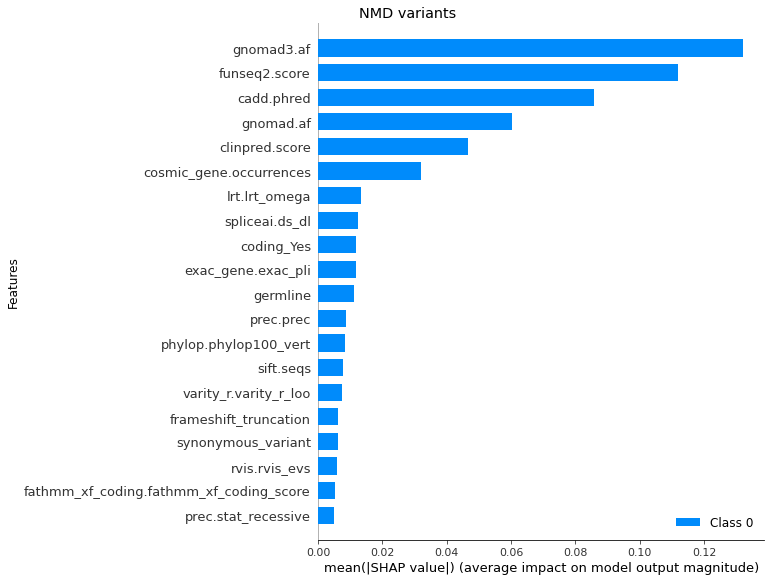

In [136]:
for so in conqs:
    plt.clf()
    #plt.suptitle("Benchmarking damage prediction tools", fontsize=10)
    plt.xlabel("mean SHAP value")
    plt.ylabel("Features")
    plt.title(f"SHAP plot for {so}")

    missense = var1[(var1['so'] ==so)].drop(config_dict["train_cols"]+extra_cols, axis=1).reset_index(drop=True)
    print(f"{so} variant shape: {missense.shape}")
    background_x = missense.loc[np.random.choice(missense.shape[0], 500, replace=False)]
    shap_values = explainer.shap_values(background_x)
    shap.summary_plot(shap_values, background_x, background_x.columns, show=False)
    plt.title(f"{so} variants", x=.2)

    #plt.show()
    plt.savefig(
        f"/Users/tarunmamidi/Documents/Development/DITTO/data/processed/shap_plots/{so}_SHAP.pdf",
        format="pdf",
        dpi=1000,
        bbox_inches="tight",
    )


In [45]:
var1[['mavedb.score','DITTO']].head()


mavedb.score  DITTO
0      0.867714    1.0
1      0.867714    1.0
2      0.867714    1.0
3      0.867714    1.0
4      0.867714    1.0

In [49]:
var1[['mavedb.score','DITTO']].dtypes


mavedb.score    float64
DITTO           float32
dtype: object

In [68]:
var1.shape


(37027, 256)

In [64]:
sc_data = var1[['mavedb.score','DITTO']].drop_duplicates().reset_index(drop=True)
sc_data.head()


mavedb.score  DITTO
0      0.867714    1.0
1      1.085198    1.0
2      0.873427    1.0
3     -0.006227    1.0
4      0.156953    1.0

In [69]:
sc_data.shape


(9930, 2)

In [67]:
sc_data['mavedb.score'].value_counts()


mavedb.score
 0.867714    9889
 1.156741       1
 1.080369       1
 1.130410       1
 1.051897       1
 0.993691       1
 0.993719       1
 1.003396       1
 1.057490       1
 0.417562       1
 1.060959       1
 1.085198       1
 1.132874       1
 1.249492       1
 1.037391       1
 1.003263       1
 0.940107       1
 0.981642       1
 1.392515       1
 1.055863       1
-0.004865       1
 0.107000       1
 0.522931       1
 0.009492       1
 0.873427       1
-0.006227       1
 0.156953       1
 0.031064       1
 0.090229       1
 0.719476       1
 0.407828       1
-0.062169       1
 0.167416       1
 0.267447       1
 1.156291       1
 0.162758       1
 1.137468       1
 0.330857       1
 0.167144       1
 1.263799       1
 1.025690       1
 0.866452       1
Name: count, dtype: int64

<Axes: ylabel='Density'>

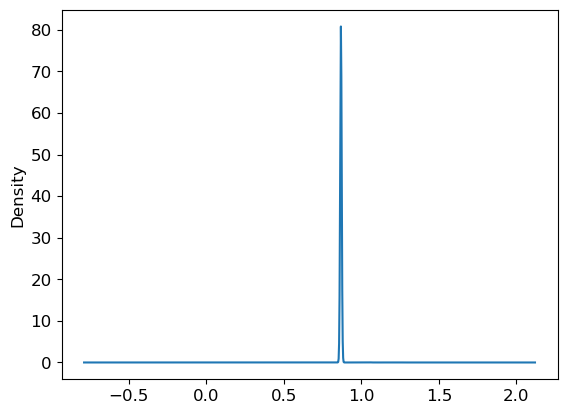

In [66]:
sc_data['mavedb.score'].plot(kind='kde')


<Axes: xlabel='DITTO', ylabel='mavedb.score'>

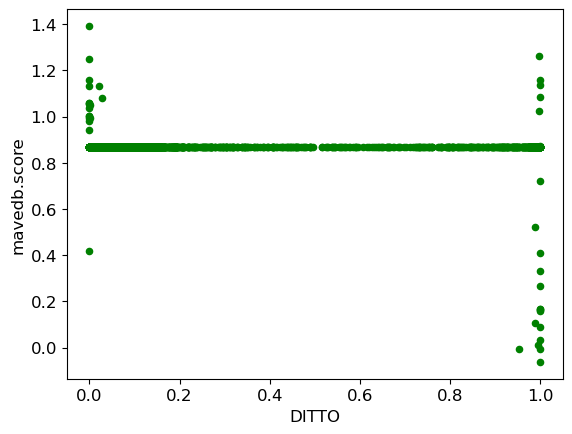

In [65]:
sc_data.plot(kind='scatter', x='DITTO', y='mavedb.score', color='g')
